### Case Study NoteBook
> Steps of analysis:
> 1. loan_df Understanding
> 2. loan_df Wrangling
> 3. loan_df Visualization and Analysis
> 4. Conclusion


`Loading Libraries and loan_df`

`SetupEnvironment for pandas and sns`

In [626]:
"""To enhance our project, we will import the following libraries:
Pandas for dataframe operations
NumPy for numerical data analysis
Seaborn for visualization
Matplotlib for plotting
Ignore unnecessary warnings while running the script"""

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# loan_df Understasnding

In [627]:
# reading loan_df from csv and loan_df dictionary using pandas 
loan_df = pd.read_csv('loan.csv',low_memory=False)
loandict_df = pd.read_excel('Data_Dictionary.xlsx')
loan_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [628]:
#display first 5 rows for loan loan_dfframe
loan_df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [629]:
#display first 5 rows for loan_df dictonary loan_dfframe
loandict_df.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [630]:
loan_df.duplicated().sum()

0

In [631]:
#Analyzeing the loan_df for loan df
print("Loan loan_dfframe has:")
print("     -{} Number of Columns.".format(loan_df.shape[1]))
print("     -{} Number of Rows.".format(loan_df.shape[0]))
print("     -{} Number of duplicates.".format(loan_df.duplicated().sum()))
print("     -{} Number of unique_values.".format(loan_df.nunique().agg('sum')))
print("     -{} Number of missing values.".format(loan_df.isnull().sum().sum()))

Loan loan_dfframe has:
     -111 Number of Columns.
     -39717 Number of Rows.
     -0 Number of duplicates.
     -416800 Number of unique_values.
     -2263366 Number of missing values.


In [632]:
#Description about the loan_dfframe with min,max and total counts etc ... 
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [633]:
#Information

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [634]:
#checking loan_dftypes
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [635]:
# checking columns

loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# loan_df Cleaning


In [636]:
"""In the below figure we can see there is a hugh spike at 40K,The total rows are  39,717 
hence we need to analyze the loan_df more because it is not formatted ,need to drops null values and also need to drop few columns"""

#Lets start with the columns which is having larger percentage of null values 
missing_percentage = loan_df.isnull().sum() / len(loan_df) * 100
missing_percentage[missing_percentage > 40]

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

# Handling Nulls

>Need to remove the columns which is having more then 40% of missing values for better analysis and also to increse accuracy


In [637]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape
# The number of columns are reduced to 57 from 111 

(39717, 57)

In [638]:
#rechecking 
missing_percentage = loan_df.isnull().sum() / len(loan_df) * 100
greaterThan40Percentage=missing_percentage[missing_percentage > 40]

In [639]:
#in the abovbe still 3 columns are having missing value greate than 40% lets remove them
loan_df = loan_df.loc[:,loan_df.isnull().sum()/loan_df.shape[0]*100<40]
(loan_df.isnull().sum() / len(loan_df) * 100).sort_values(ascending=False)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


In [640]:
loan_df.shape

(39717, 54)

# Dropping unnucessary columns

>Dropping unnecessary columns which is having  irrelevant information for loan_df analysis

In [641]:
## The removed columns represent customer behavior variables, which are calculated after the fact. Therefore, they cannot be utilized as input for the analysis
customer_behavior_columns_drop = ['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'delinq_2yrs', 'revol_bal', 
                   'out_prncp', 'out_prncp_inv', 'total_pymnt', 'inq_last_6mths', 'open_acc', 
                   'pub_rec', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'revol_util', 
                   'total_acc', 'last_credit_pull_d', 'application_type']
loan_df = loan_df.drop(customer_behavior_columns_drop, axis=1)


In [642]:
""", "member_id", "url", "title", "emp_title", "zip_code", "addr_state" 
the above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them"""

loan_df=loan_df.drop(['title','emp_title','desc','url','member_id'],axis=1)

In [643]:
# Removing zip_code because cannot be used as input for the analysis
loan_df=loan_df.drop(['zip_code'],axis=1)

# Dropping cols having more unique values 

In [644]:
loan_df.shape
# it is observed that few columns have unique values hence it doesnot seems to impact out analysis further hence removing those columns 
"""Here for example tax_liens contains only 0 hence it doesnot impact on our analysis"""
print(loan_df.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
earliest_cr_line                526
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
id                          

In [645]:
loan_df = loan_df.loc[:,loan_df.nunique()>1]
loan_df.shape

(39717, 20)

In [646]:
# Checking for missing values across the rows
print((loan_df.isnull().sum(axis=1)).max())


1


# Removing duplicates

In [647]:
loan_df = loan_df.drop_duplicates()

In [648]:
loan_df.shape

(39717, 20)

# fixing the null values

In [649]:
# Checking for missing values across the loan_dfframe
print(loan_df.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
earliest_cr_line           0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
funded_amnt                0
home_ownership             0
dtype: int64


emp_length	1075
pub_rec_bankruptcies	697 need to focous on the above cols 

In [650]:
# Checking values in emp_length 
print(loan_df.emp_length.value_counts())
print("*"*100)
print(loan_df.pub_rec_bankruptcies.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
****************************************************************************************************
pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


> "pub_rec_bankruptcies"  value 0 which can be subsitued in place of null 

> "emp_length" the fixing null values difficult hence removing it will be a good solution


In [651]:
loan_df = loan_df.dropna(subset=['emp_length'])
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)
loan_df.shape

(38642, 20)

In [652]:
# Checking for missing values across the loan_dfframe
print(loan_df.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
pub_rec_bankruptcies    0
dtype: int64


# loan_df
Type Check

In [653]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   funded_amnt_inv       38642 non-null  float64
 4   term                  38642 non-null  object 
 5   int_rate              38642 non-null  object 
 6   installment           38642 non-null  float64
 7   grade                 38642 non-null  object 
 8   sub_grade             38642 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        38642 non-null  object 
 11  annual_inc            38642 non-null  float64
 12  verification_status   38642 non-null  object 
 13  issue_d               38642 non-null  object 
 14  loan_status           38642 non-null  object 
 15  purpose               38

In [654]:
# Correcting data type and format for columns in the dataframe
## Deriving more columns with the conversion of data type
# Convert 'int_rate' to float with rounding to 2 decimal places
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(str(x).replace('%',''))).round(2)

# Convert 'grade' and 'sub_grade' to categorical
loan_df['grade'] = loan_df['grade'].astype('category')
loan_df['sub_grade'] = loan_df['sub_grade'].astype('category')

# Convert 'issue_d' to datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

# Convert 'purpose'  to categorical
loan_df['purpose'] = loan_df['purpose'].astype('category')


# Convert 'emp_length' to float
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

# Convert 'home_ownership' and 'verification_status' to categorical
loan_df['home_ownership'] = loan_df['home_ownership'].astype('category')
loan_df['verification_status'] = loan_df['verification_status'].astype('category')

# Convert 'term' to integer
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace(' months','')))

loan_df['approved_loan_amnt_ratio'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)
loan_df['approved_loan_amt_percent'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)



In [655]:

#earliest_cr_line
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
loan_df['earliest_cr_line_year'] = loan_df.earliest_cr_line.dt.year
loan_df['earliest_cr_line_month'] = loan_df.earliest_cr_line.dt.strftime('%b')

In [656]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38642 non-null  int64         
 1   loan_amnt                  38642 non-null  int64         
 2   funded_amnt                38642 non-null  int64         
 3   funded_amnt_inv            38642 non-null  float64       
 4   term                       38642 non-null  int64         
 5   int_rate                   38642 non-null  float64       
 6   installment                38642 non-null  float64       
 7   grade                      38642 non-null  category      
 8   sub_grade                  38642 non-null  category      
 9   emp_length                 38642 non-null  float64       
 10  home_ownership             38642 non-null  category      
 11  annual_inc                 38642 non-null  float64       
 12  verificat

In [657]:
loan_df.head()
#Now loan_df seems to be formatted need to check the date columns

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade  emp_length  ...  loan_status         purpose  \
0       162.87     B        B2        10.0  ...   Fully Paid     credit_card   
1        59.83     C        C4         0.5  ...  Charged Off             car   
2        84.33     C        C5        10.0  ...   Fully Paid  small_business   
3       339.31     C        C1        10.0  ...   Fully Paid           other   
4        67.79     B        B5         1.0  ...      Current           other   

  addr_state    dti earliest_cr_line pub_rec_bankruptcies  \
0         AZ  27.65       1985-01-01                  0.0   
1         GA   1.00       1999-04-01                  0.0   
2         IL   8.72       2001-11-01                  0.0   
3         CA  20.00       1996-02-01                  0.0   
4         OR  17.94       1996-01-01                  0.0   

  approved_loan_amnt_ratio  approved_loan_amt_percent earliest_cr_line_year  \
0                     99.5                       99.5                  1985   
1                    100.0                      100.0                  1999   
2                    100.0                      100.0                  2001   
3                    100.0                      100.0                  1996   
4                    100.0                      100.0                  1996   

   earliest_cr_line_month  
0                     Jan  
1                     Apr  
2                     Nov  
3                     Feb  
4                     Jan  

[5 rows x 24 columns]

# Operation with Date cols


In [658]:
#issue_d column
loan_df['issue_d_year'] = loan_df.issue_d.dt.year
loan_df['issue_d_month'] = loan_df.issue_d.dt.strftime('%b')
loan_df['issue_d_weekday'] = loan_df.issue_d.dt.weekday
#loan_df type conversion of year and weekday
loan_df['issue_d_year'] = loan_df['issue_d_year'].astype(object)
loan_df['issue_d_weekday'] = loan_df['issue_d_weekday'].astype(object)

loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade  emp_length  ...    dti  earliest_cr_line  \
0       162.87     B        B2        10.0  ...  27.65        1985-01-01   
1        59.83     C        C4         0.5  ...   1.00        1999-04-01   
2        84.33     C        C5        10.0  ...   8.72        2001-11-01   
3       339.31     C        C1        10.0  ...  20.00        1996-02-01   
4        67.79     B        B5         1.0  ...  17.94        1996-01-01   

  pub_rec_bankruptcies approved_loan_amnt_ratio approved_loan_amt_percent  \
0                  0.0                     99.5                      99.5   
1                  0.0                    100.0                     100.0   
2                  0.0                    100.0                     100.0   
3                  0.0                    100.0                     100.0   
4                  0.0                    100.0                     100.0   

  earliest_cr_line_year earliest_cr_line_month  issue_d_year issue_d_month  \
0                  1985                    Jan          2011           Dec   
1                  1999                    Apr          2011           Dec   
2                  2001                    Nov          2011           Dec   
3                  1996                    Feb          2011           Dec   
4                  1996                    Jan          2011           Dec   

   issue_d_weekday  
0                3  
1                3  
2                3  
3                3  
4                3  

[5 rows x 27 columns]

>As the loan_df has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.


In [659]:
# here facts cols and dim cols need to segregrated
fact_loan_df = loan_df.select_dtypes(include='number')
dim_loan_df = loan_df.select_dtypes(exclude='number')

facts loan_df

In [660]:
fact_loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment  emp_length  annual_inc    dti  pub_rec_bankruptcies  \
0       162.87        10.0     24000.0  27.65                   0.0   
1        59.83         0.5     30000.0   1.00                   0.0   
2        84.33        10.0     12252.0   8.72                   0.0   
3       339.31        10.0     49200.0  20.00                   0.0   
4        67.79         1.0     80000.0  17.94                   0.0   

   approved_loan_amnt_ratio  approved_loan_amt_percent  earliest_cr_line_year  
0                      99.5                       99.5                   1985  
1                     100.0                      100.0                   1999  
2                     100.0                      100.0                   2001  
3                     100.0                      100.0                   1996  
4                     100.0                      100.0                   1996

Dimension loan_df

In [661]:
dim_loan_df.head()

grade sub_grade home_ownership verification_status    issue_d  loan_status  \
0     B        B2           RENT            Verified 2011-12-01   Fully Paid   
1     C        C4           RENT     Source Verified 2011-12-01  Charged Off   
2     C        C5           RENT        Not Verified 2011-12-01   Fully Paid   
3     C        C1           RENT     Source Verified 2011-12-01   Fully Paid   
4     B        B5           RENT     Source Verified 2011-12-01      Current   

          purpose addr_state earliest_cr_line earliest_cr_line_month  \
0     credit_card         AZ       1985-01-01                    Jan   
1             car         GA       1999-04-01                    Apr   
2  small_business         IL       2001-11-01                    Nov   
3           other         CA       1996-02-01                    Feb   
4           other         OR       1996-01-01                    Jan   

  issue_d_year issue_d_month issue_d_weekday  
0         2011           Dec               3  
1         2011           Dec               3  
2         2011           Dec               3  
3         2011           Dec               3  
4         2011           Dec               3

# We have cleaned loan_df set and have parameters for our EDA. Hence proceeding  with EDA

Univariate Analysis

Let us start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

In [662]:
distinct_loan_status = loan_df['loan_status'].unique()
print(distinct_loan_status)
loan_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_df['loan_status_num'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

['Fully Paid' 'Charged Off' 'Current']


# Univariate Analysis
# Plot histograms for numerical features


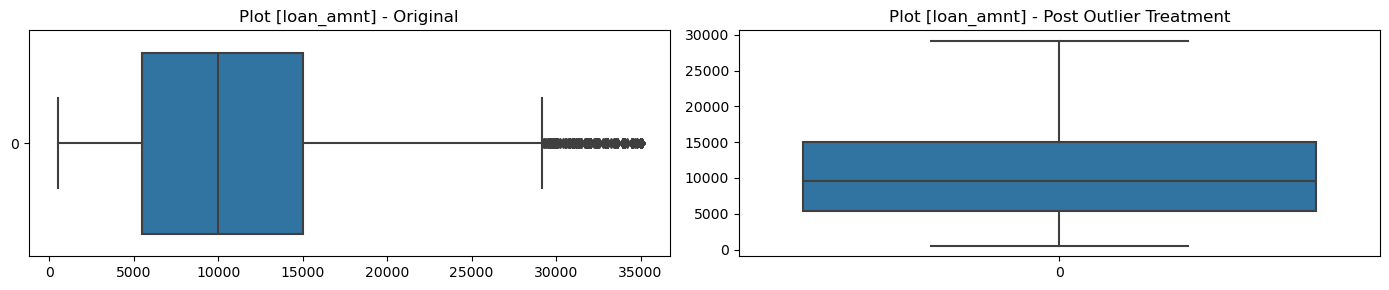

Rows dropped:  1210
Percentage rows dropped:  3.13 %


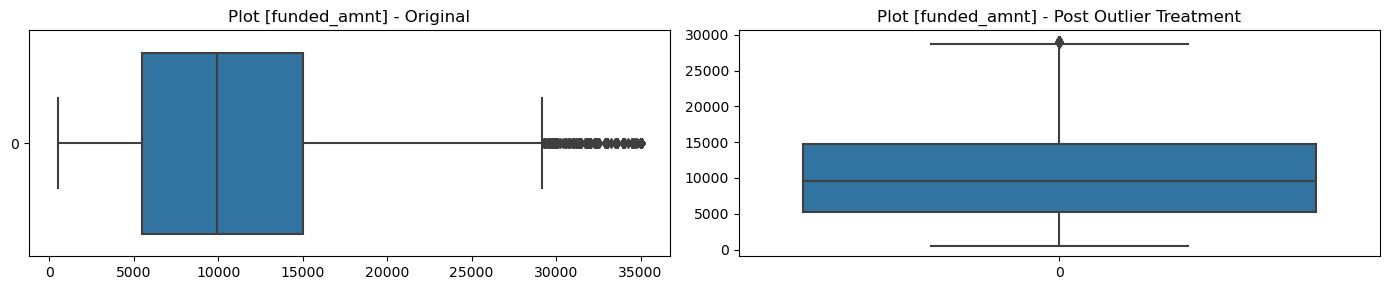

Rows dropped:  1026
Percentage rows dropped:  2.66 %


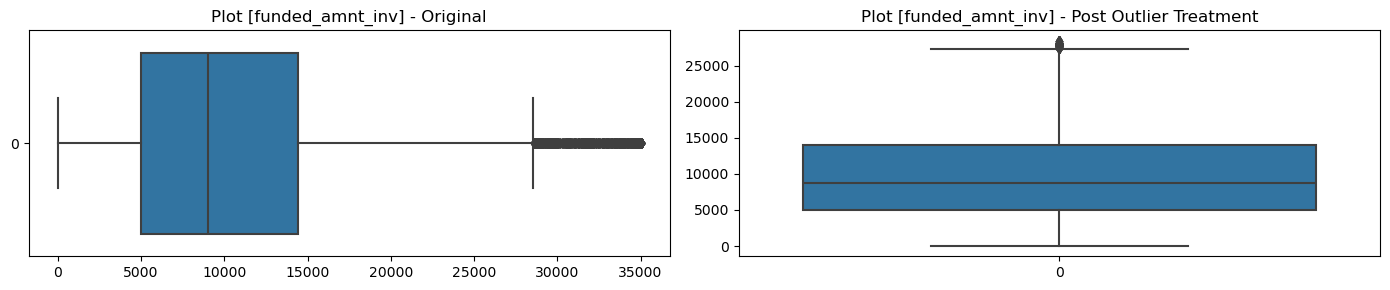

Rows dropped:  981
Percentage rows dropped:  2.54 %


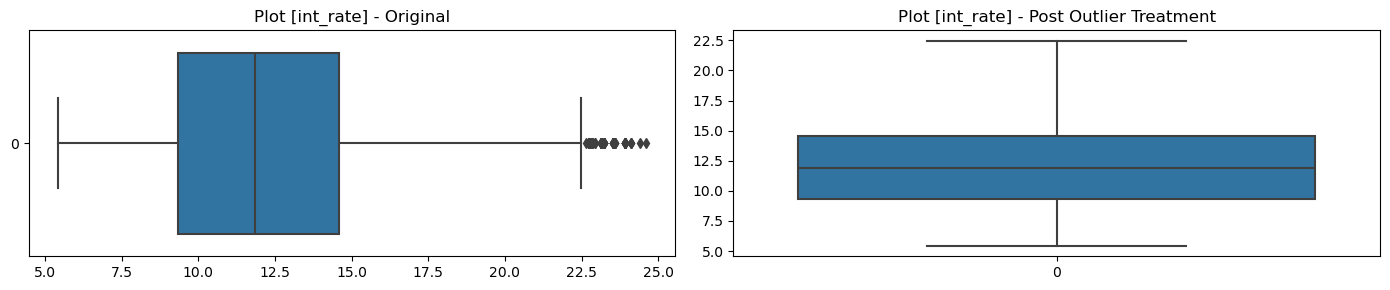

Rows dropped:  78
Percentage rows dropped:  0.2 %


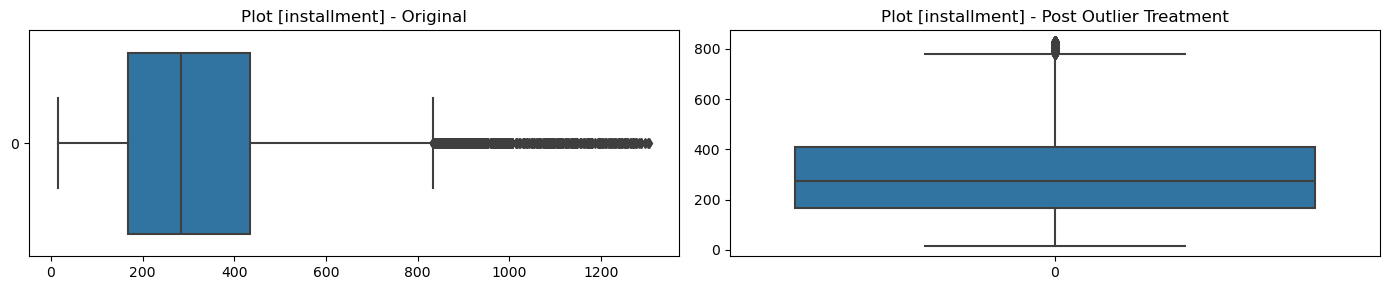

Rows dropped:  1152
Percentage rows dropped:  2.98 %


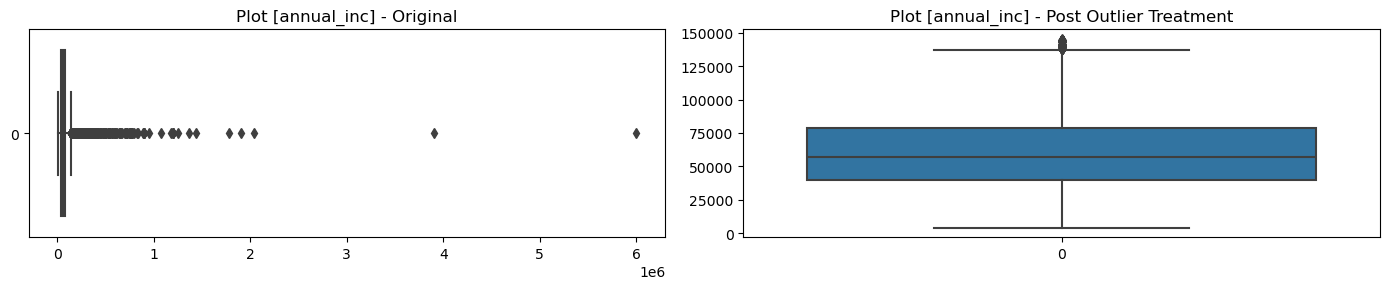

Rows dropped:  1824
Percentage rows dropped:  4.72 %


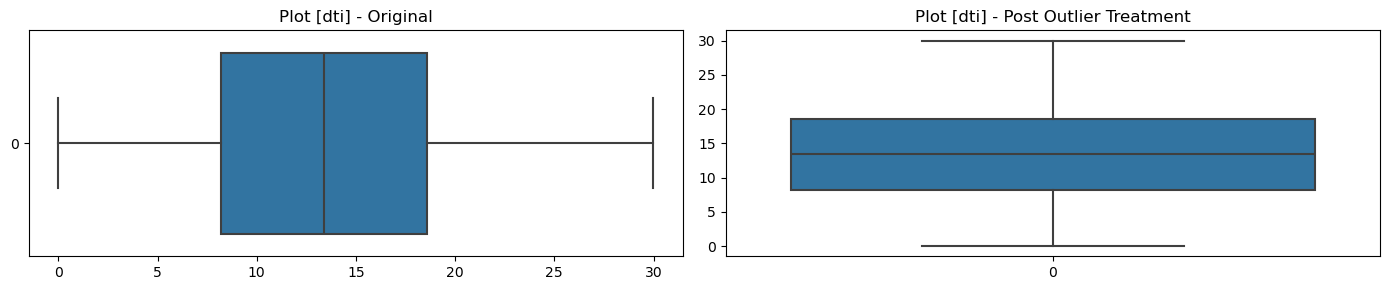

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [663]:
# This function creates a dictionary of outliers which includes the inter quartile range, 
# lower and upper bound for a particular column.
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR
import matplotlib.pyplot as plot
import seaborn as sea
iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}

def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plot.subplots(1,2,figsize=(14, 3))
    splot1 = sea.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers    
    splot2 = sea.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()
    
def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

original_row_count = len(loan_df)

original_row_count = len(loan_df)

outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
for column in outlier_treatment:
    outlier_comparison(loan_df, column)
    loan = drop_outlier(loan_df, column)

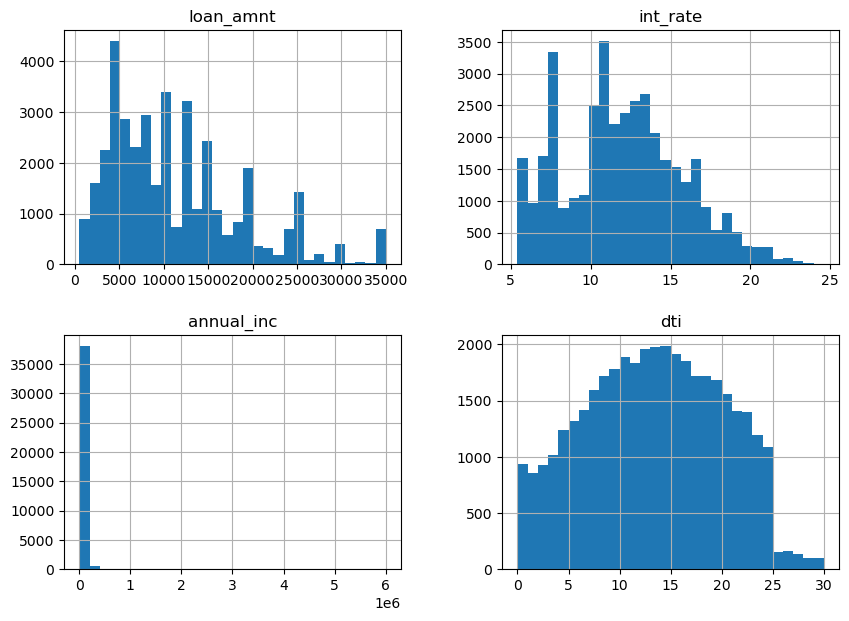

In [664]:
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
loan_df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

Here we have used Barplot,Boxplot,violinplot for catagorical loan_df analysis phase 1

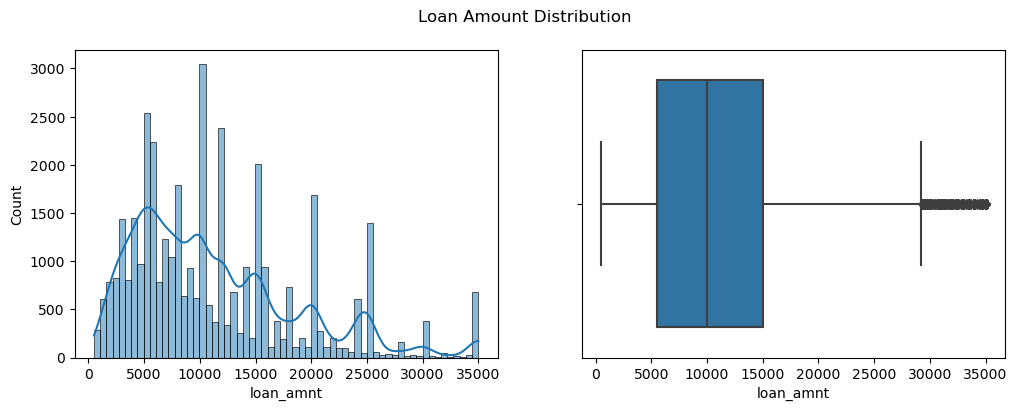

In [748]:
def plot_loan_amount_distribution(loan_df):
    """
    Plots the distribution of loan amounts using a histogram and a box plot.

    Parameters:
    loan_df (DataFrame): The DataFrame containing loan data with a column named 'loan_amnt'.

    This function creates a figure with two subplots:
    1. A histogram with a rug plot to show the distribution of loan amounts.
    2. A box plot to show the summary statistics of the loan amounts.

    The figure size is set to (12, 4) and a single title is added for both subplots.
    """
    # Increasing the figure size of plot
    plt.figure(figsize=(12, 4))
    
    # Setting subplot index
    plt.subplot(1, 2, 1)
    
    # Histogram plot
    sns.histplot(data=loan_df, x='loan_amnt', kde=True)
    
    # Setting subplot index
    plt.subplot(1, 2, 2)
    
    # Box plot
    sns.boxplot(x=loan_df['loan_amnt'])
    
    # Single title for both subplots
    plt.suptitle('Loan Amount Distribution')
    
    # Show plot
    plt.show()

plot_loan_amount_distribution(loan_df)




In [666]:
#Stats of laon amount
loan_df.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38642.000000
mean     11291.615988
std       7462.136215
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22250.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# Observations

From the above plots, we can observe the following:

1. The histogram shows that the most common loan amount taken is $10,000. This indicates a peak in the distribution at this value.
2. The median of the loan amount distribution is also 10,000, as shown by the box plot.
3. Very few people have taken loan amounts greater than 30,000. This is evident from the sparsity of data points in the histogram and the distribution of the box plot.

These insights suggest that 10,000 is a popular loan amount, possibly due to specific loan offerings or borrower needs. Additionally, larger loan amounts (above 30,000) are less common among the borrowers.


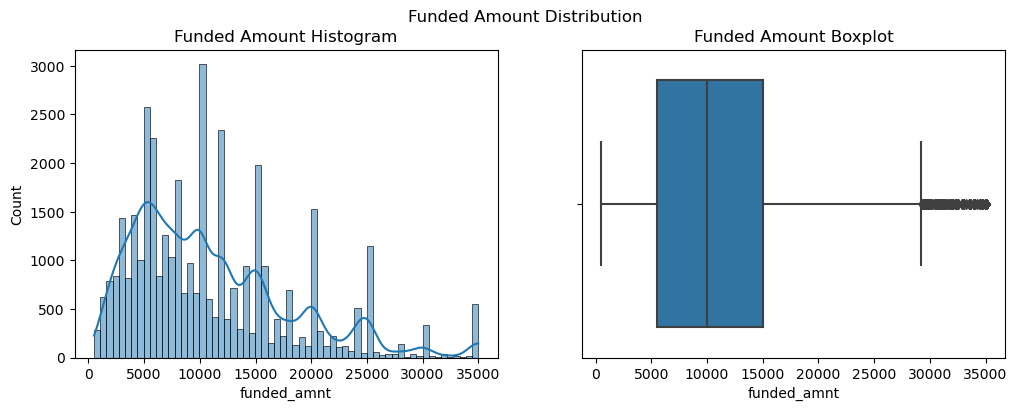

In [667]:
def plot_funded_amount_distribution(dataframe):
    """
    Plots the distribution of the 'funded_amnt' column in a given DataFrame using both a histogram and a box plot.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the 'funded_amnt' column.

    Returns:
    None
    """

    plt.figure(figsize=(12, 4))

    # Histogram plot
    plt.subplot(1, 2, 1)
    sns.histplot(data=dataframe, x='funded_amnt', kde=True)
    plt.title('Funded Amount Histogram')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=dataframe, x='funded_amnt')
    plt.title('Funded Amount Boxplot')

    plt.suptitle('Funded Amount Distribution')
    plt.show()


plot_funded_amount_distribution(loan_df)

In [668]:
loan_df.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38642.000000
mean     11017.101211
std       7193.038828
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%       9950.000000
75%      15000.000000
90%      21000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

# Observations

1. The funded amount data behaves similarly to the loan amount data, which indicates that Lending Club approved most of the applied loan amounts.
2. The histogram shows a peak at 10,000, suggesting that a significant number of people took loans of this amount.
3. The median loan amount is also 10,000, as seen in the box plot.
4. Very few people took loan amounts greater than 30,000, which is evident from the sparsity of data points in this range in the histogram and the box plot.

These insights suggest that 10,000 is a common loan amount, likely due to specific loan offerings or borrower needs. The similarity between the funded amount and the loan amount distributions reinforces the conclusion that borrowers typically receive the amounts they request.


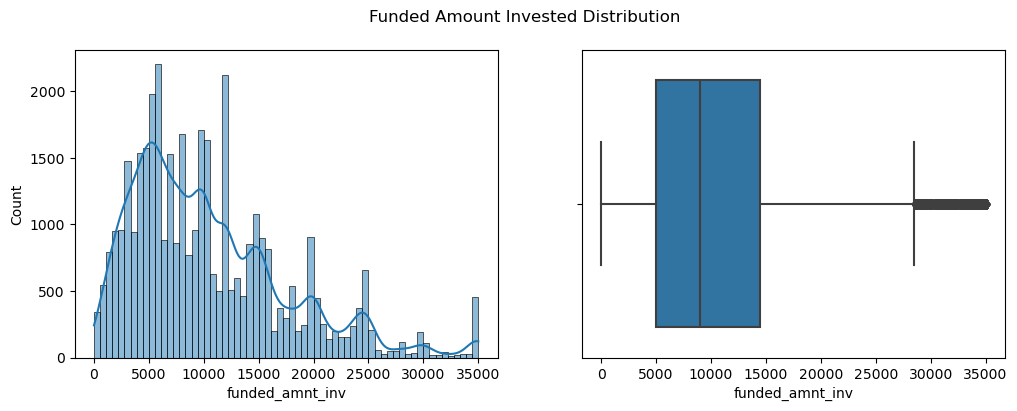

In [669]:
# Increasing the figure size of plot
plt.figure(figsize=(12, 4))

# Setting subplot index for Funded Amount Invested
plt.subplot(1, 2, 1)

# Histogram plot for Funded Amount Invested
sns.histplot(data=loan_df, x='funded_amnt_inv', kde=True)

# Setting subplot index for Box plot
plt.subplot(1, 2, 2)

# Box plot for Funded Amount Invested
sns.boxplot(x=loan_df['funded_amnt_inv'])

# Single title for both subplots
plt.suptitle('Funded Amount Invested Distribution')

# Show plot
plt.show()




In [670]:
loan_df.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38642.000000
mean     10455.452667
std       7139.613641
min          0.000000
5%        1900.000000
10%       2975.000000
25%       5000.000000
50%       9000.000000
75%      14425.000000
90%      20000.000000
95%      24750.000000
99%      34750.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

# Observations

1. The funded amount invested data behaves similarly to the loan amount data, indicating that Lending Club approved and invested most of the applied loan amounts.
2. The histogram shows a peak at 10,000, suggesting that a significant number of people took loans of this amount.
3. The median loan amount is also 10,000, as seen in the box plot.
4. Very few people took loan amounts greater than 30,000, which is evident from the sparsity of data points in this range in the histogram and the box plot.

These insights suggest that 10,000 is a common loan amount, likely due to specific loan offerings or borrower needs. The similarity between the funded amount invested and the loan amount distributions reinforces the conclusion that borrowers typically receive the amounts they request.


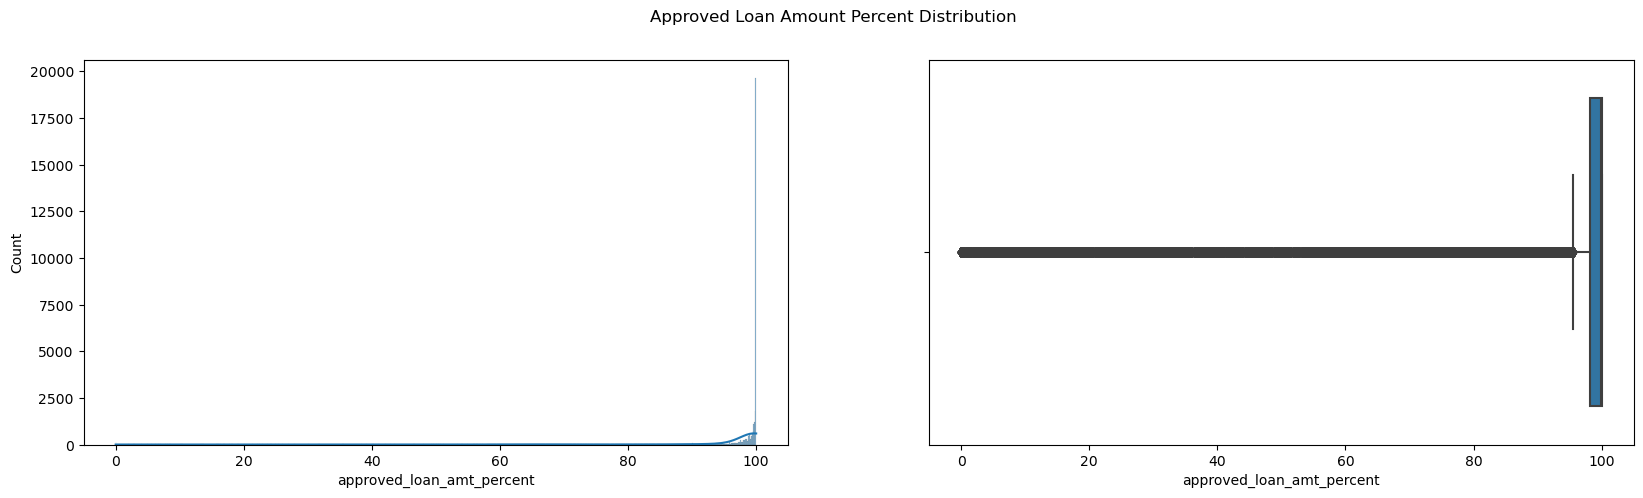

In [671]:
# plt.figure(figsize=(20,5))
# plt.subplot(1,2,1)
# sns.distplot(a=loan_df.approved_loan_amt_percent)
# plt.subplot(1,2,2)
# sns.boxplot(data=loan_df.approved_loan_amt_percent)
# plt.suptitle('Approved Loan Amount percent distribution')
# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert inf values to NaN in the DataFrame
loan_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Setting up the figure size of the plot
plt.figure(figsize=(20, 5))

# Setting subplot index for the left subplot
plt.subplot(1, 2, 1)

# Histogram plot for approved loan amount percent
sns.histplot(data=loan_df, x='approved_loan_amt_percent', kde=True)

# Setting subplot index for the right subplot
plt.subplot(1, 2, 2)

# Box plot for approved loan amount percent
sns.boxplot(data=loan_df, x='approved_loan_amt_percent')

# Single title for both subplots
plt.suptitle('Approved Loan Amount Percent Distribution')

# Display the plots
plt.show()


#Observations 

80% of Borrowers got 100% loan amount from investors.

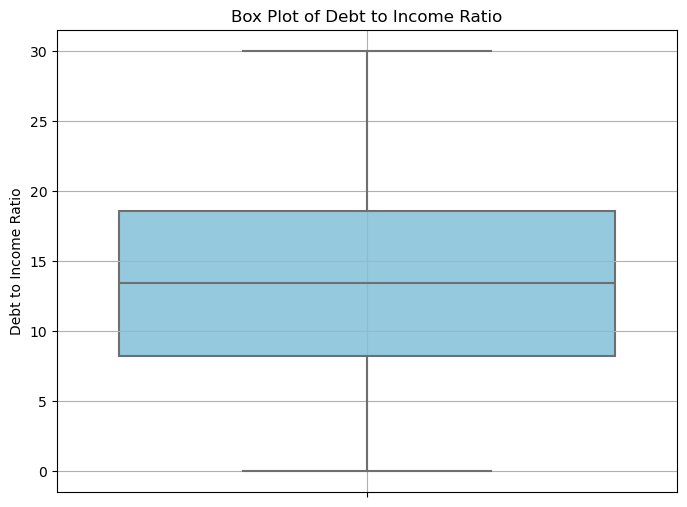

In [672]:
var1 = loan_df.dti

plt.figure(figsize=(8,6))
sns.boxplot(y=var1, color='skyblue')
plt.ylabel('Debt to Income Ratio')
plt.title('Box Plot of Debt to Income Ratio')
plt.grid(True)
plt.show()


# Observations:
Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

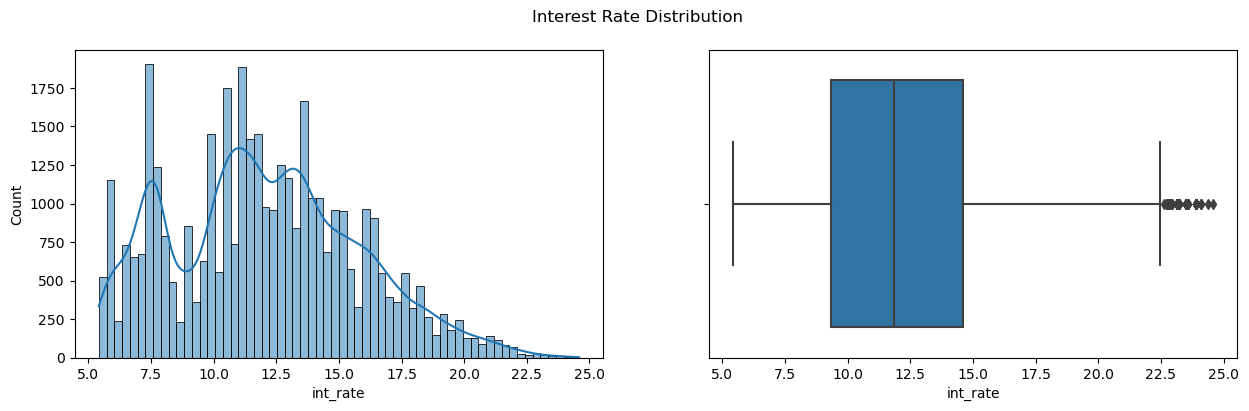

In [673]:
# Assuming loan_df is your DataFrame
# Replace infinite values with NaN
loan_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Setting up the figure size of the plot
plt.figure(figsize=(15, 4))

# Setting subplot index for the left subplot
plt.subplot(1, 2, 1)

# Histogram plot for interest rates
sns.histplot(data=loan_df, x='int_rate', kde=True)

# Setting subplot index for the right subplot
plt.subplot(1, 2, 2)

# Box plot for interest rates
sns.boxplot(data=loan_df, x='int_rate')

# Single title for both subplots
plt.suptitle('Interest Rate Distribution')
plt.show()


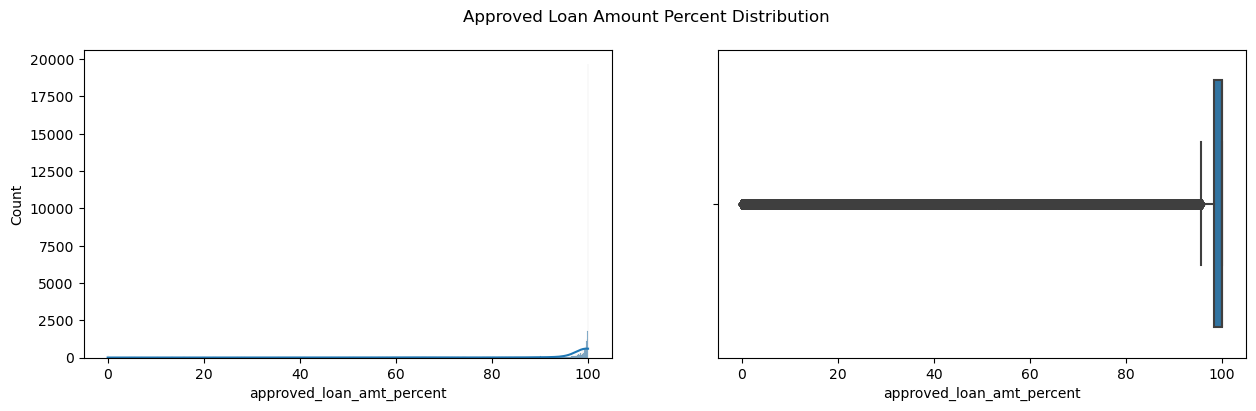

In [674]:
# Setting up the figure size of the plot
plt.figure(figsize=(15, 4))

# Setting subplot index for the left subplot
plt.subplot(1, 2, 1)

# Histogram plot for approved loan amount percent
sns.histplot(data=loan_df, x='approved_loan_amt_percent', kde=True)

# Setting subplot index for the right subplot
plt.subplot(1, 2, 2)

# Box plot for approved loan amount percent
sns.boxplot(data=loan_df, x='approved_loan_amt_percent')

# Single title for both subplots
plt.suptitle('Approved Loan Amount Percent Distribution')

# Display the plots
plt.show()


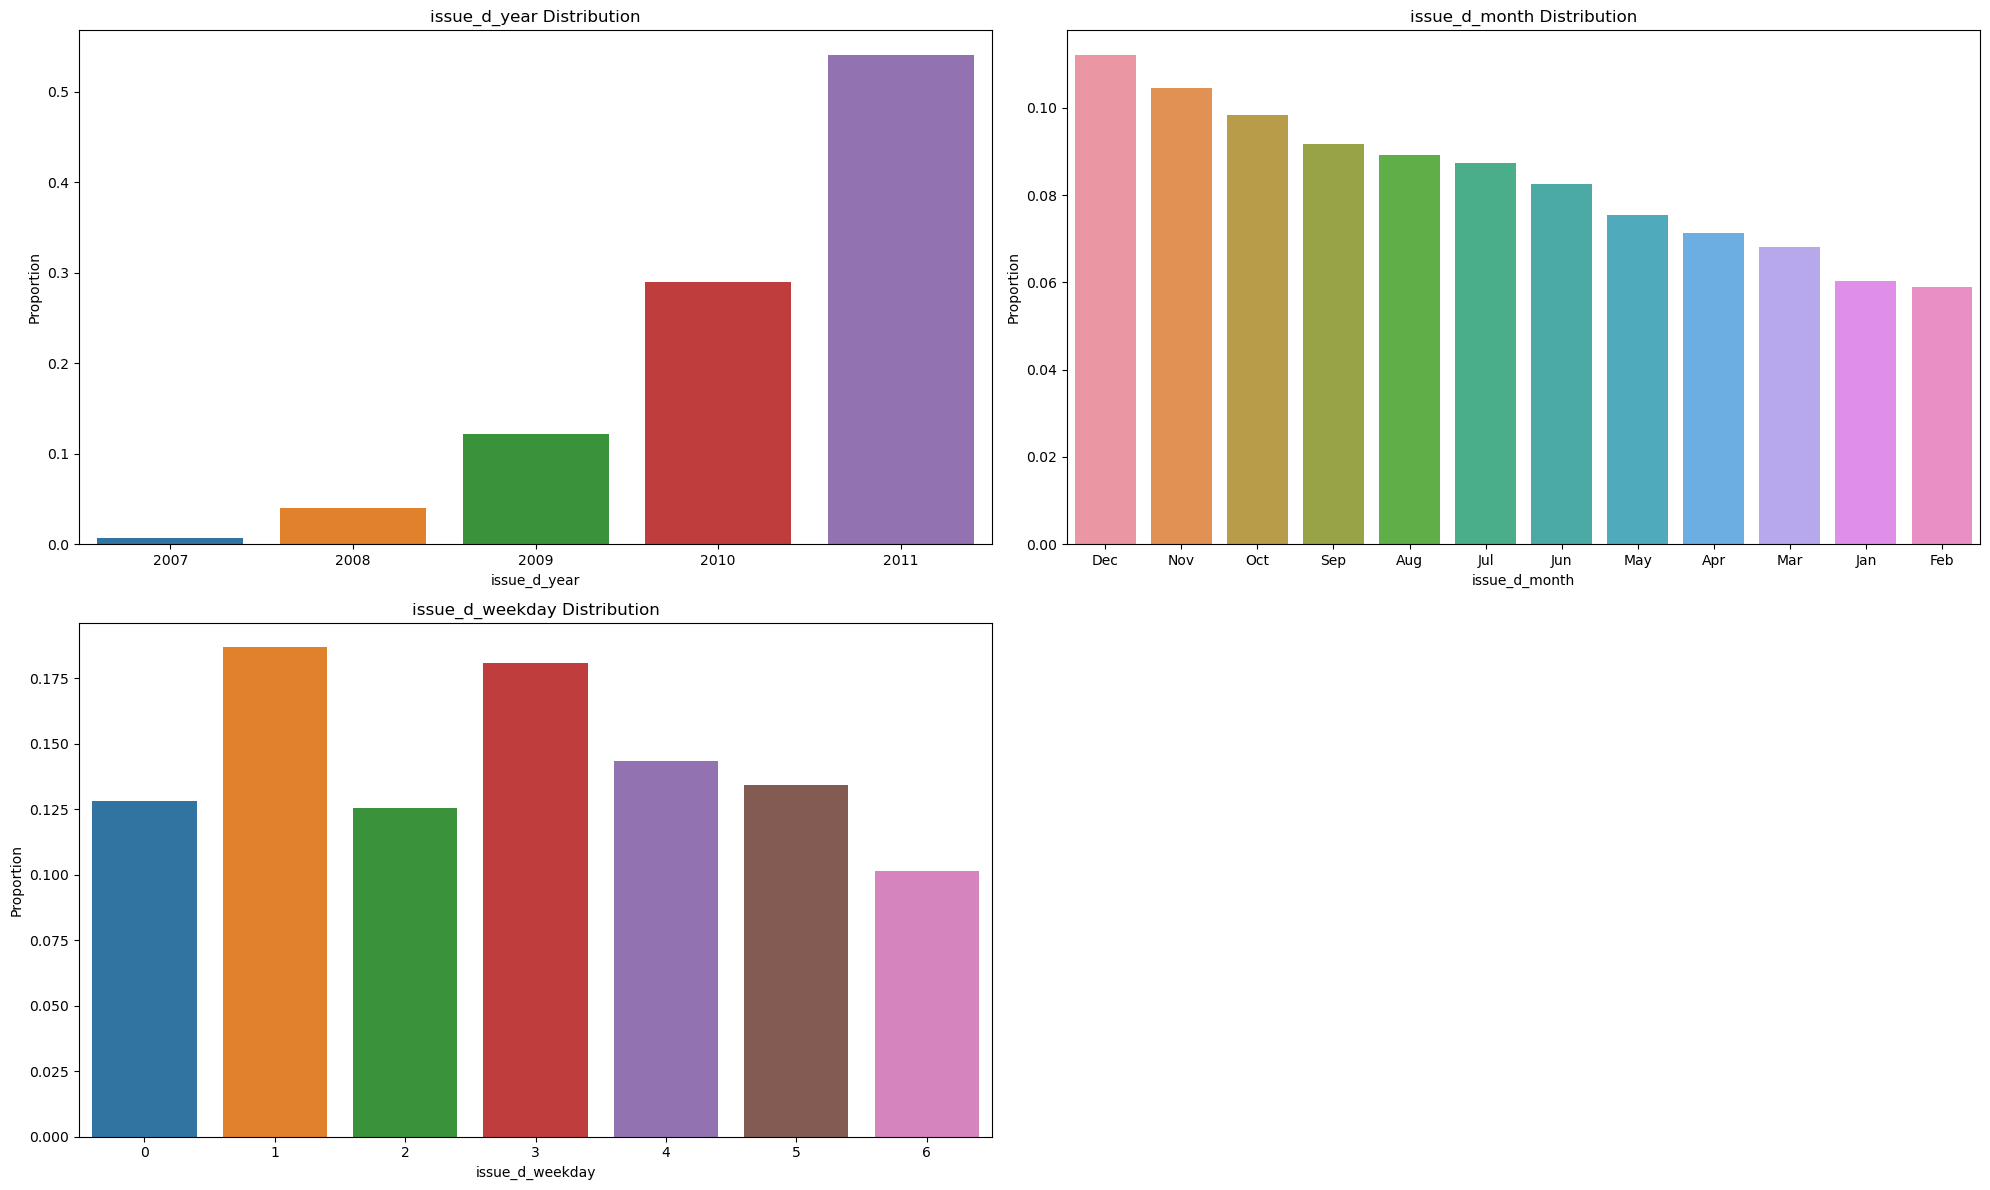

In [675]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(data, var, fig, subplot_idx):
    # Calculate the probability / percentage of each value
    prob_df = data[var].value_counts(normalize=True).reset_index()
    # Rename the columns for clarity
    prob_df.columns = ['index', 'proportion']
    # Create a subplot
    plt.subplot(fig[0], fig[1], subplot_idx)
    sns.barplot(x='index', y='proportion', data=prob_df)
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.title(var + ' Distribution')

# Set up the figure size
plt.figure(figsize=(20, 12))

# Define the figure grid dimensions (rows, columns)
fig = (2, 2)

# Plot distribution for 'issue_d_year'
plot_distribution(loan_df, 'issue_d_year', fig, 1)

# Plot distribution for 'issue_d_month'
plot_distribution(loan_df, 'issue_d_month', fig, 2)

# Plot distribution for 'issue_d_weekday'
plot_distribution(loan_df, 'issue_d_weekday', fig, 3)

# Display the plots
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'purpose vs Loan Amount')

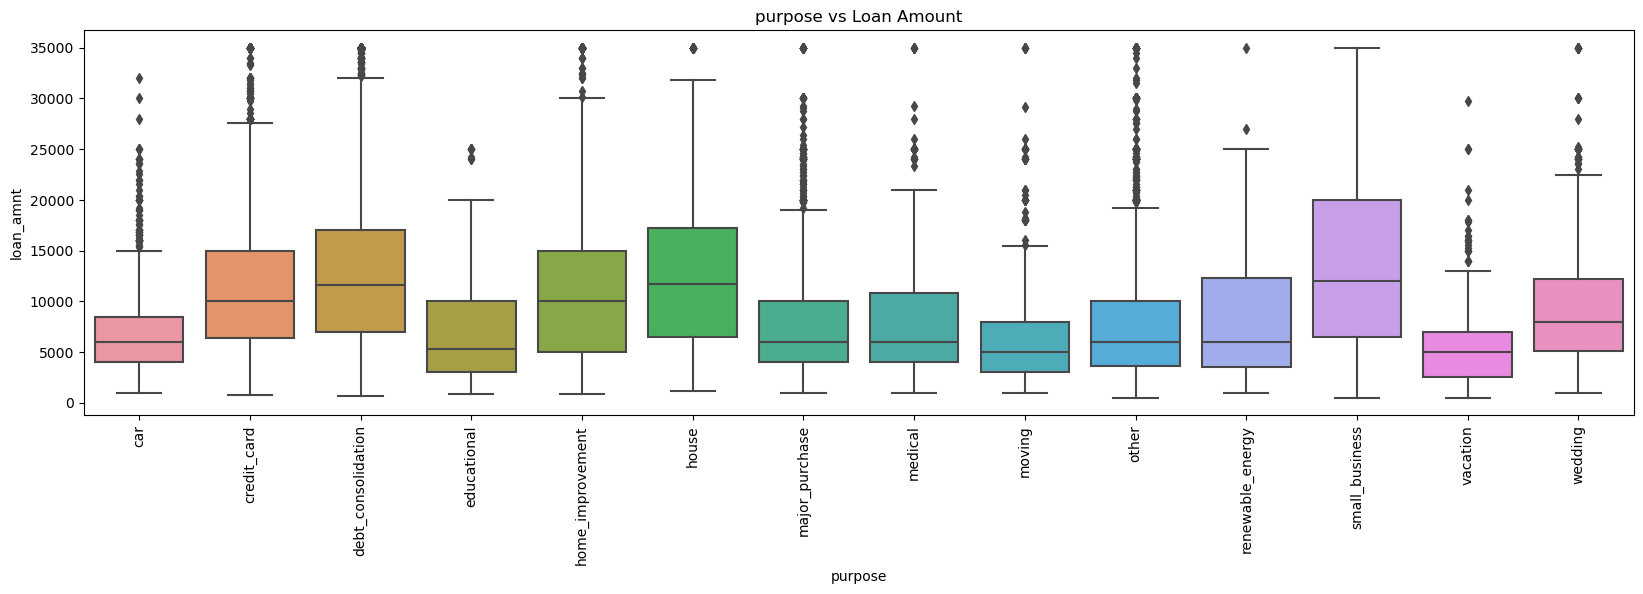

In [677]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.loan_amnt, data=loan_df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

# Observations
The majority of loan amounts are requested for small business purposes, followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

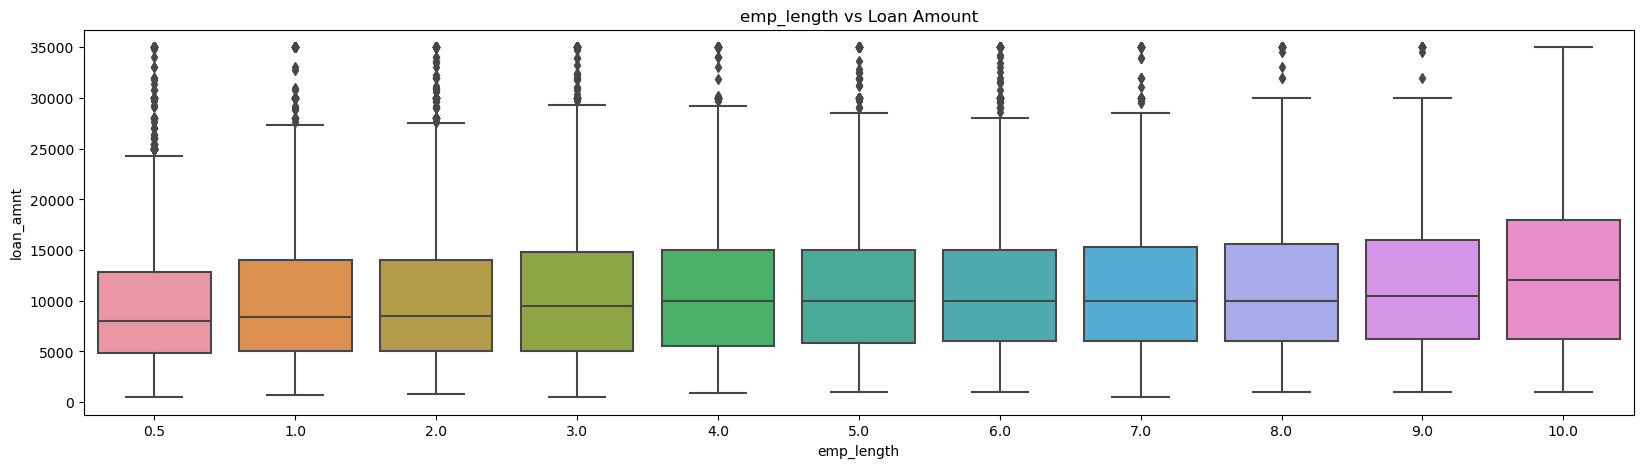

In [678]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.loan_amnt, data=loan_df)
plt.title('emp_length vs Loan Amount')

#Observations

The majority of borrowers have over 10 years of experience, while the least number of borrowers have less than 1 year of experience.

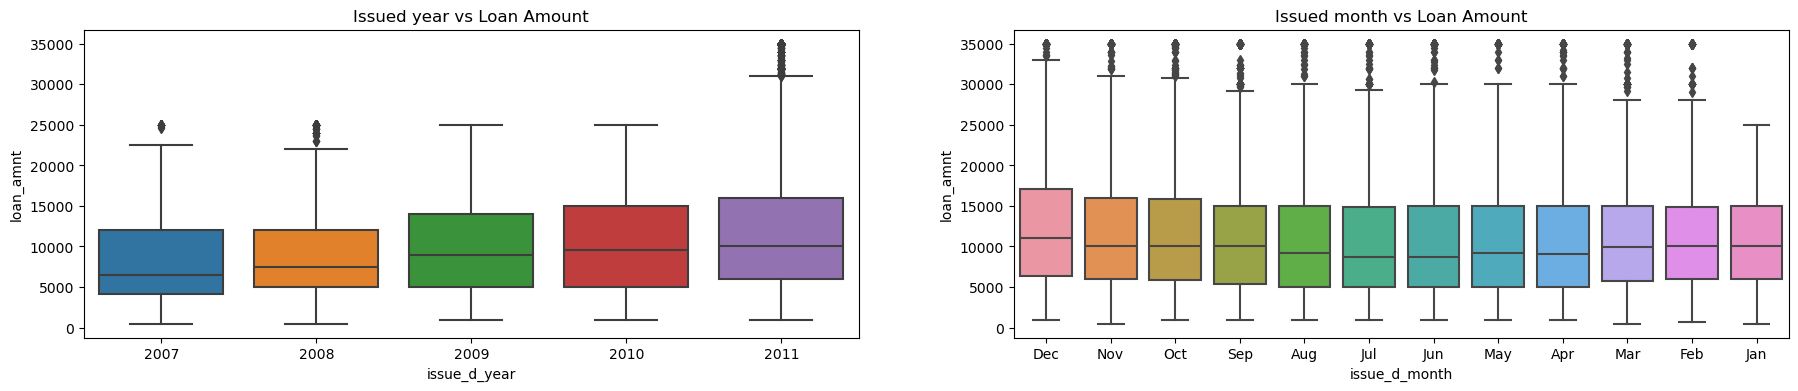

In [679]:
#Issue_d
plt.figure(figsize=(22,4))
plt.subplot(121)
sns.boxplot(x=loan_df.issue_d_year, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan_df.issue_d_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued month vs Loan Amount')
plt.show()

#Observations

- The median loan amount each year did not change significantly, but the distribution became more spread over the years. T
his indicates that people took varying loan amounts each year.
- A few loan borrowers took higher loan amounts in 2008 and 2011, which are plotted as outliers.
- Loan borrowers generally took similar amounts throughout the year, except in December, where higher amounts were taken, as indicated by a distribution higher above the median.

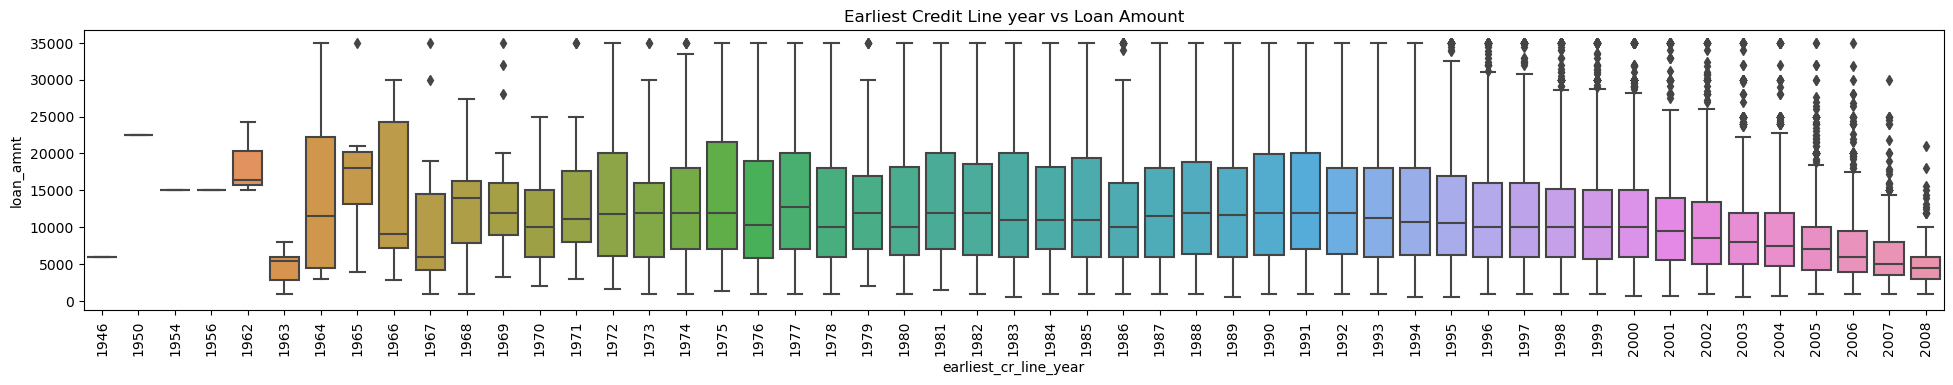

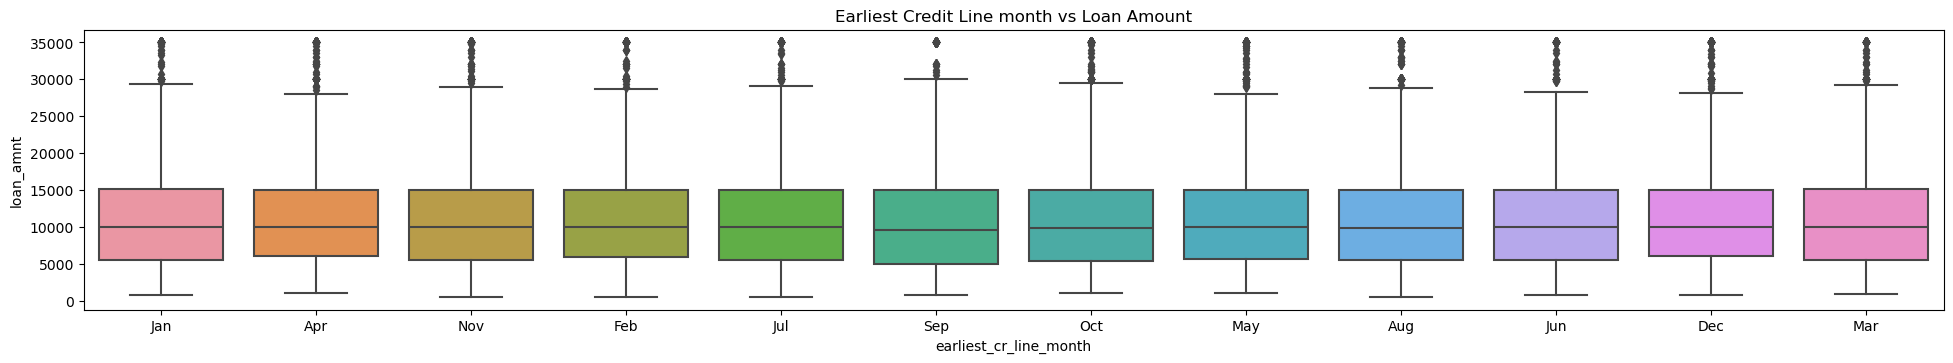

In [680]:
#earliest_cr_line
plt.figure(figsize=(24,8))
plt.subplot(211)
sns.boxplot(x=loan_df.earliest_cr_line_year, y=loan_df.loan_amnt, data=loan_df)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(24,8))
plt.subplot(212)
sns.boxplot(x=loan_df.earliest_cr_line_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

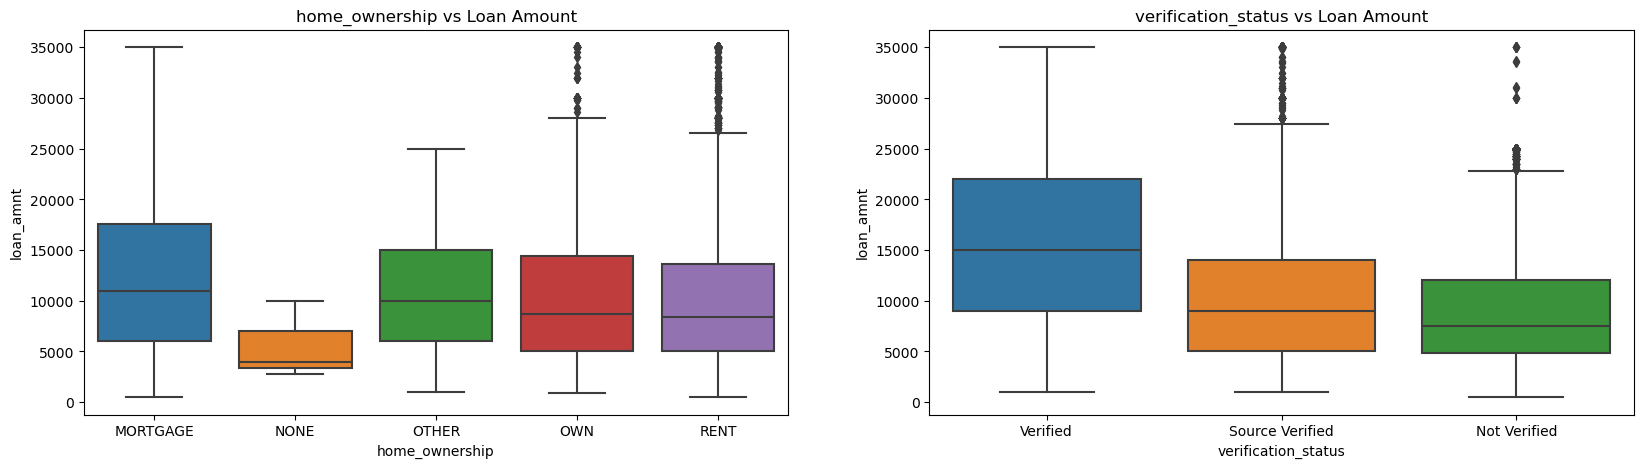

In [750]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_df.loan_amnt, data=loan_df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_df.verification_status.unique()
sns.boxplot(x='verification_status', y=loan_df.loan_amnt, order = verification_status_ord, data=loan_df)

> Home Ownership and Loan Amount: There is a notable trend where more borrowers have mortgages, and these borrowers tend to have higher median loan amounts compared to other categories of home ownership. This suggests a potential correlation between home ownership status and loan amounts, with mortgage holders seeking larger loans.

> Verification Status and Loan Amount: The majority of borrowers who apply for loans greater than 9k are verified. This indicates that borrowers seeking higher loan amounts are more likely to undergo verification processes. This observation highlights the importance of verifying borrower information, particularly for larger loan amounts, to mitigate risks associated with lending.

Text(0.5, 1.0, 'purpose vs Loan Amount')

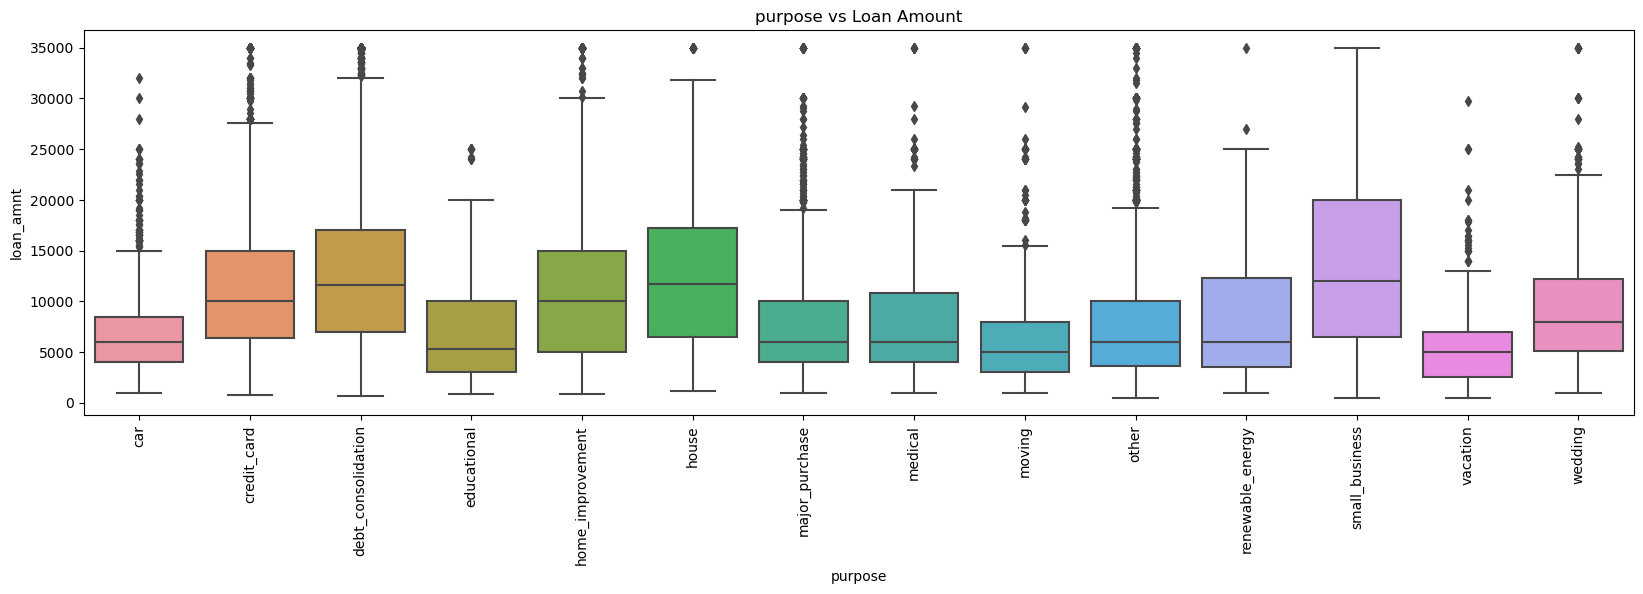

In [751]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.loan_amnt, data=loan_df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

# Observations:
More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

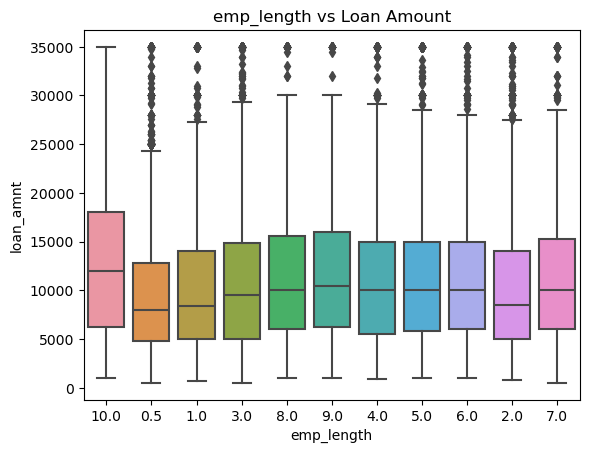

In [753]:
sns.boxplot(x='emp_length', y=loan_df.loan_amnt, data=loan_df)
plt.title('emp_length vs Loan Amount')

# Observation 
- <10 years there are more borrowers

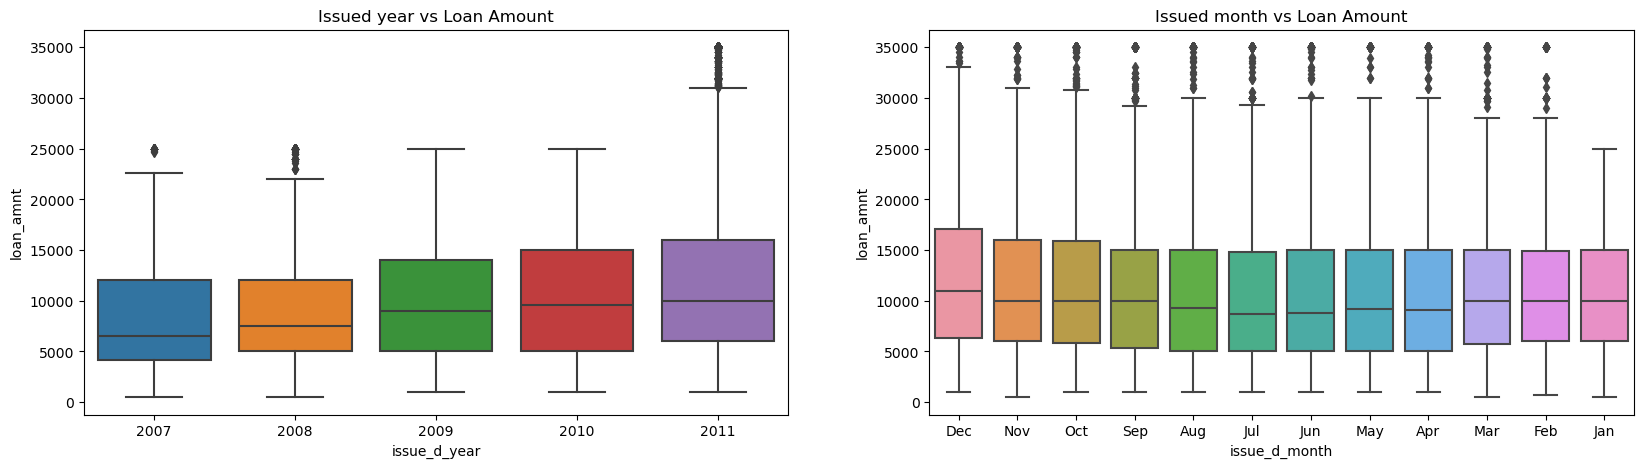

In [754]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_df.issue_d_year, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan_df.issue_d_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued month vs Loan Amount')
plt.show()

# Observation
The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.
Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.
Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

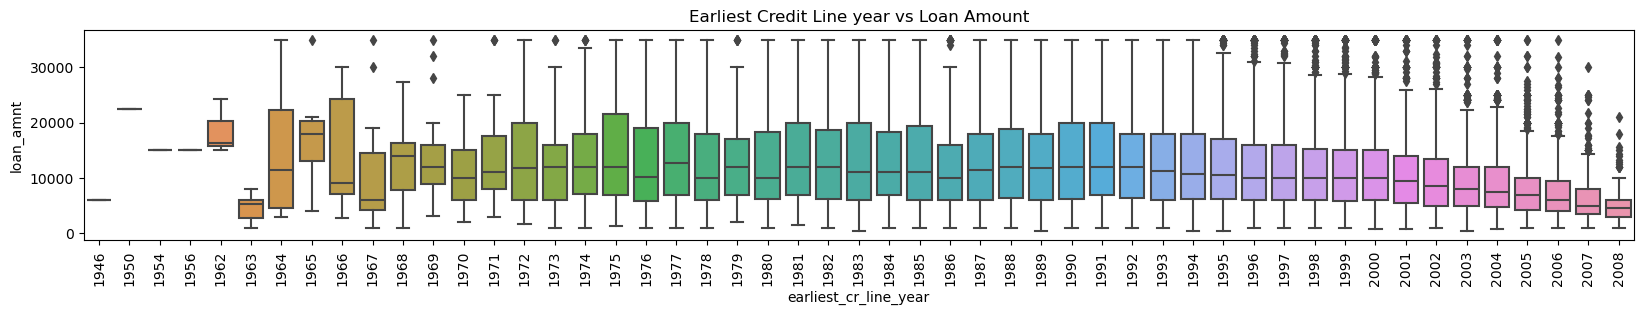

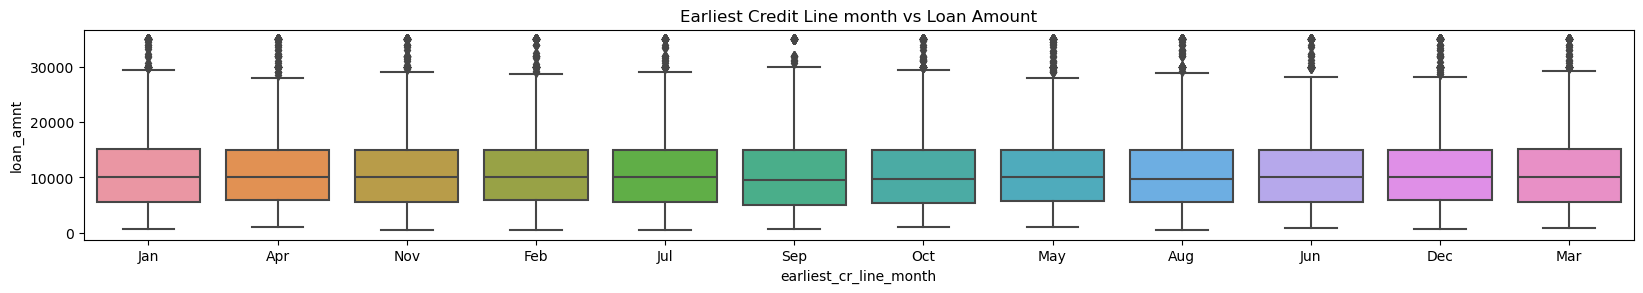

In [755]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=loan_df.earliest_cr_line_year, y=loan_df.loan_amnt, data=loan_df)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=loan_df.earliest_cr_line_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

Observations
 - Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

Text(0.5, 1.0, 'Home Ownership vs Approval Loan Amount Ratio')

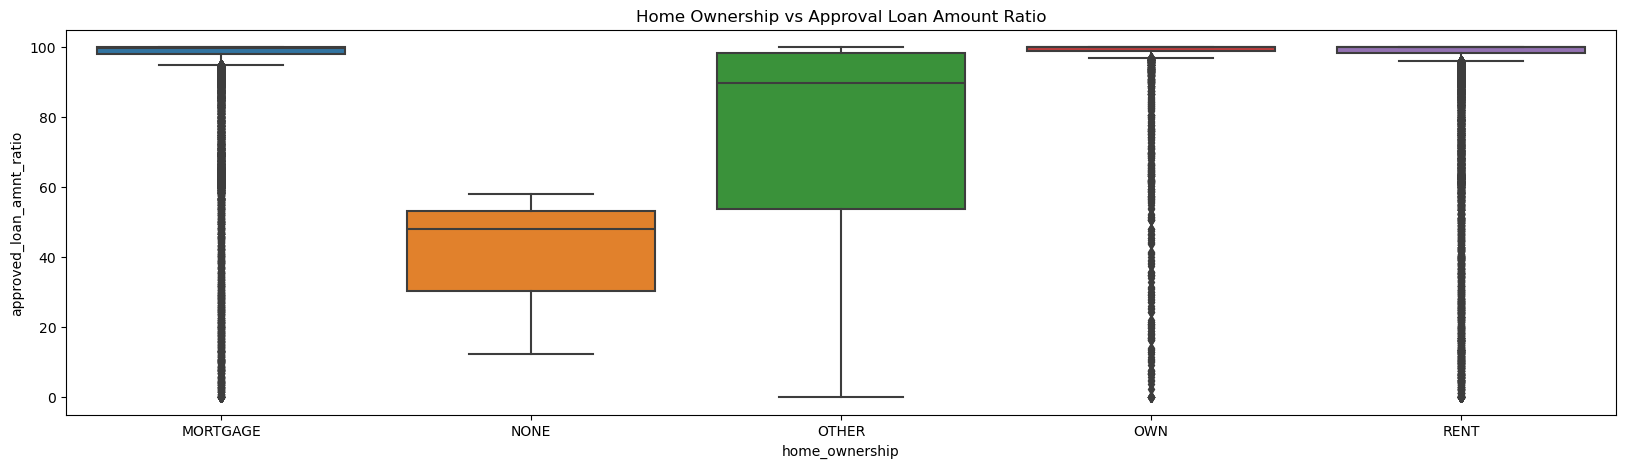

In [756]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('Home Ownership vs Approval Loan Amount Ratio')

# Observations
- Borrowers with Other home ownership are having less approved ratio which mean they got less amount than request amount.

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

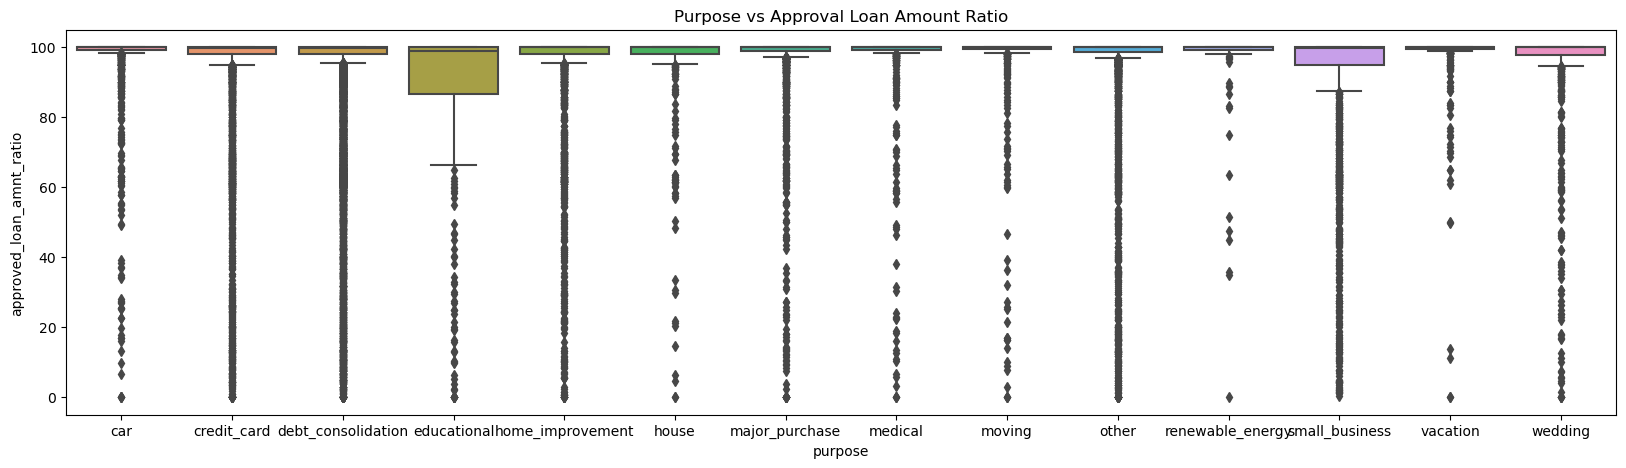

In [757]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('Purpose vs Approval Loan Amount Ratio')

# Observations:
- The Funded amount by investors is lower than requested loan amount in education and small business purposes.

Text(0.5, 1.0, 'emp_length vs Approval Loan Amount Ratio')

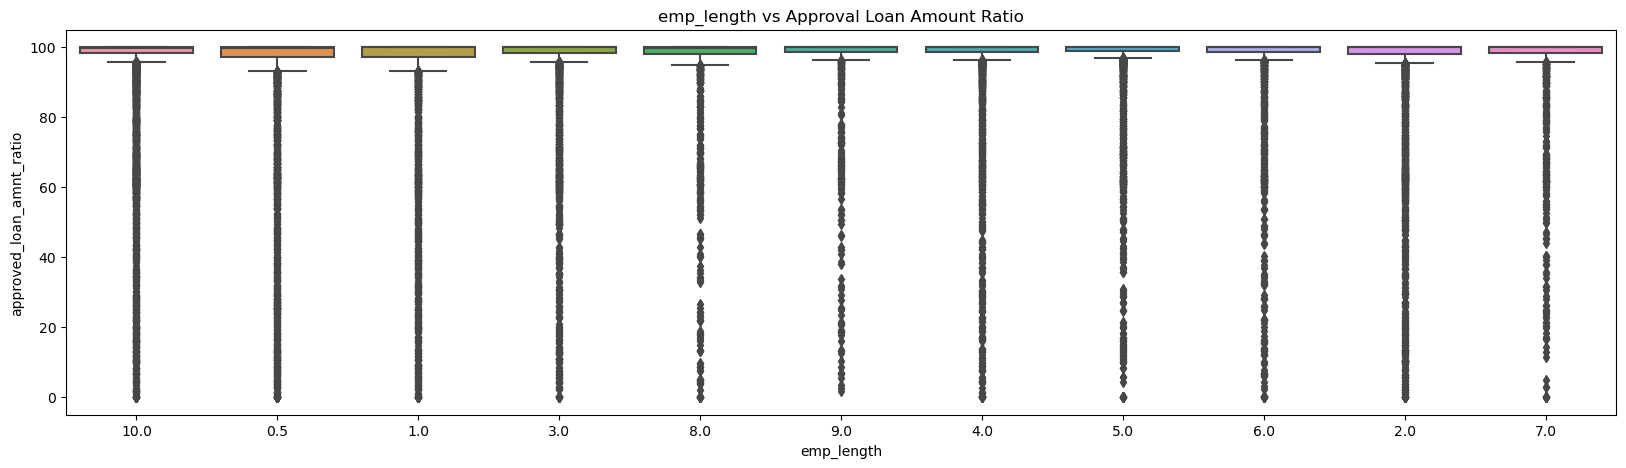

In [758]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('emp_length vs Approval Loan Amount Ratio')

# Observations:
- There is not much relation between approval of loan amount ratio and employment length

Text(0.5, 1.0, 'emp_length vs Approval Loan Amount Ratio')

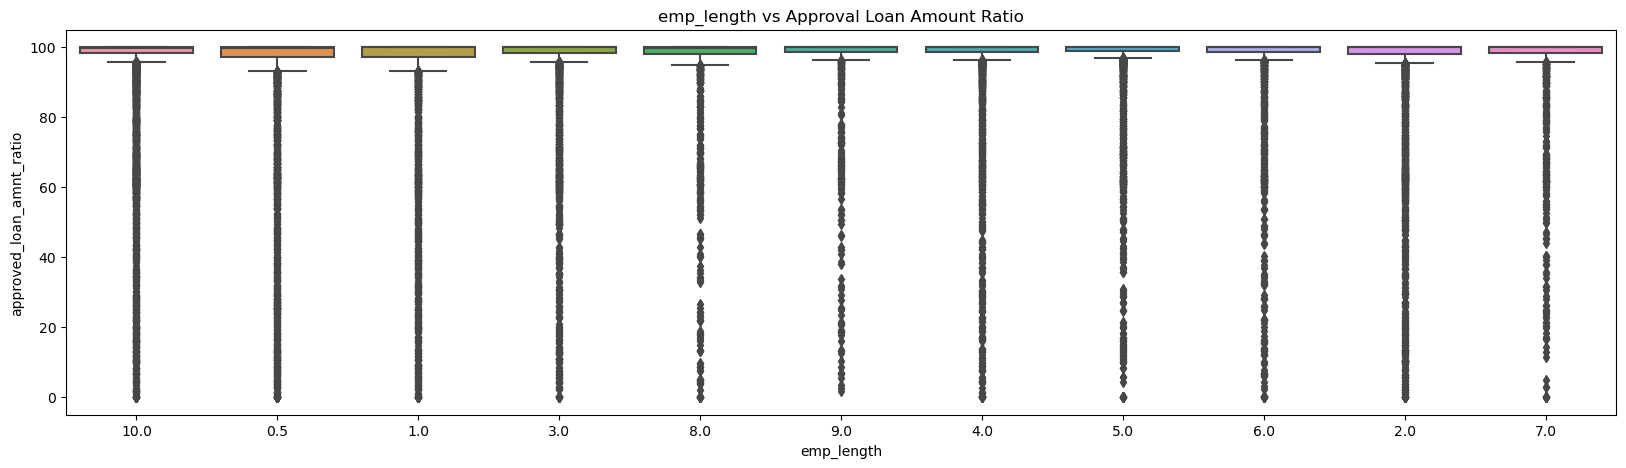

In [759]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('emp_length vs Approval Loan Amount Ratio')

# Observations:
- There is not much relation between approval of loan amount ratio and employment length

In [766]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = loan_df.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

KeyError: 'pub_rec'

<Figure size 2000x500 with 0 Axes>

# Observations
Borrowers with the earliest credit lines dating back to 1966 received a more widely spread amount of loans compared to others.

# 5. Bivariate Analysis
Bivariate Analysis: Categorical Variables
  
  Categorical Variables are:

    1. home_ownership
    2. purpose
    3. addr_state
    4. term
    5. grade
    6. sub_grade
    7. emp_length
    8. issue_yr
    9. funded_amnt
    10. int_rate_percent
    11. annual_inc
    12. dti
    13. Loan_amount

In [681]:
def crosstab(df, col):
    """
    Generates a crosstab for charge-off status against a specified column.

    df  : DataFrame
    col : Column Name

    Returns a DataFrame with charge-off counts and percentages.
    """
    charge_off = pd.crosstab(index=df[col], columns=df['loan_status'], normalize='index') * 100
    charge_off['Total'] = df[col].value_counts()
    charge_off['Percentage_Charged Off'] = charge_off.get('Charged Off', 0) # Ensure handling if 'Charged Off' doesn't exist
    return charge_off

In [682]:
def bivariate_prob(df, col, stacked=True):
    """
    Plots a bivariate analysis of loan charge-off probability and count.

    df      : DataFrame
    col     : Column Name
    stacked : True(default) for Stacked Bar
    """
    # Get dataframe from crosstab function
    plotCrosstab = crosstab(df, col)

    # Line plot for percentage charged off
    linePlot = plotCrosstab[['Percentage_Charged Off']]
    # Bar plot for number of applicants
    barPlot = plotCrosstab.iloc[:, :-1]

    ax = linePlot.plot(figsize=(20, 8), marker='o', color='b')
    ax2 = barPlot.plot(kind='bar', ax=ax, rot=0, secondary_y=True, stacked=stacked)

    ax.set_title(f'{col.title()} vs Percentage Charge Off', fontsize=20, weight="bold")
    ax.set_xlabel(col.title(), fontsize=14)
    ax.set_ylabel('Percentage of Charged Off', color='b', fontsize=14)
    ax2.set_ylabel('Number of Applicants', color='g', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

loan_status         Charged Off   Current  Fully Paid  Total  \
purpose                                                        
car                   10.354041  3.273213   86.372745   1497   
credit_card           10.200000  2.020000   87.780000   5000   
debt_consolidation    14.685890  3.108212   82.205898  18242   
educational           16.403785  0.000000   83.596215    317   
home_improvement      11.462313  3.265023   85.272664   2879   
house                 16.032609  3.804348   80.163043    368   
major_purchase         9.976359  1.654846   88.368794   2115   
medical               15.119760  1.796407   83.083832    668   
moving                15.026834  1.252236   83.720930    559   
other                 15.549178  3.130707   81.320115   3833   
renewable_energy      18.947368  1.052632   80.000000     95   
small_business        25.911385  4.094223   69.994391   1783   
vacation              14.204545  1.136364   84.659091    352   
wedding                9.850107  2.248394   87.901499    934   

loan_status         Percentage_Charged Off  
purpose                                     
car                              10.354041  
credit_card                      10.200000  
debt_consolidation               14.685890  
educational                      16.403785  
home_improvement                 11.462313  
house                            16.032609  
major_purchase                    9.976359  
medical                          15.119760  
moving                           15.026834  
other                            15.549178  
renewable_energy                 18.947368  
small_business                   25.911385  
vacation                         14.204545  
wedding                           9.850107

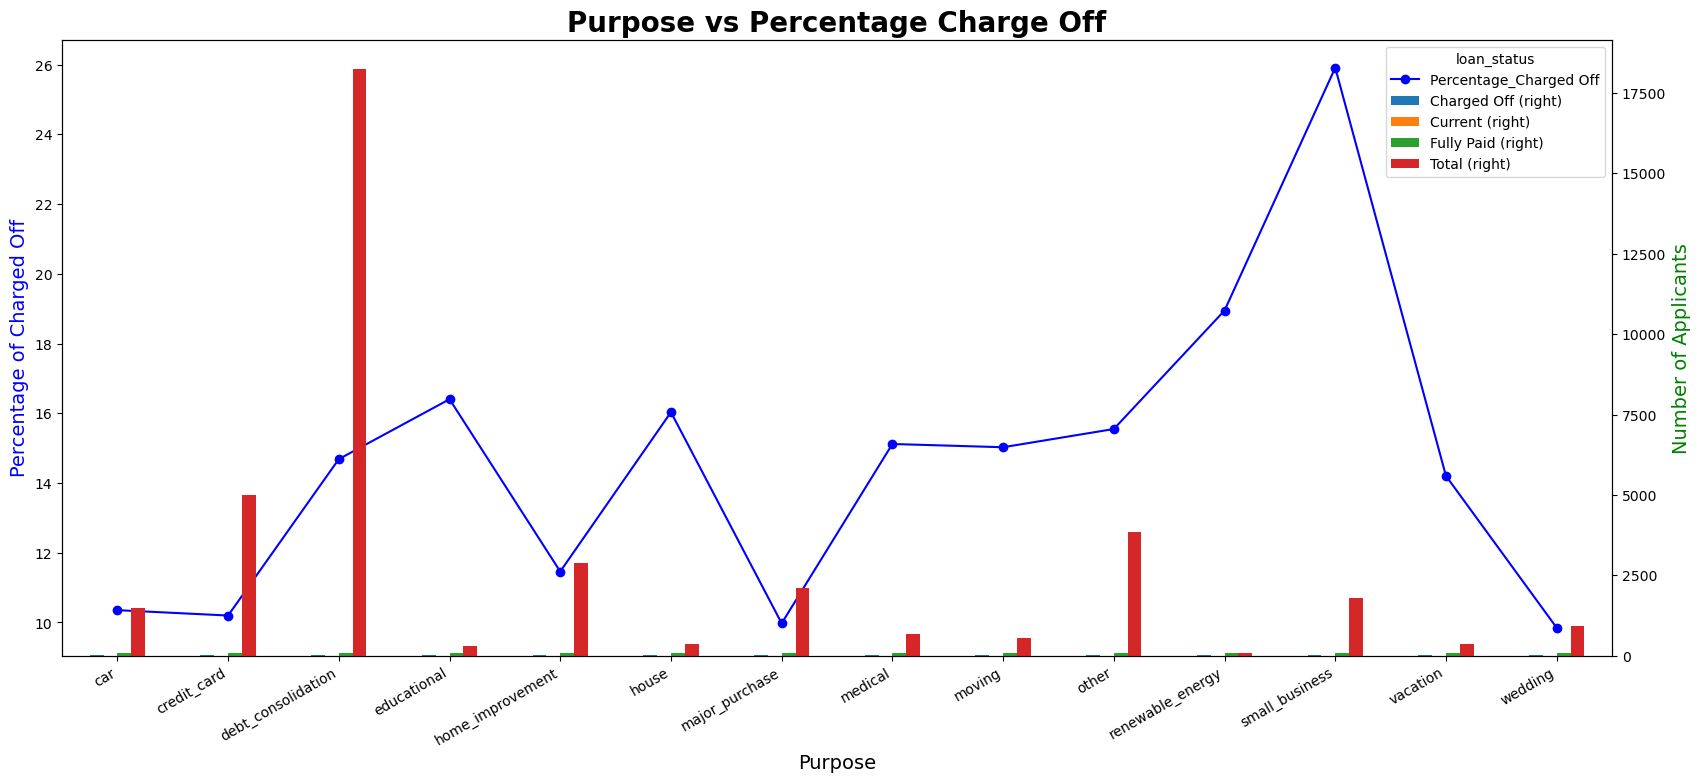

In [742]:
# Plotting the purpose with respect to the percentage of loans charged off and the number of loan applicants
loan_df = loan  
purpose_crosstab = crosstab(loan_df, 'purpose')
display(purpose_crosstab)

bivariate_prob(df=loan_df, col='purpose', stacked=False)


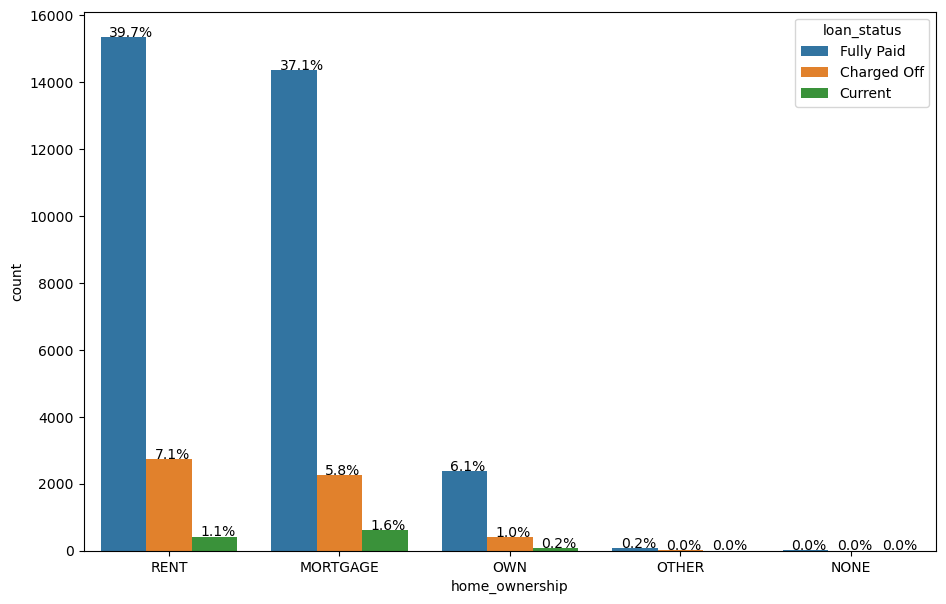

In [746]:
def series_plot(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plot.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sea.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plot.show()

# Overall ratio of Charge Offs against the total
series_plot(loan, 'home_ownership', 'loan_status')

- The right-hand side marker indicates the number of loan applicants.
- The left-hand side marker shows the percentage charged off.

# Insights from the above graph:
- Maximum number of loans, i.e., 17,500, are accepted for the purpose of Debt Consolidation,
 out of which 14,827 are fully paid, and 2,660 are charged off, resulting in a charge-off percentage of 15.2%.
- The maximum percentage of loans being charged off is for the purpose of Small Business, with a charge-off percentage of >26%.

In [684]:
#Making bins for Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

loan_status      Charged Off    Current  Fully Paid  Total  \
loan_amnt_range                                              
0-5000             13.351558   0.995079   85.653362   9145   
5000-10000         12.481143   1.151250   86.367606  12595   
10000-15000        13.011342   3.746655   83.242003   7847   
15000-20000        16.352759   5.229337   78.417904   4513   
20000-25000        17.957389   5.377071   76.665539   2957   
25000-30000        18.393782  10.362694   71.243523    772   
30000 and above    21.402214  11.439114   67.158672    813   

loan_status      Percentage_Charged Off  
loan_amnt_range                          
0-5000                        13.351558  
5000-10000                    12.481143  
10000-15000                   13.011342  
15000-20000                   16.352759  
20000-25000                   17.957389  
25000-30000                   18.393782  
30000 and above               21.402214

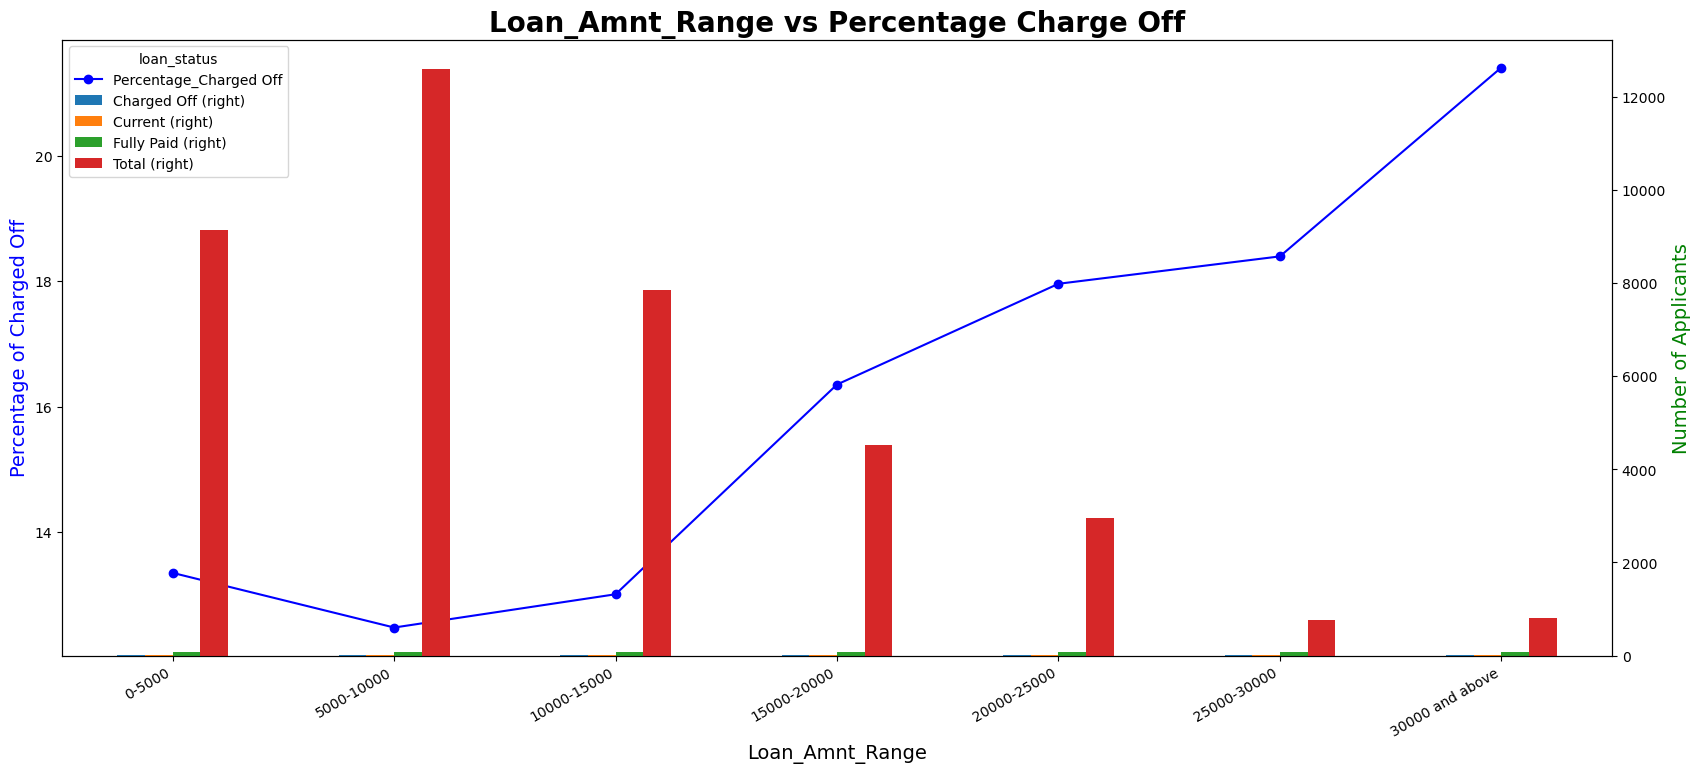

In [685]:
#Plotting the loan amount w.r.t % of loans charged off and no. of loan applicants. 
loan_amnt_range = crosstab(loan,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df =loan,col ='loan_amnt_range',stacked=False) 

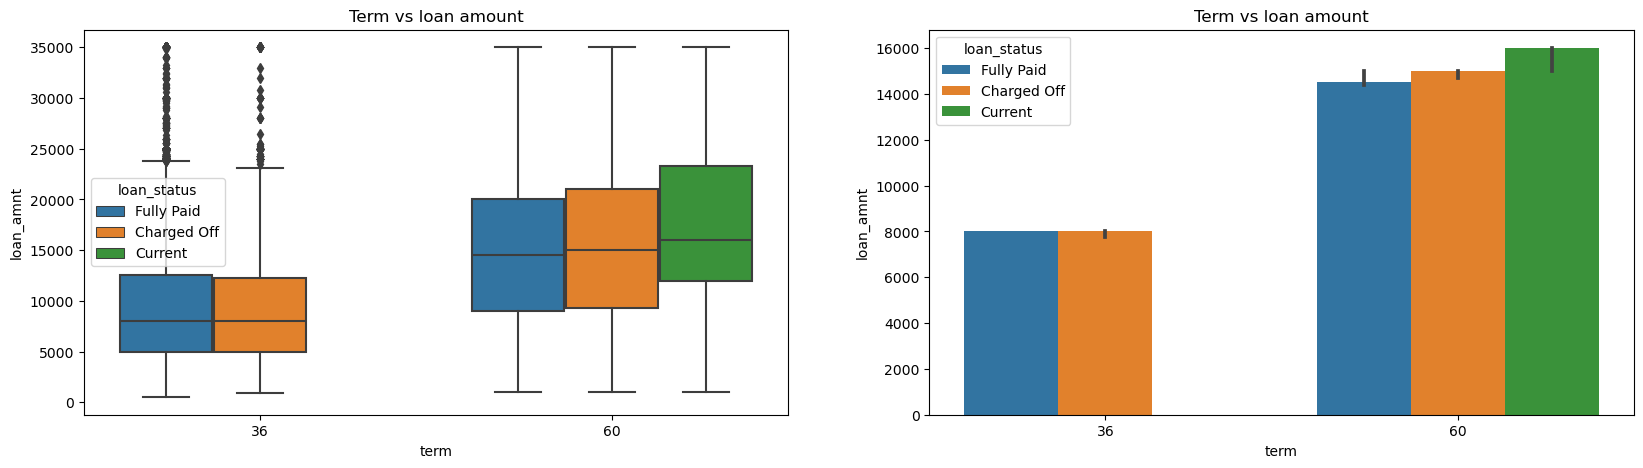

In [686]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

# Observations:
- The loan amount does not appear to be a determining factor for defaults in either 36 or 60-month loan terms.
- Borrowers have an equal distribution in both default and non-default categories for both 36 and 60-month loan tenures.

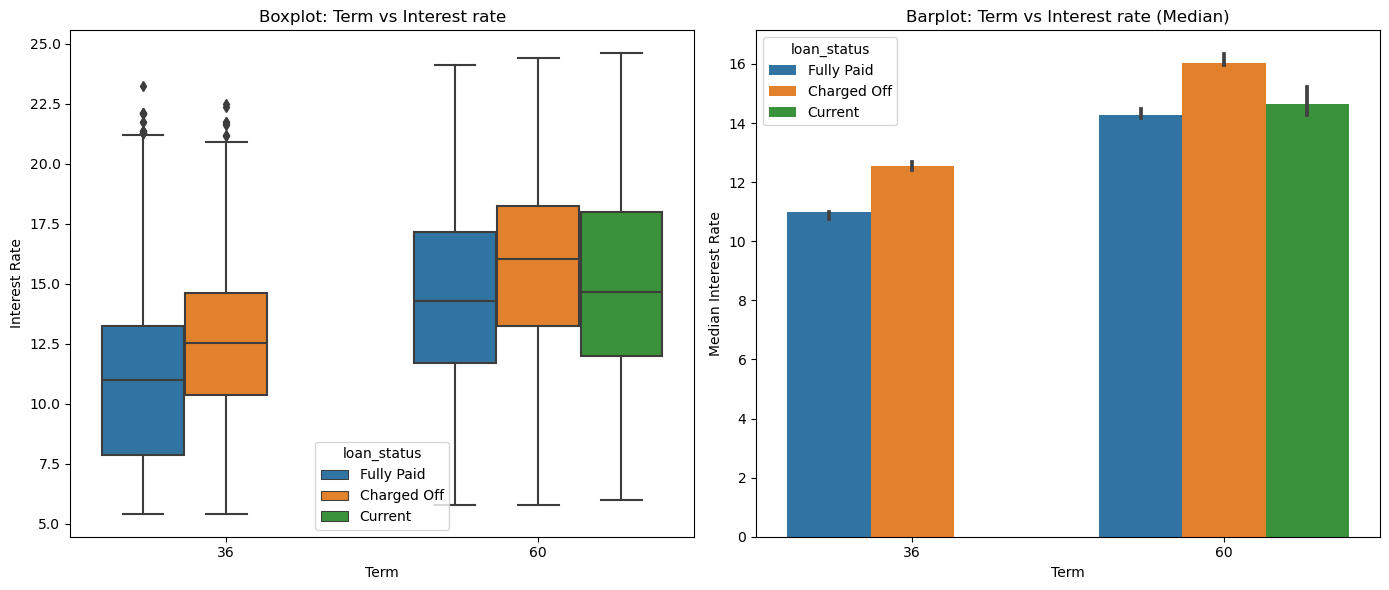

In [687]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Boxplot: Term vs Interest rate')
plt.xlabel('Term')
plt.ylabel('Interest Rate')

plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Barplot: Term vs Interest rate (Median)')
plt.xlabel('Term')
plt.ylabel('Median Interest Rate')

plt.tight_layout()
plt.show()

# Observations
For higher interest rates, the default rate is higher for both 36 and 60-month loan tenures.

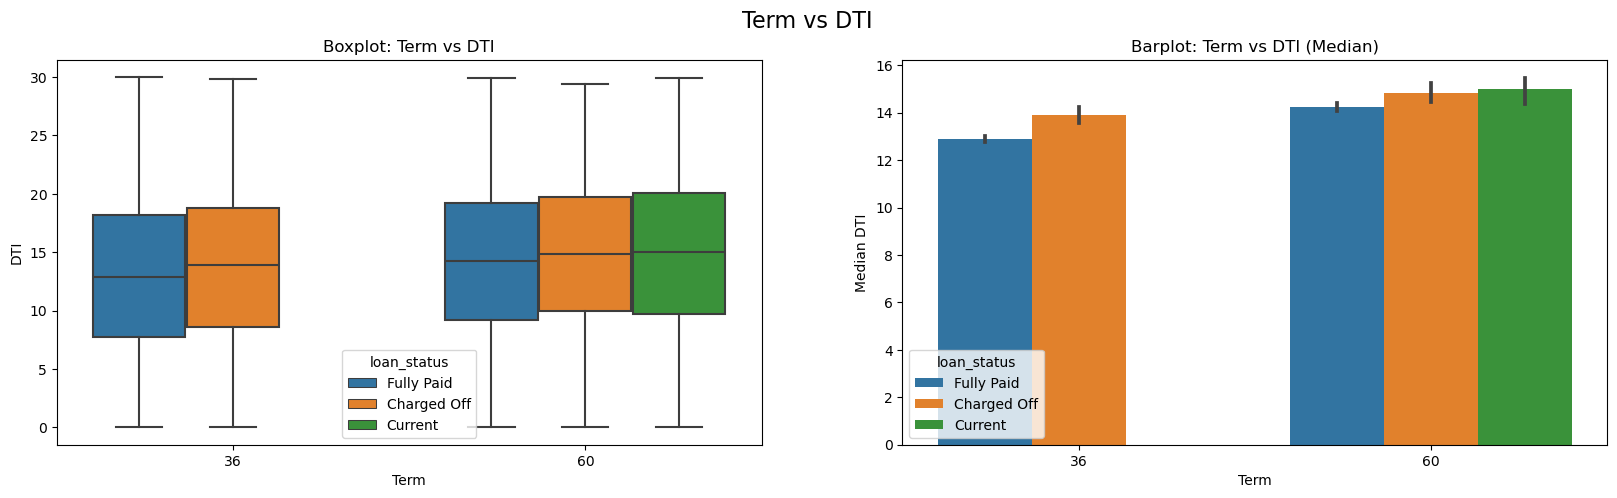

In [688]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan_df)
plt.title('Boxplot: Term vs DTI')
plt.xlabel('Term')
plt.ylabel('DTI')

plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Barplot: Term vs DTI (Median)')
plt.xlabel('Term')
plt.ylabel('Median DTI')

plt.suptitle('Term vs DTI', fontsize=16)
plt.show()

# Observations
In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

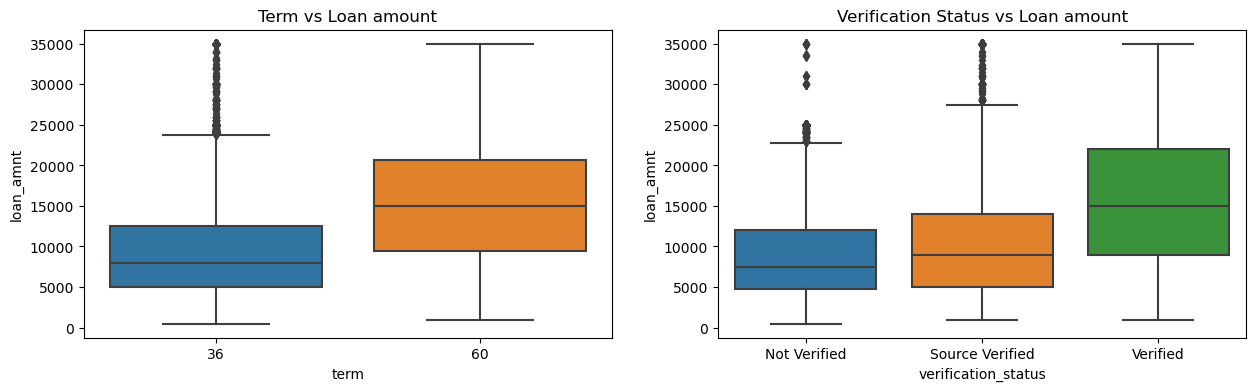

In [689]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=loan_df)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=loan_df)
plt.title("Verification Status vs Loan amount")
plt.show()

# Observations 
- charge-off are higher when compared with fully-paid for the Debit to income ratio.

loan_status     Charged Off   Current  Fully Paid  Total  \
int_rate_range                                             
0-7.5              4.515246  0.117279   95.367475   5116   
7.5-10             7.837360  0.942840   91.219800   6788   
10-12.5           12.569002  2.696391   84.734607   9420   
12.5-15           15.804149  2.810618   81.385233   8966   
15 and above      23.278163  5.632675   71.089162   7492   

loan_status     Percentage_Charged Off  
int_rate_range                          
0-7.5                         4.515246  
7.5-10                        7.837360  
10-12.5                      12.569002  
12.5-15                      15.804149  
15 and above                 23.278163

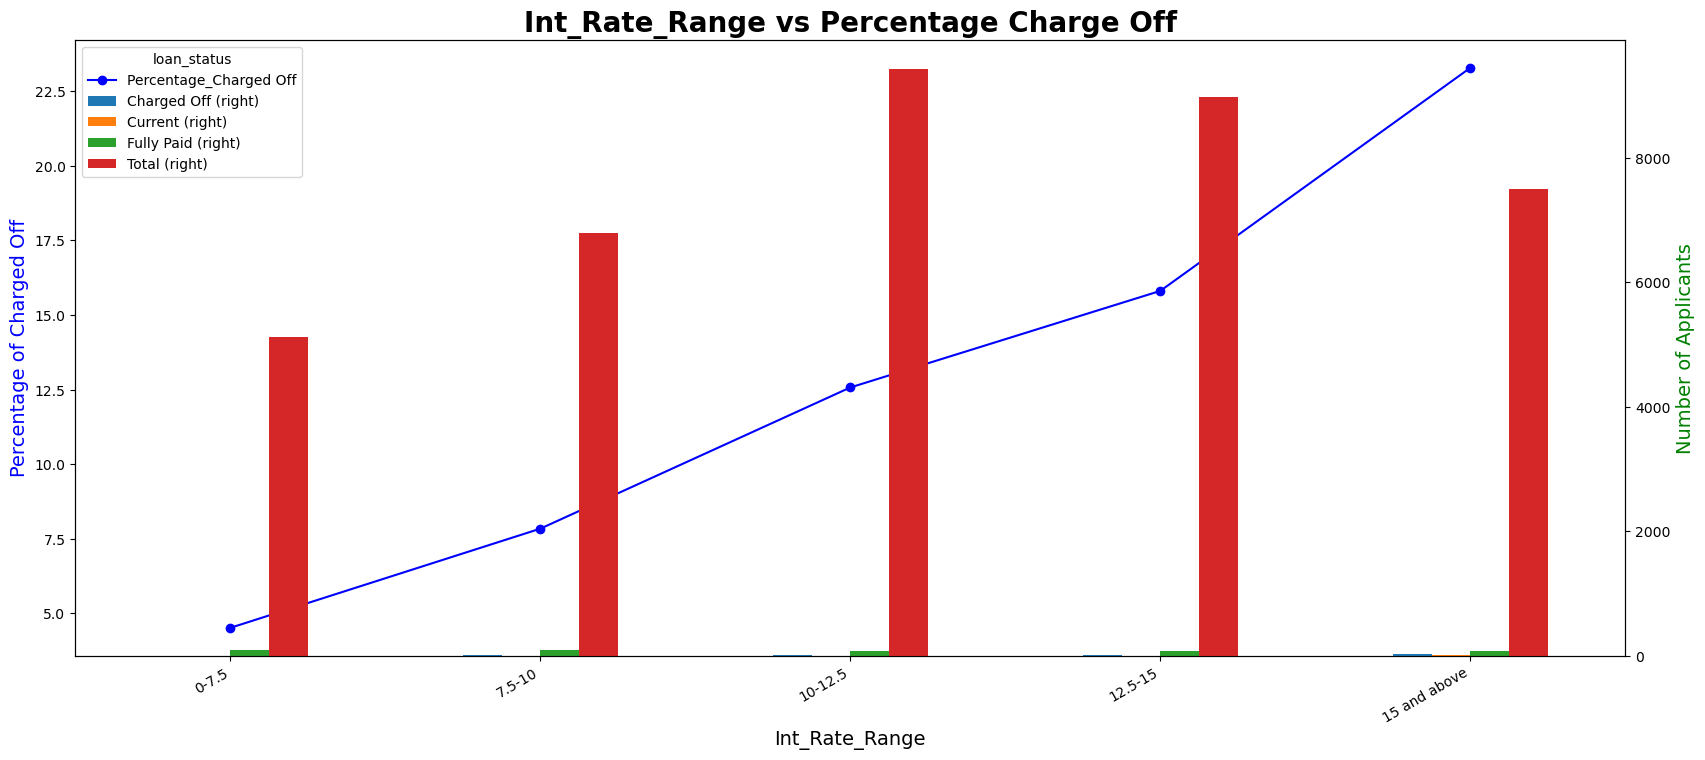

In [690]:
#Making bins for interest range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=slot)
#Plotting the int_rate_range w.r.t % of loans charged off and no. of loan applicants. 
int_rate_range = crosstab(loan_df,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan_df,col ='int_rate_range',stacked=False)

In [691]:
def set_plotting_variable(figure_title, xlabel, ylabel, xlabel_rotation, legend_flag, legend):
    
    plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    
    if legend_flag == True:
        plt.legend(loc = legend)

def plot_bivariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, 
                   x_axis, y_axis, hspace, wspace, xlabel_rotation):
    
    legend = 'best'
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'darkblue')
    # Call Custom Function
    title = "Line Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
    
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Bar Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 3
    plt.subplot(subplot_x, subplot_y, 3)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'maroon')
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Joint Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

loan_status  Charged Off   Current  Fully Paid  Total  Percentage_Charged Off
grade                                                                        
A               5.755544  0.361011   93.883445   9695                5.755544
B              11.595071  2.798220   85.606709  11686               11.595071
C              16.250315  3.242493   80.507192   7926               16.250315
D              20.885467  4.157844   74.956689   5195               20.885467
E              25.044723  6.261181   68.694097   2795               25.044723
F              30.388350  6.893204   62.718447   1030               30.388350
G              31.746032  5.396825   62.857143    315               31.746032

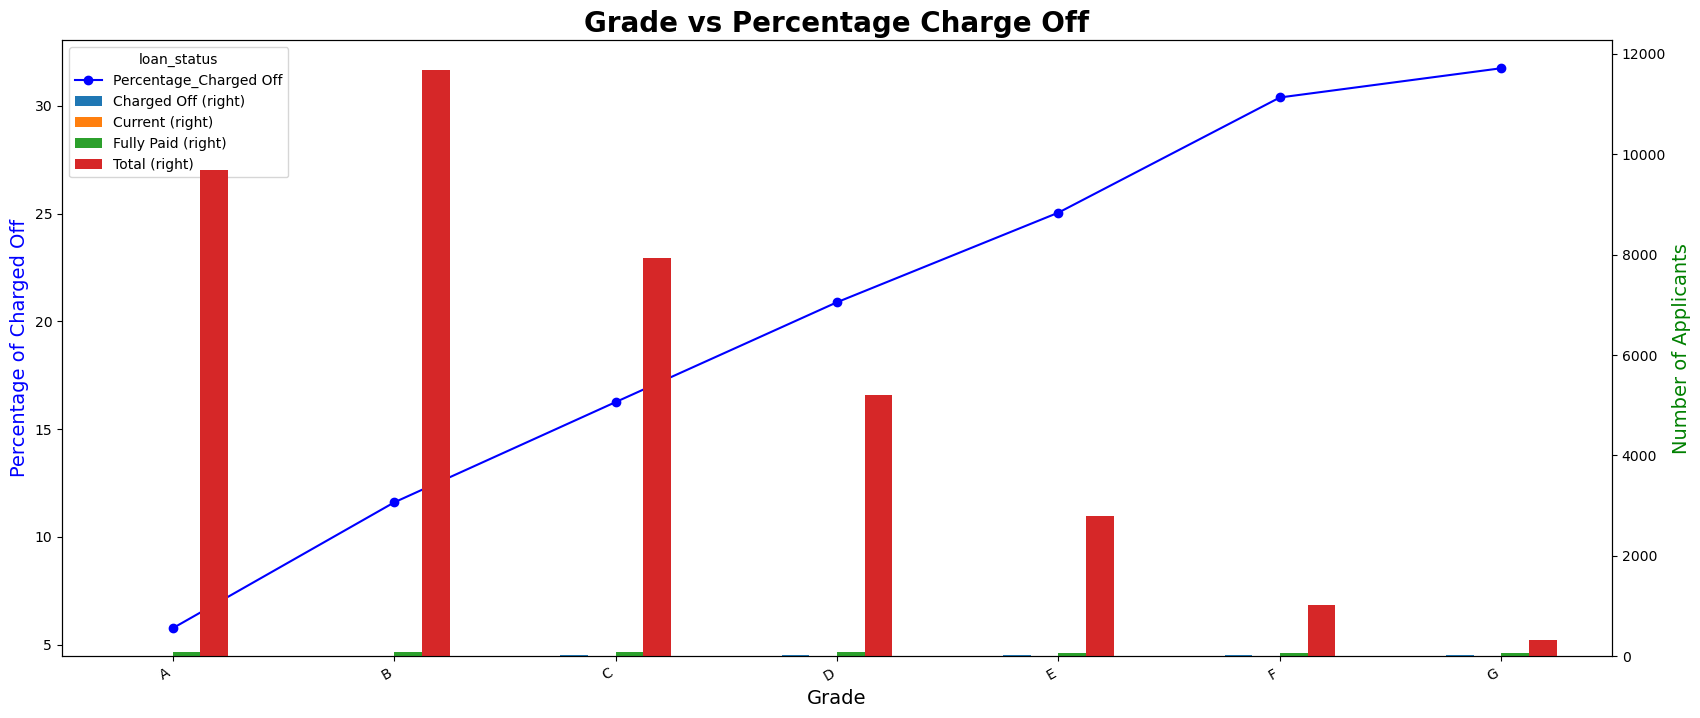

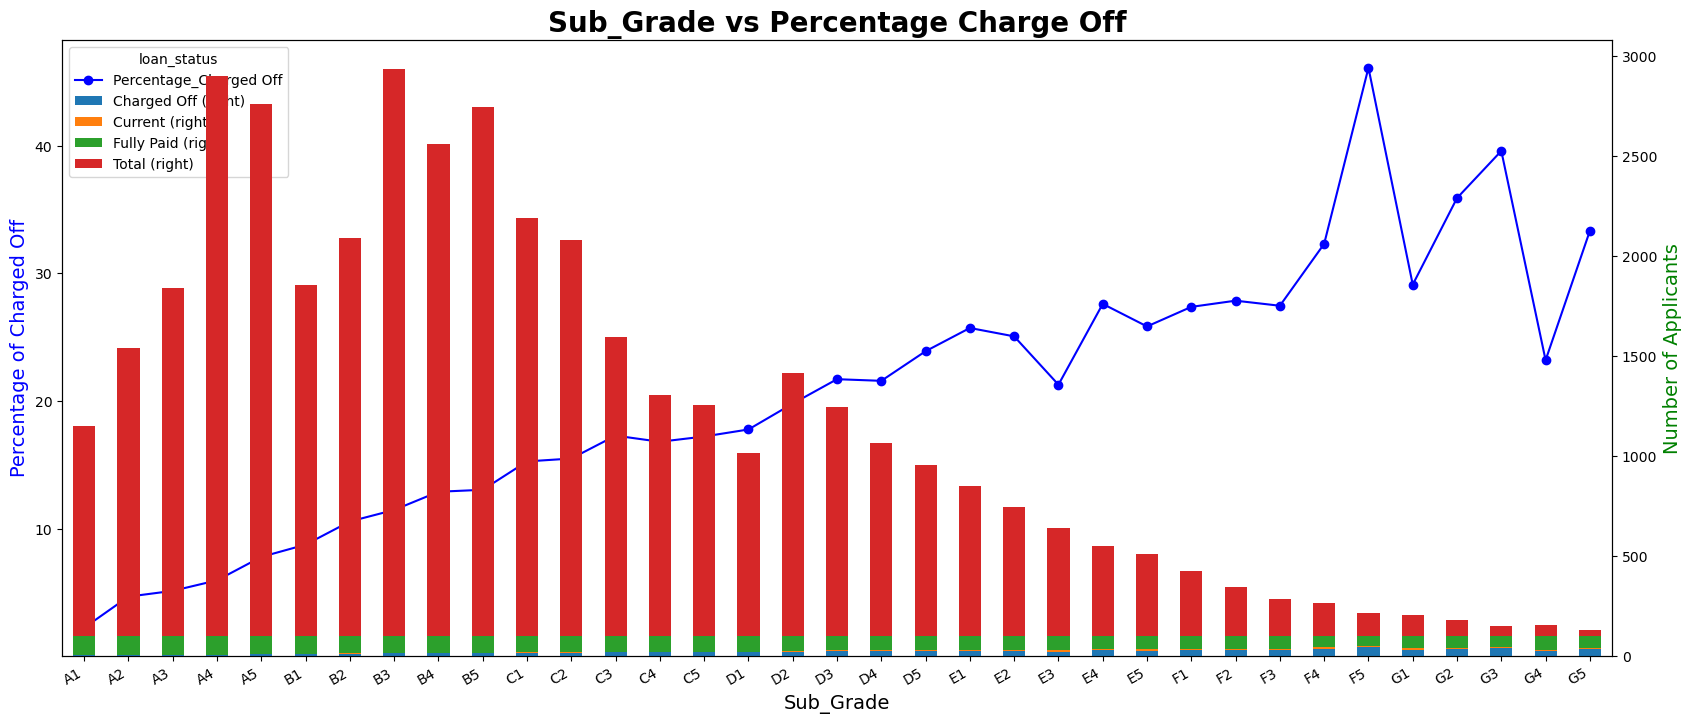

In [692]:
#Plotting the grade w.r.t % of loans charged off and no. of loan applicants. 
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False) 
#Plotting the sub grade w.r.t % of loans charged off and no. of loan applicants.
bivariate_prob(df =loan,col ='sub_grade')

loan_status      Charged Off  Current  Fully Paid    Total  Charged Off Rate
installment_rng                                                             
0-200                 1700.0    191.0     10844.0  12735.0           13.3490
200-400               1986.0    427.0     12404.0  14817.0           13.4035
400-600               1025.0    302.0      5433.0   6760.0           15.1627
600-800                421.0    131.0      2180.0   2732.0           15.4100
800-1000               243.0     47.0      1077.0   1367.0           17.7762
1000-1200               16.0      0.0       157.0    173.0            9.2486
1200-1400                8.0      0.0        50.0     58.0           13.7931


loan_status  Charged Off     Current    Fully Paid         Total  \
count           7.000000    7.000000      7.000000      7.000000   
mean          771.285714  156.857143   4592.142857   5520.285714   
std           812.122674  161.840898   5152.573578   6102.898757   
min             8.000000    0.000

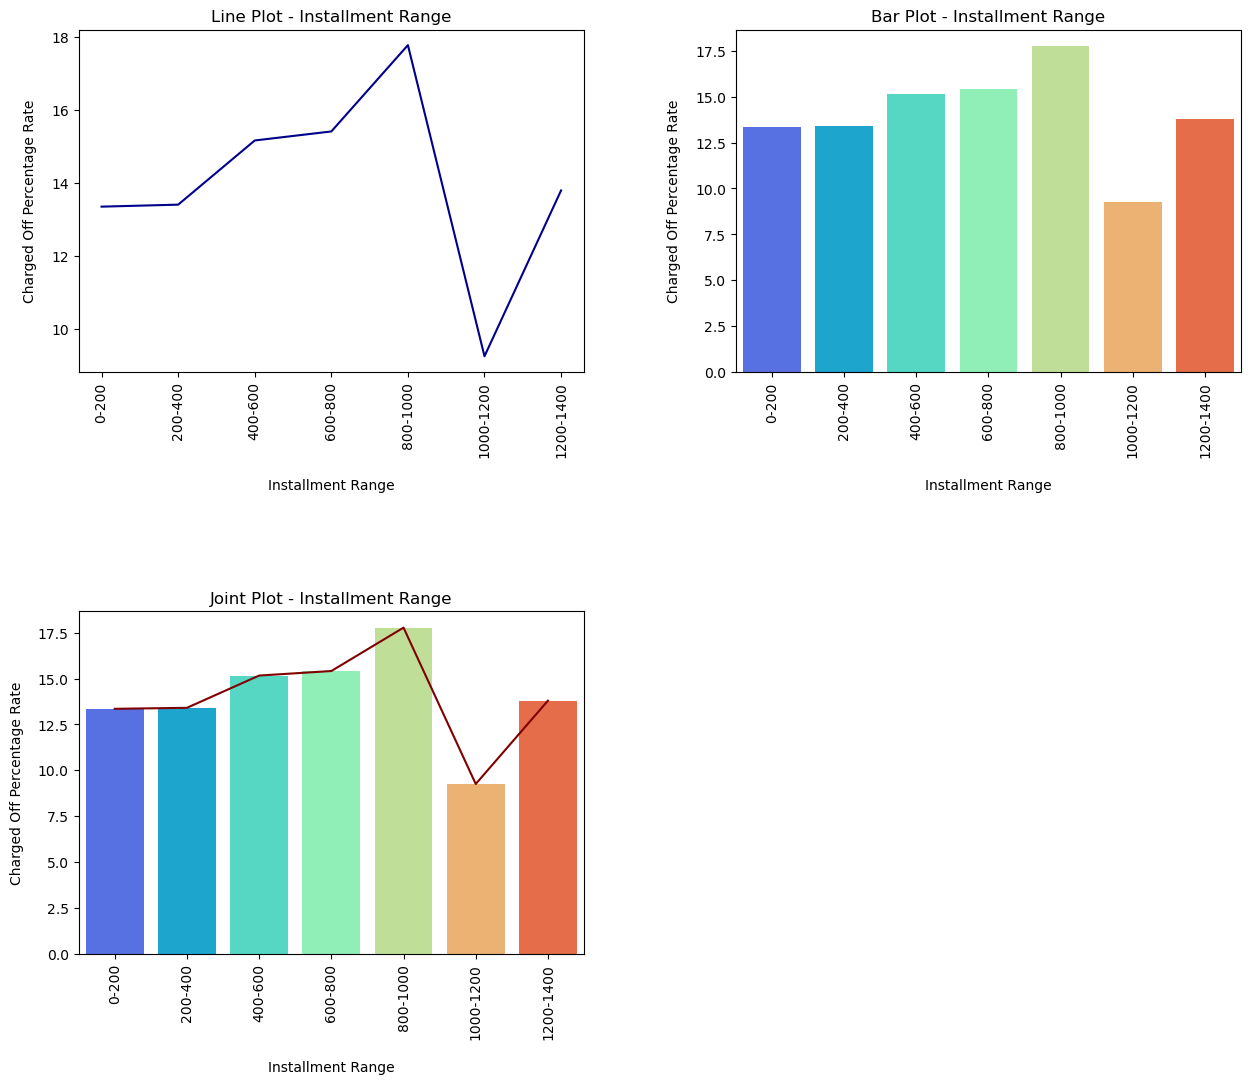

In [693]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]

rng = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400']

loan['installment_rng'] = pd.cut(loan.installment, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'installment_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Installment Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.7,
               wspace = 0.3,
               xlabel_rotation = 90)

# Observations
Charged Off Rate - Top 3 Annual Income Range:
1. 0-20000       = 19.93%
2. 20000-40000   = 17.43%
3. 40000-60000   = 14.90%

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
dti_rng                                                               
0-5                  575       90        4149   4814           11.9443
5-10                 965      194        6688   7847           12.2977
10-15               1347      260        8054   9661           13.9427
15-20               1340      266        7261   8867           15.1122
20-25               1066      233        5335   6634           16.0687
25-30                 79       50         517    646           12.2291


loan_status  Charged Off     Current   Fully Paid        Total  \
count           6.000000    6.000000     6.000000     6.000000   
mean          895.333333  182.166667  5334.000000  6411.500000   
std           490.861555   91.403319  2740.538633  3301.269256   
min            79.000000   50.000000   517.000000   646.000000   
25%           672.500000  116.000000  4445.500000  5269.000000   
50%          1015.500000  213.5000

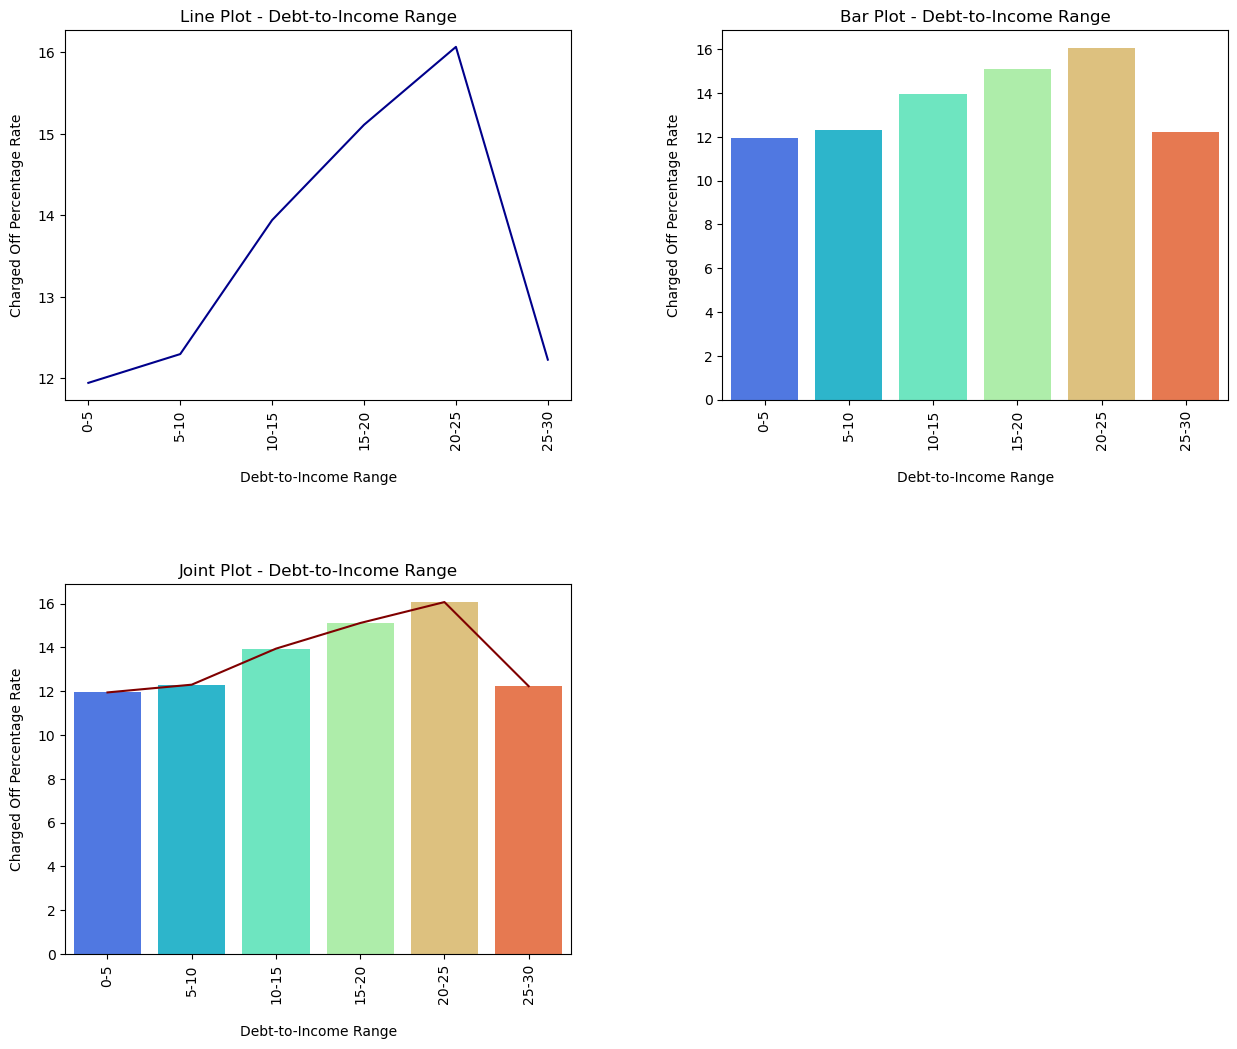

In [747]:
bins = [0, 5, 10, 15, 20, 25, 30]

rng = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

loan['dti_rng'] = pd.cut(loan.dti, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'dti_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Debt-to-Income Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

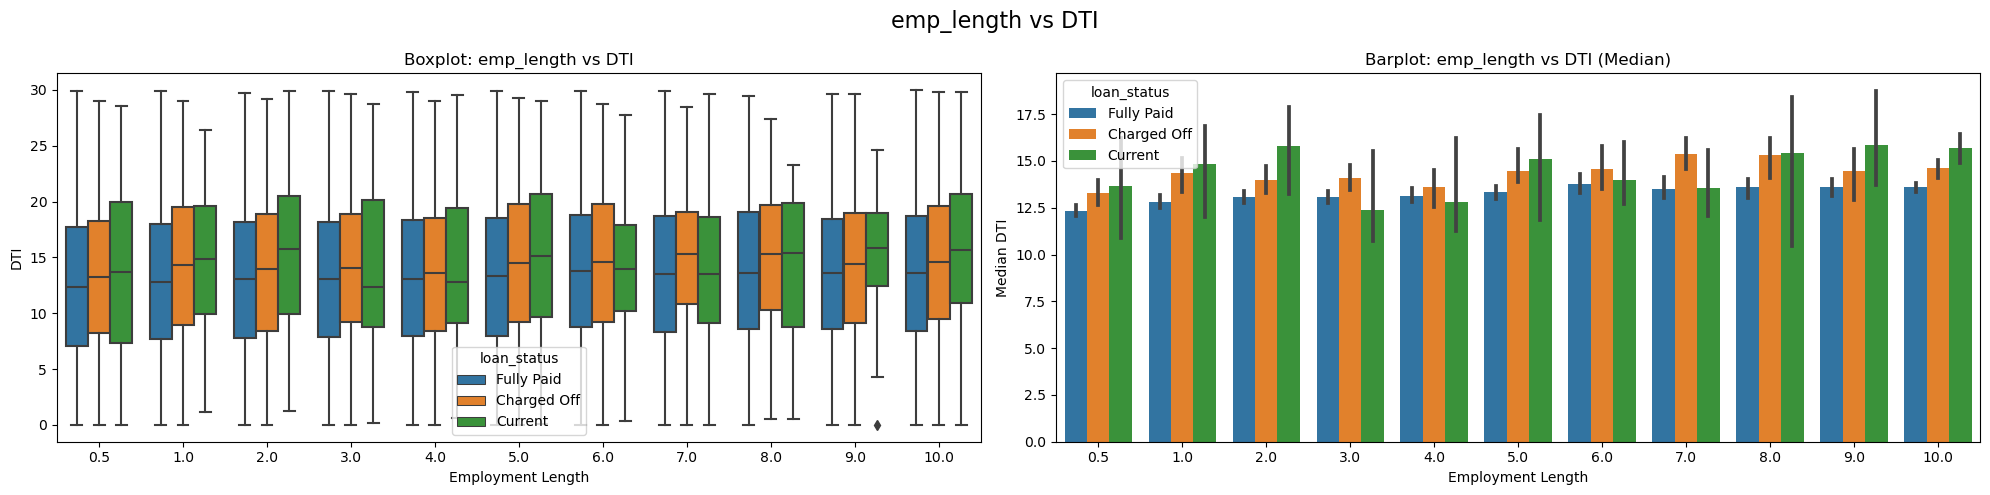

In [695]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan_df)
plt.title('Boxplot: emp_length vs DTI')
plt.xlabel('Employment Length')
plt.ylabel('DTI')

plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Barplot: emp_length vs DTI (Median)')
plt.xlabel('Employment Length')
plt.ylabel('Median DTI')

plt.suptitle('emp_length vs DTI', fontsize=16)
plt.tight_layout()
plt.show()


# Observations:
Employment Length and DTI are not showing any patterns towards defaults.

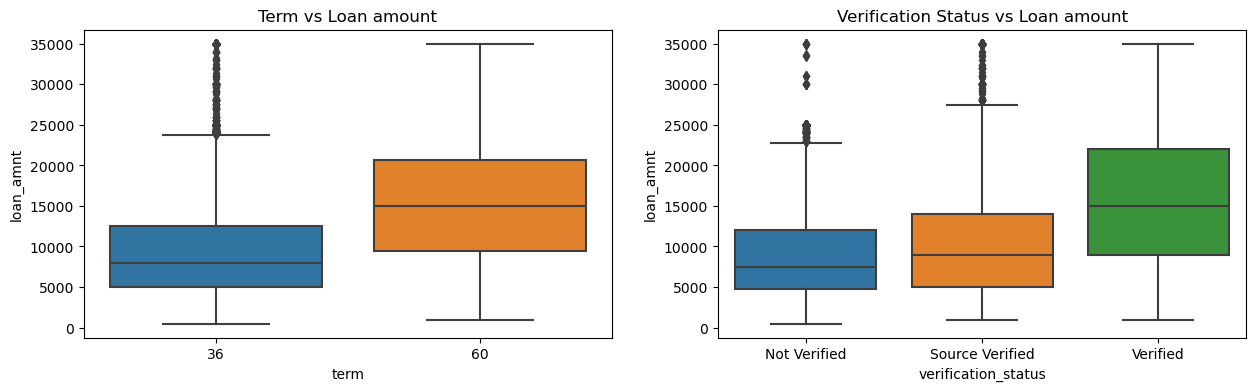

In [696]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=loan_df)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=loan_df)
plt.title("Verification Status vs Loan amount")
plt.show()

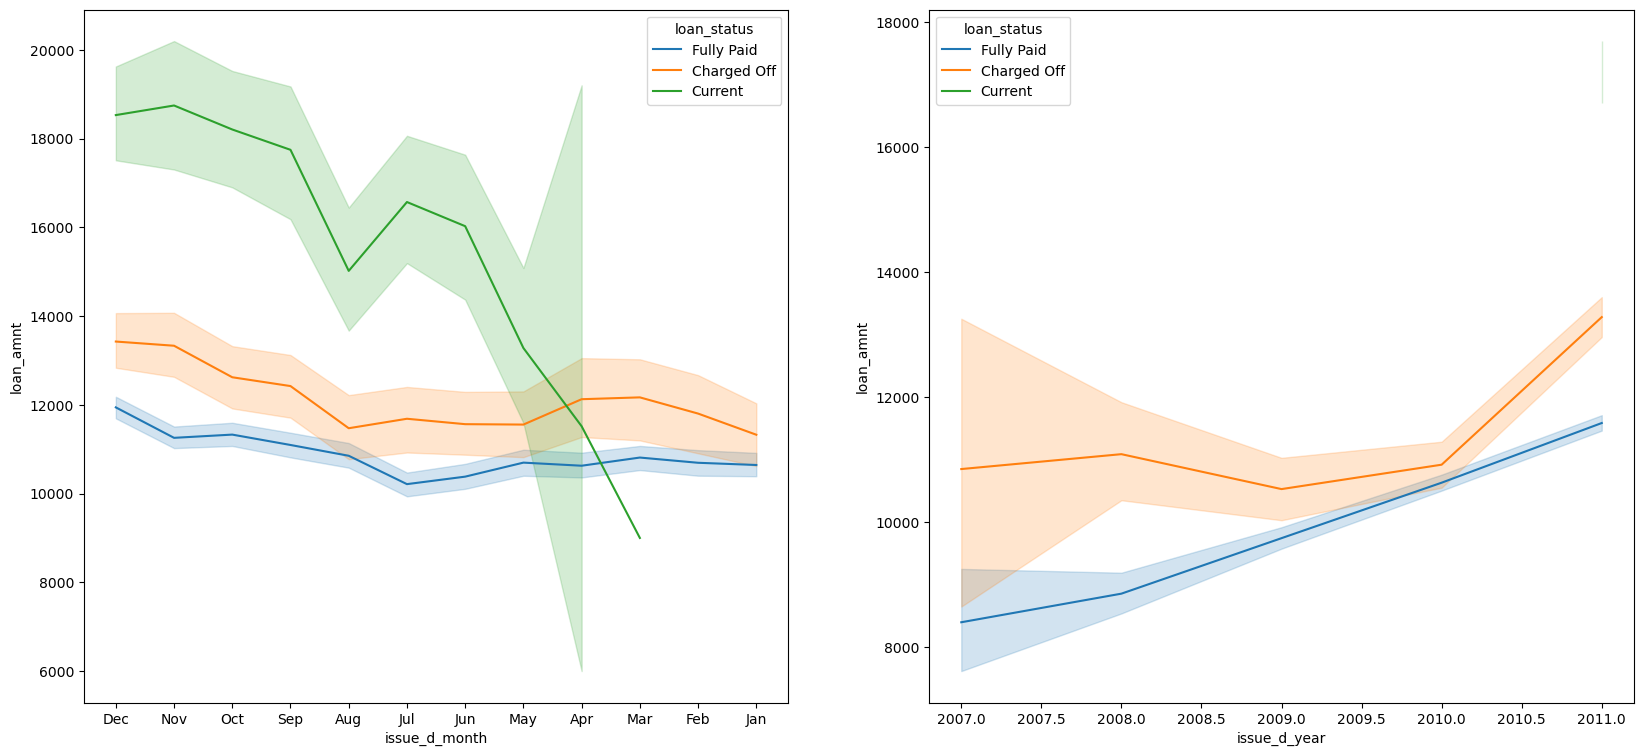

In [697]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =loan_df ,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =loan_df ,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

# Observations
- From above lineplot we can say that, higher the loam amount, more is the charged off frequency.
- And the borrower who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.

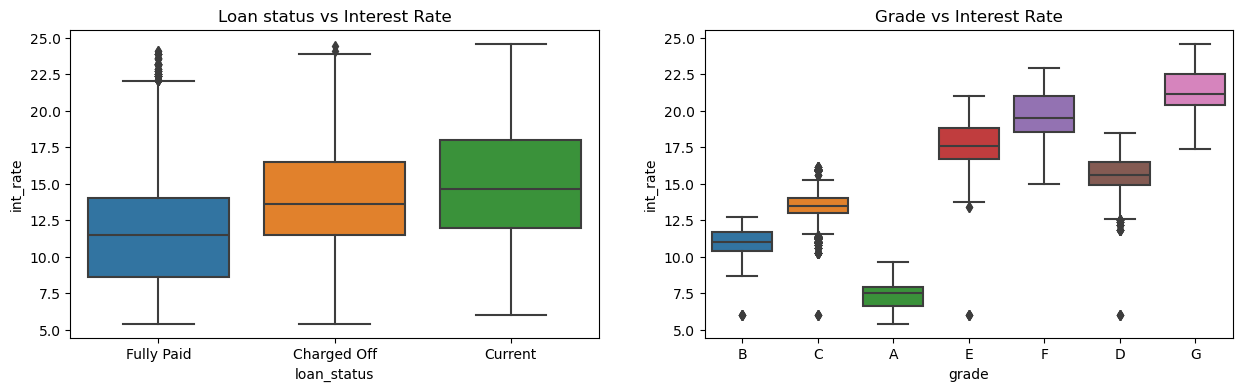

In [698]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=loan_df)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_df["grade"].unique()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=loan_df)
plt.title("Grade vs Interest Rate")
plt.show()

# Observations
- For the loan status vs. interest rate variable, we observe that borrowers with higher interest rates are more likely to default.
- In the grade vs. interest rate analysis, it is evident that as the grade decreases, the interest rate increases.

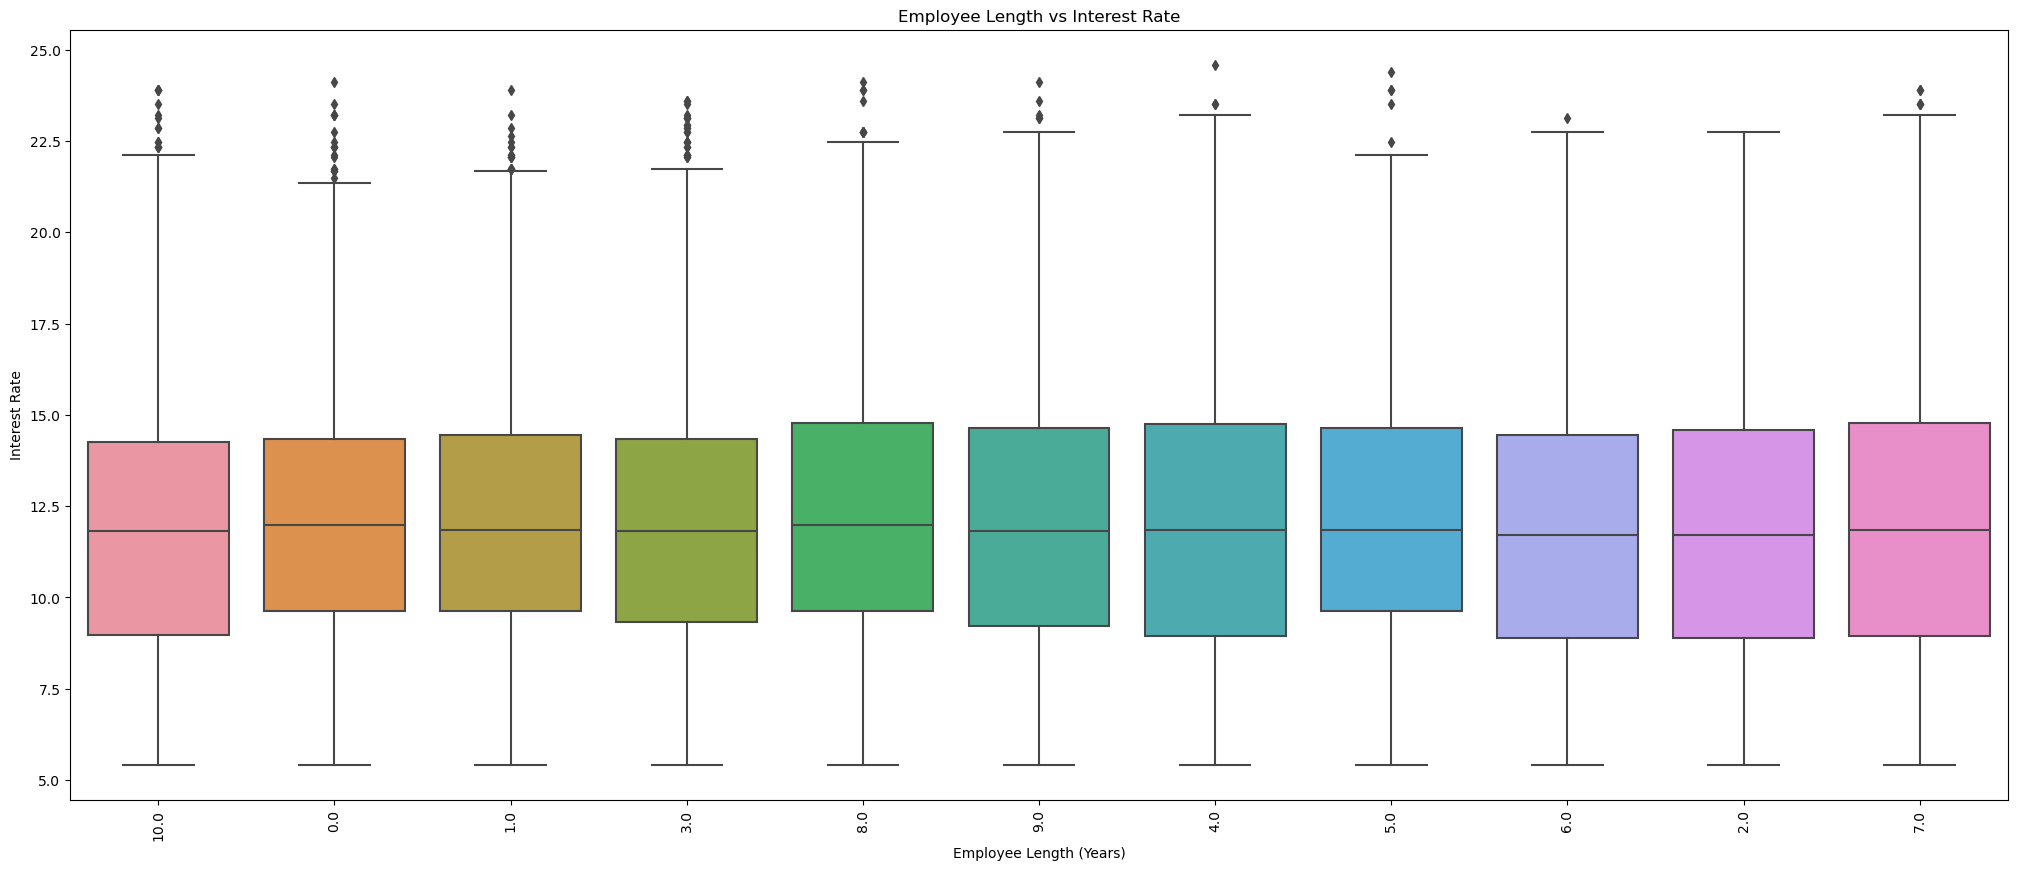

In [699]:

loan_df['emp_length'] = loan_df['emp_length'].astype(str)

# Extract numerical part as emp_length_years
loan_df['emp_length_years'] = loan_df['emp_length'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(25, 10))
sns.boxplot(x="emp_length_years", y="int_rate", data=loan_df)
plt.title("Employee Length vs Interest Rate")
plt.xlabel("Employee Length (Years)")
plt.ylabel("Interest Rate")
plt.xticks(rotation=90)

# Set custom tick labels
plt.gca().set_xticklabels(loan_df['emp_length_years'].unique())

plt.show()

# Observations
- There doesn't seem to be a strong relationship between employment length and interest rate.

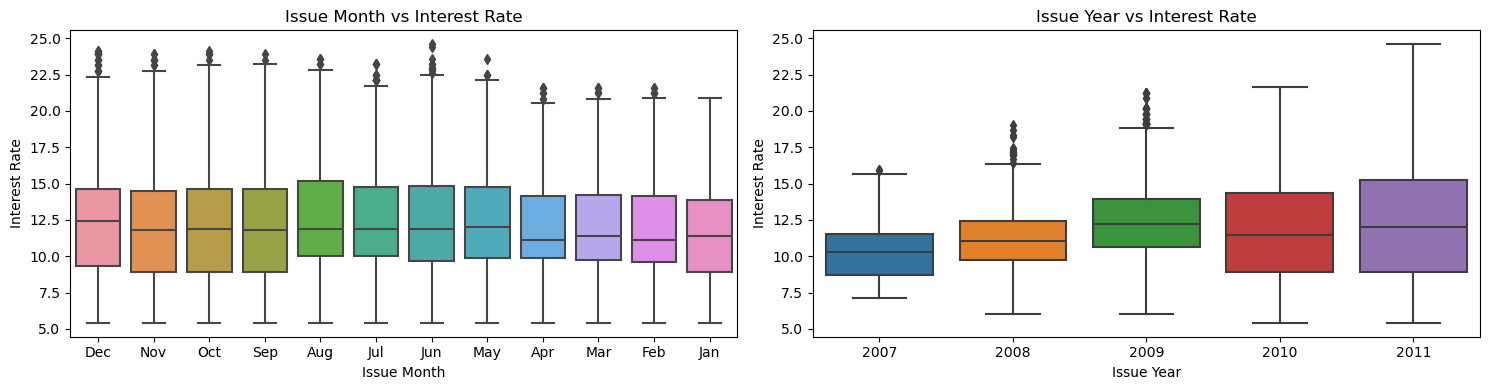

In [700]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x="issue_d_month", y="int_rate", data=loan_df)
plt.title("Issue Month vs Interest Rate")
plt.xlabel("Issue Month")
plt.ylabel("Interest Rate")

plt.subplot(1, 2, 2)
sns.boxplot(x="issue_d_year", y="int_rate", data=loan_df)
plt.title("Issue Year vs Interest Rate")
plt.xlabel("Issue Year")
plt.ylabel("Interest Rate")

plt.tight_layout()
plt.show()

# Observations
The interest rates vary throughout the year, showing diversification in trends. However, the median interest rate remains relatively constant across different months.

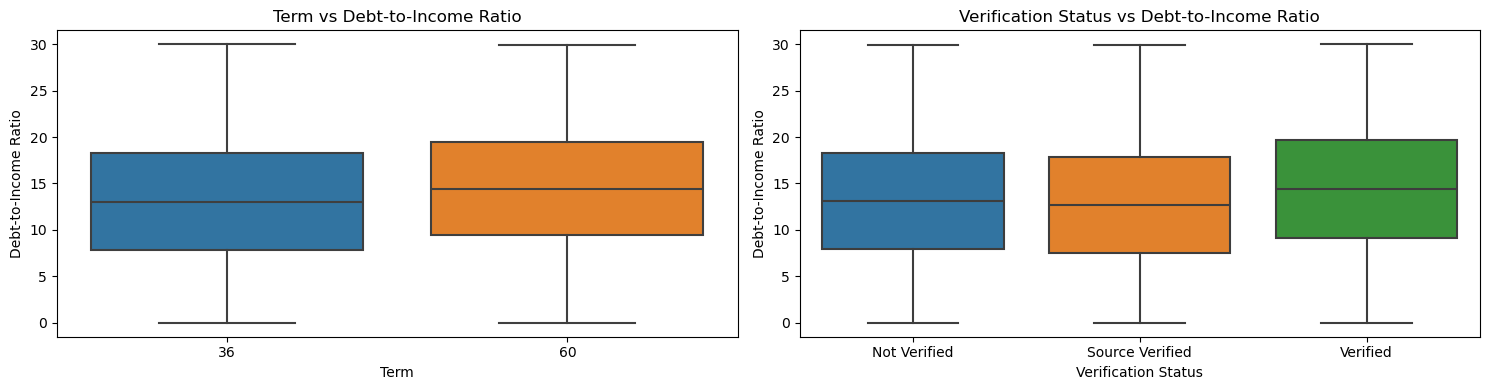

In [701]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x="term", y="dti", data=loan_df)
plt.title("Term vs Debt-to-Income Ratio")
plt.xlabel("Term")
plt.ylabel("Debt-to-Income Ratio")

plt.subplot(1, 2, 2)
sns.boxplot(x="verification_status", y="dti", data=loan_df)
plt.title("Verification Status vs Debt-to-Income Ratio")
plt.xlabel("Verification Status")
plt.ylabel("Debt-to-Income Ratio")

plt.tight_layout()
plt.show()

# Observations
- In interest rate vs term variable we can say that, dti ratio is high for the borrower who has 60 months tenure.
- In Verification status vs dti we can say that, verified borrowers are having high dti ratio.

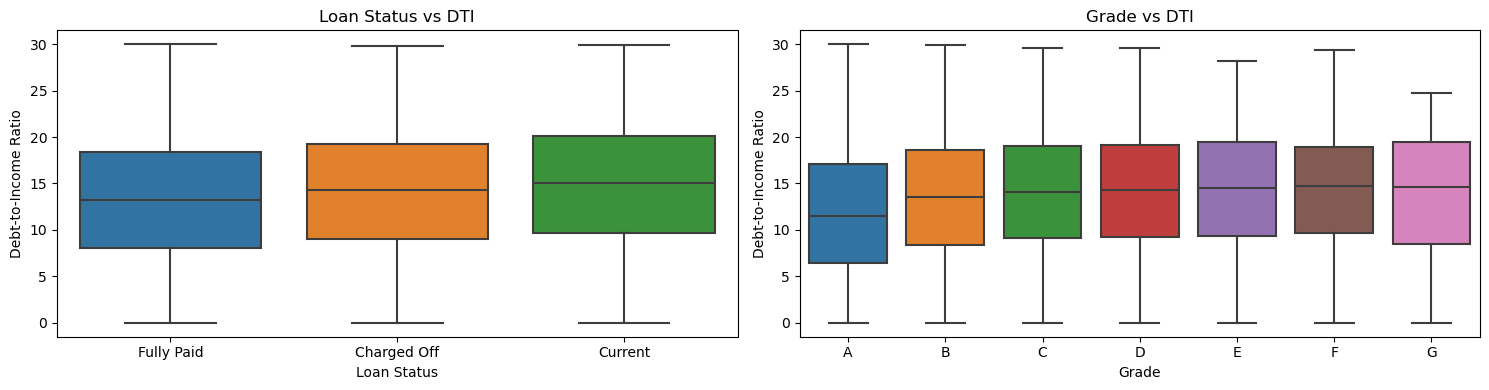

In [702]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x="loan_status", y="dti", data=loan_df)
plt.title("Loan Status vs DTI")
plt.xlabel("Loan Status")
plt.ylabel("Debt-to-Income Ratio")

plt.subplot(1, 2, 2)
# Arrange grade in alphabetical ascending order
grade_order = loan_df["grade"].sort_values().unique()
sns.boxplot(x="grade", y="dti", order=grade_order, data=loan_df)
plt.title("Grade vs DTI")
plt.xlabel("Grade")
plt.ylabel("Debt-to-Income Ratio")

plt.tight_layout()
plt.show()

# Observations
- A significant proportion of borrowers who defaulted have a high debt-to-income (DTI) ratio.
- There is an increasing trend in DTI ratio as the grade decreases.

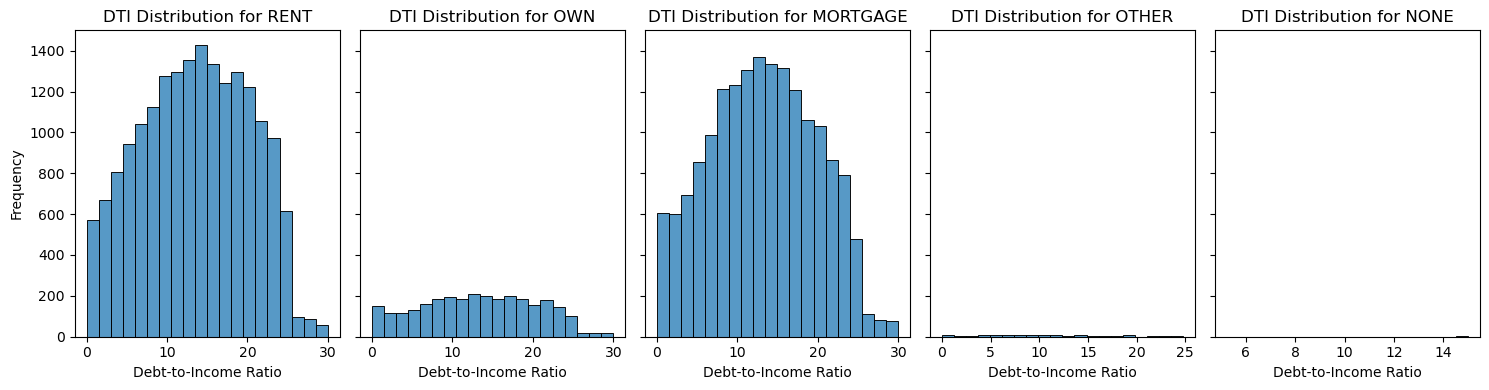

In [703]:
fig, axs = plt.subplots(1, len(loan_df['home_ownership'].unique()), figsize=(15, 4), sharey=True)

# Create a histogram for each home ownership category
for i, ownership_type in enumerate(loan_df['home_ownership'].unique()):
    sns.histplot(loan_df[loan_df['home_ownership'] == ownership_type]['dti'], ax=axs[i], bins=20)
    axs[i].set_title(f"DTI Distribution for {ownership_type}")
    axs[i].set_xlabel("Debt-to-Income Ratio")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Observations
In dti vs home own variable we can say that, the borrower with own and rent home status are having high dti ratio than others.

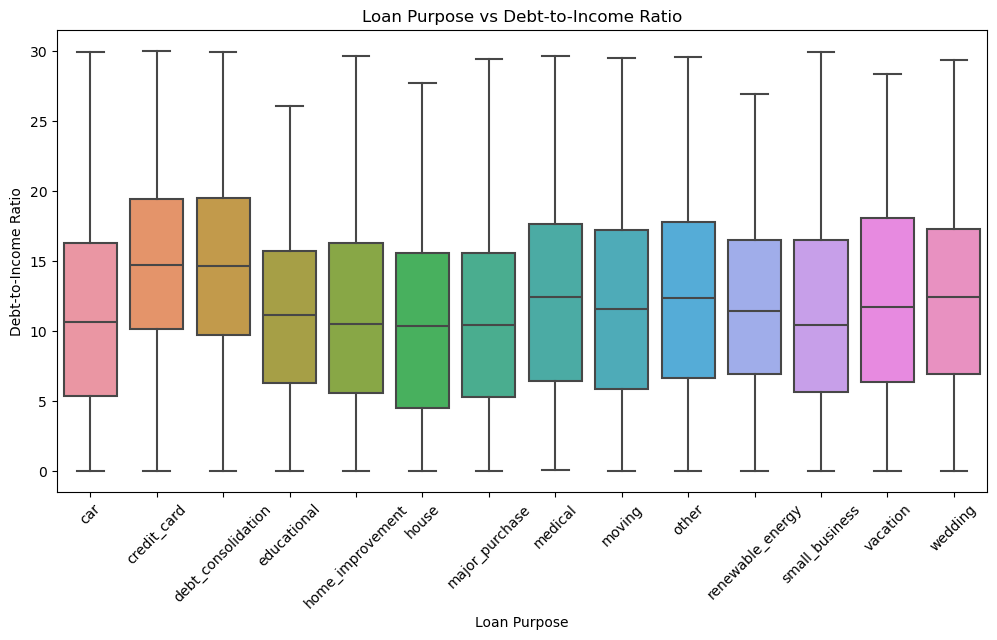

In [704]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="purpose", y="dti", data=loan_df)
plt.title("Loan Purpose vs Debt-to-Income Ratio")
plt.xlabel("Loan Purpose")
plt.ylabel("Debt-to-Income Ratio")
plt.xticks(rotation=45)
plt.show()

# Observations
- In purpose vs dti variable we can say that, the borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others.

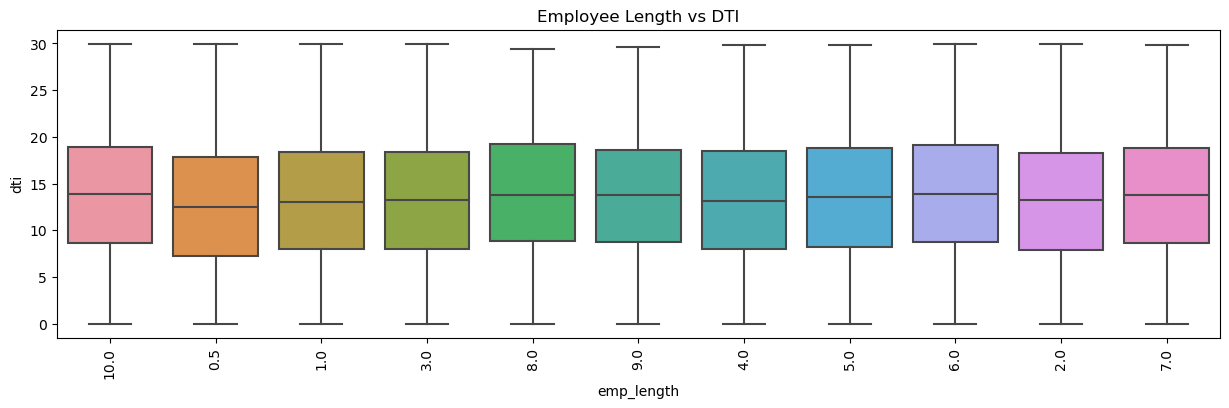

In [705]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="dti", data=loan_df)
plt.title("Employee Length vs DTI")
plt.xticks(rotation=90)
plt.show()

# Observations
There is no much relation between employee length and dti ratio.

In [706]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = loan_df.groupby(['annual_inc', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid'] 
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']
#sorting the chargedoff proportion in descending order
annual_inc_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  annual_inc  Charged Off  Current  Fully Paid  Total  \
929             35832.0          1.0      0.0         0.0    1.0   
704             32100.0          1.0      0.0         0.0    1.0   
3203            72780.0          1.0      0.0         0.0    1.0   
4604           132600.0          1.0      0.0         0.0    1.0   
3616            82320.0          1.0      0.0         0.0    1.0   
...                 ...          ...      ...         ...    ...   
4958           248000.0          0.0      1.0         0.0    0.0   
4995           291996.0          0.0      1.0         0.0    0.0   
5026           368000.0          0.0      1.0         0.0    0.0   
5048           470000.0          0.0      1.0         0.0    0.0   
5070           650000.0          0.0      1.0         0.0    0.0   

loan_status  Chargedoff_Proportion  
929                            1.0  
704                            1.0  
3203                           1.0  
4604                           1.0  
3616                           1.0  
...                            ...  
4958                           NaN  
4995                           NaN  
5026                           NaN  
5048                           NaN  
5070                           NaN  

[5100 rows x 6 columns]

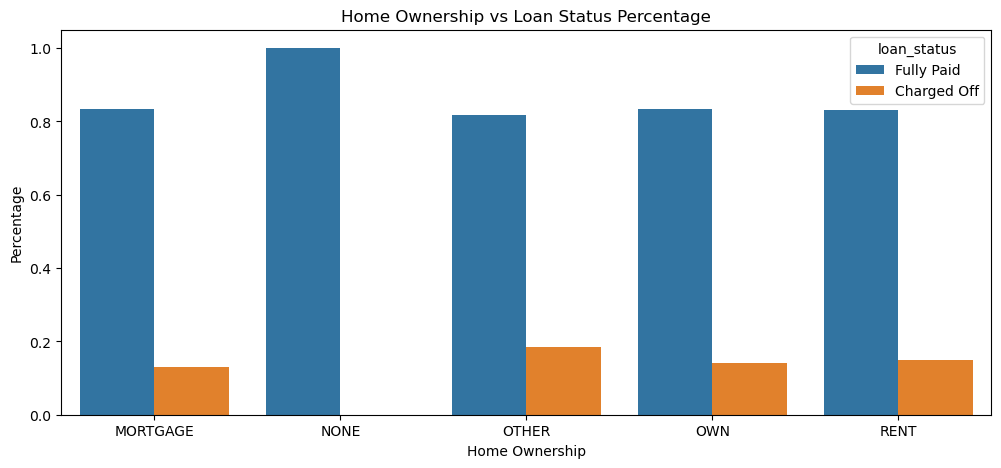

In [707]:
df = loan_df.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['total_count'] = df.groupby('home_ownership')['id'].transform('sum')
df['percentage'] = df['id'] / df['total_count']

plt.figure(figsize=(12, 5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order=['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan Status Percentage')
plt.ylabel('Percentage')
plt.xlabel('Home Ownership')

plt.show()

# Observations:
- There is bit high percentage of defaults are recorded in other home ownership category.

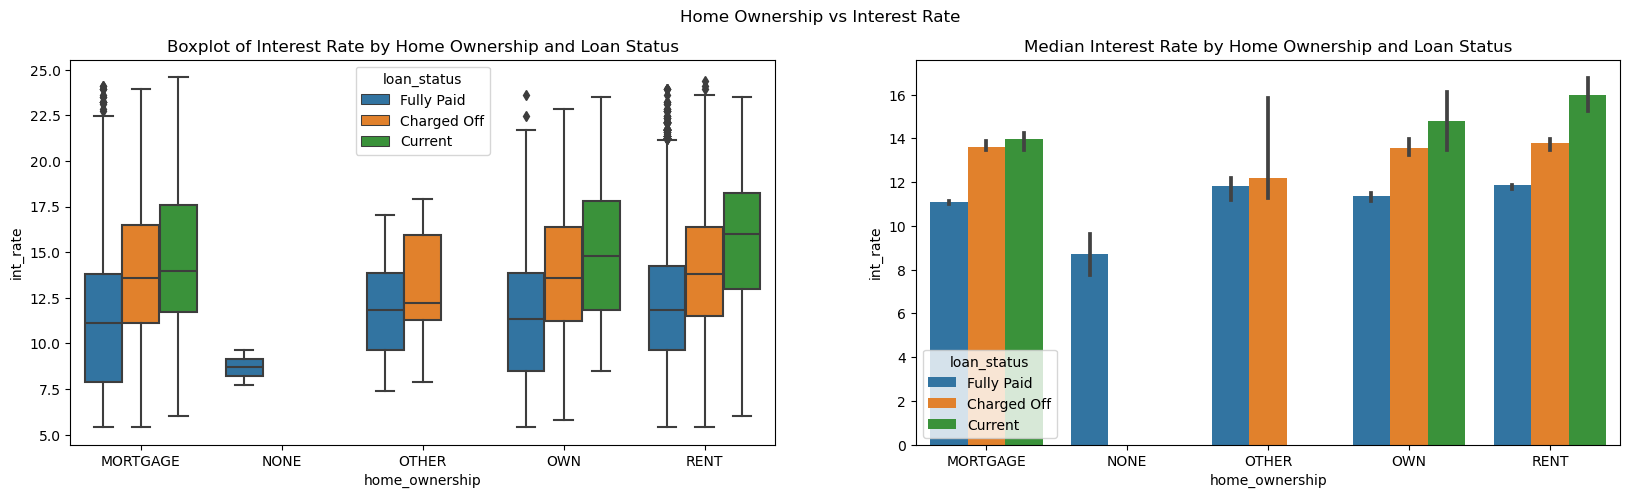

In [708]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Boxplot of Interest Rate by Home Ownership and Loan Status')

plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Median Interest Rate by Home Ownership and Loan Status')

plt.suptitle('Home Ownership vs Interest Rate')
plt.show()

# Observations

- Regardless of home ownership status, when the interest rate is high, the default rate is also high.

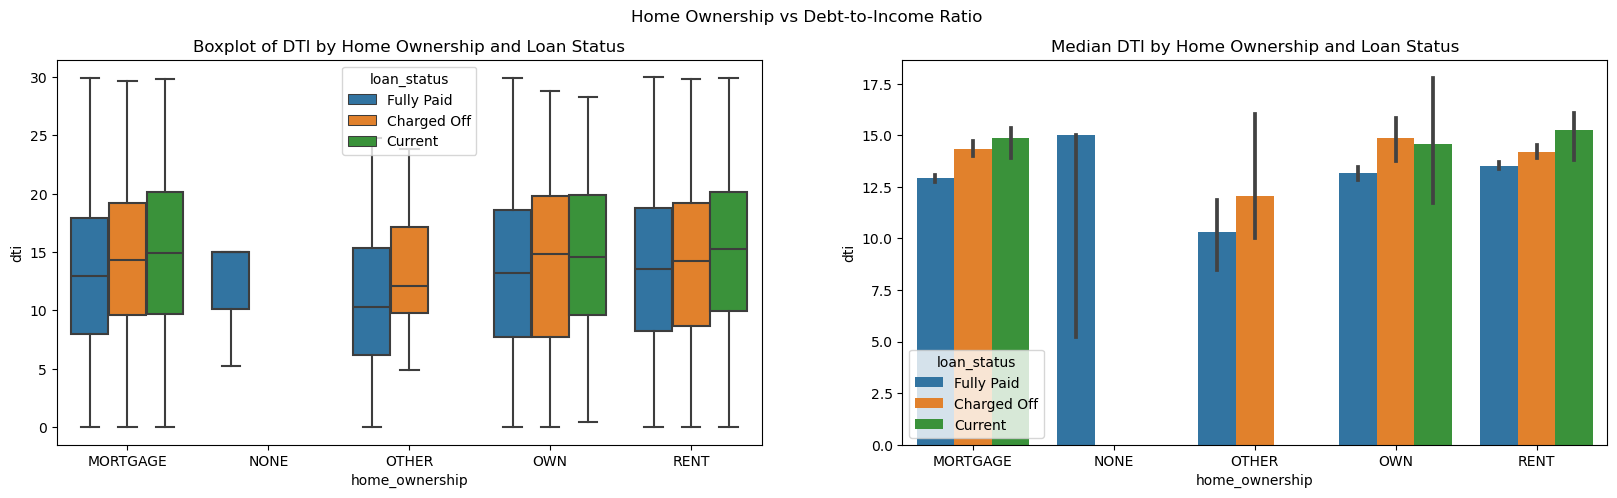

In [709]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan_df)
plt.title('Boxplot of DTI by Home Ownership and Loan Status')

plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Median DTI by Home Ownership and Loan Status')

plt.suptitle('Home Ownership vs Debt-to-Income Ratio')
plt.show()

# Observations
- Borrowers in other home ownership category has less dti than other categories.
- There is equal posibility of home owners defaulting for all the home ownerships.

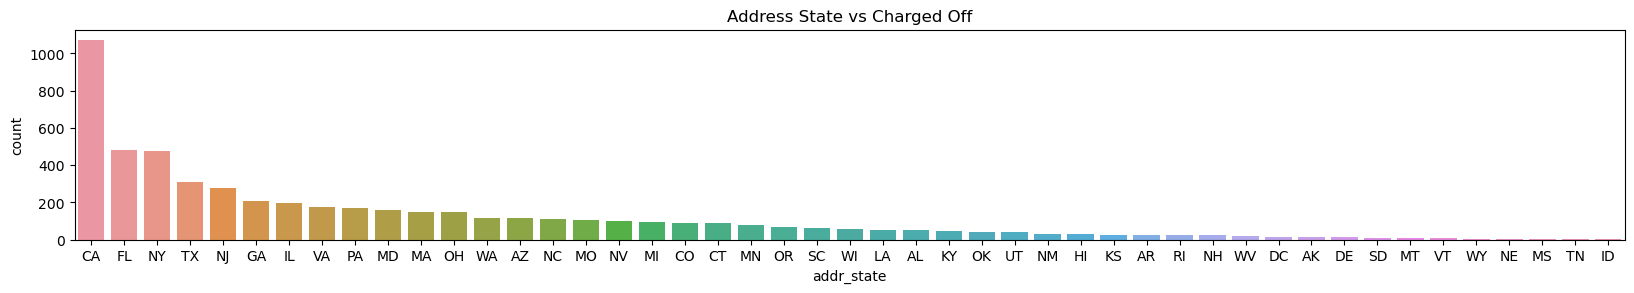

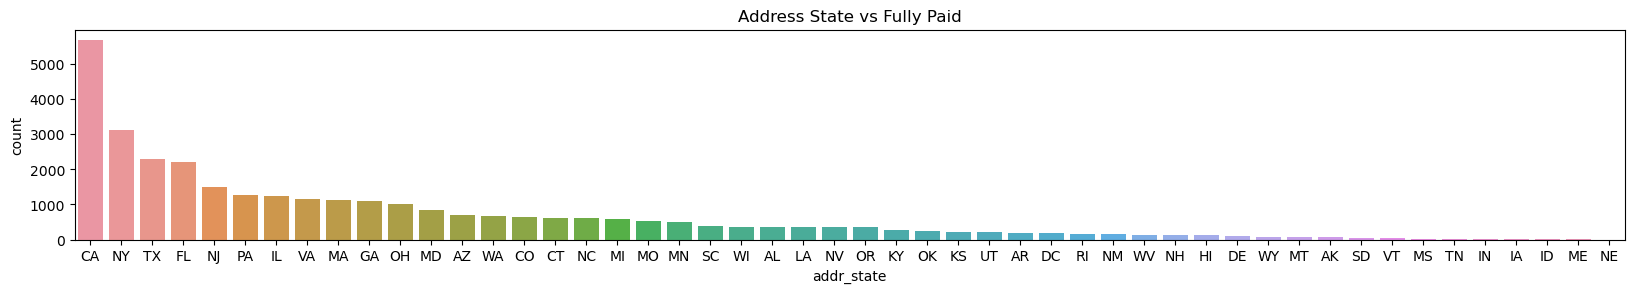

In [710]:
charged_off_df = loan_df[loan_df.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = loan_df[loan_df.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

# Observations:
- More number of borrowers defaulted in CA , FL and NY states less from NE,TN,ID,ME

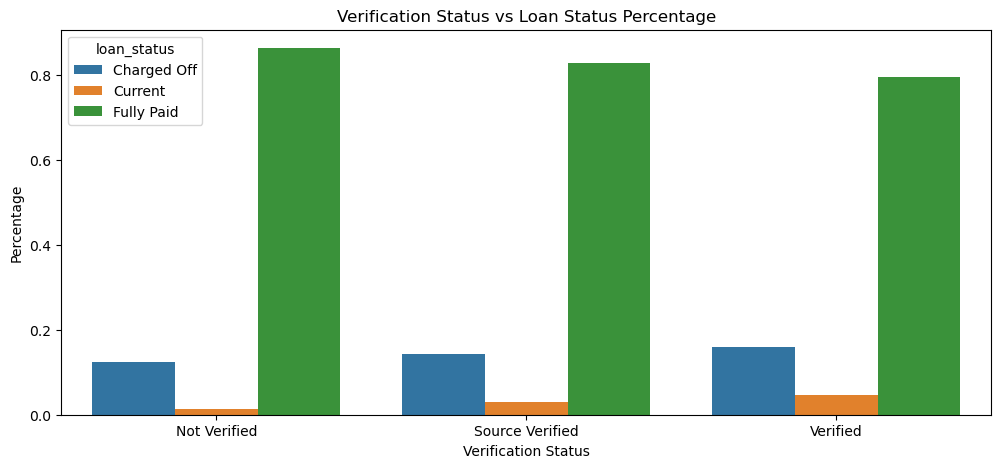

In [713]:
df = loan_df.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['total_count'] = df.groupby('verification_status')['id'].transform('sum')
df['percentage'] = df['id'] / df['total_count']

plt.figure(figsize=(12, 5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Verification Status vs Loan Status Percentage')
plt.ylabel('Percentage')
plt.xlabel('Verification Status')

plt.show()

# Observation

- There is no bigchange on this analysis 

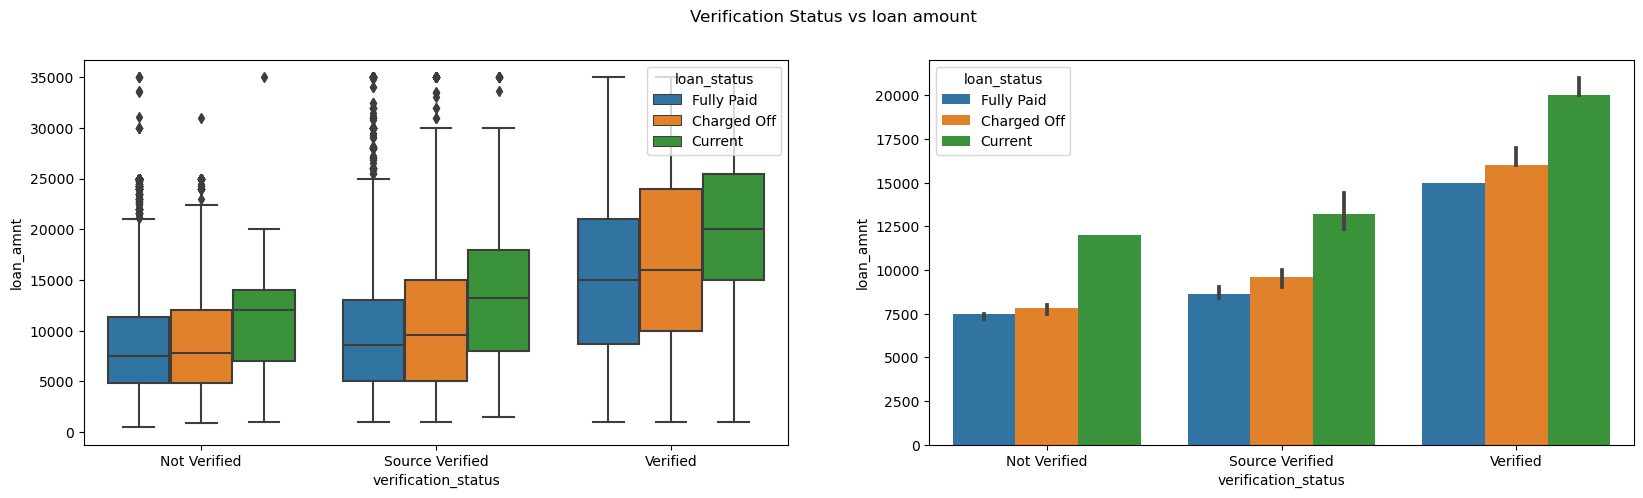

In [714]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

# Observations 

Verified loans receive higher loan amounts compared to unverified loans.
There is a slight increase in the loan amounts for verified and source-verified loans when they are defaulted.

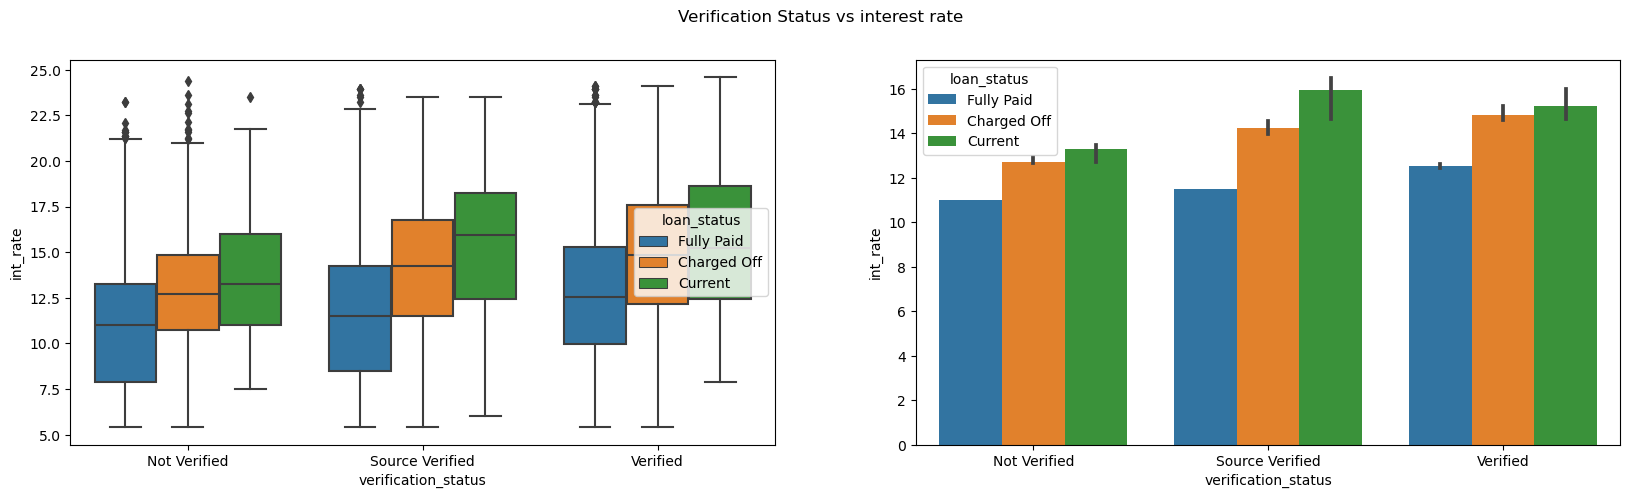

In [717]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

# Observations 
- Higher interest rates can significantly impact loan defaults, and this holds true regardless of the borrower’s verification status

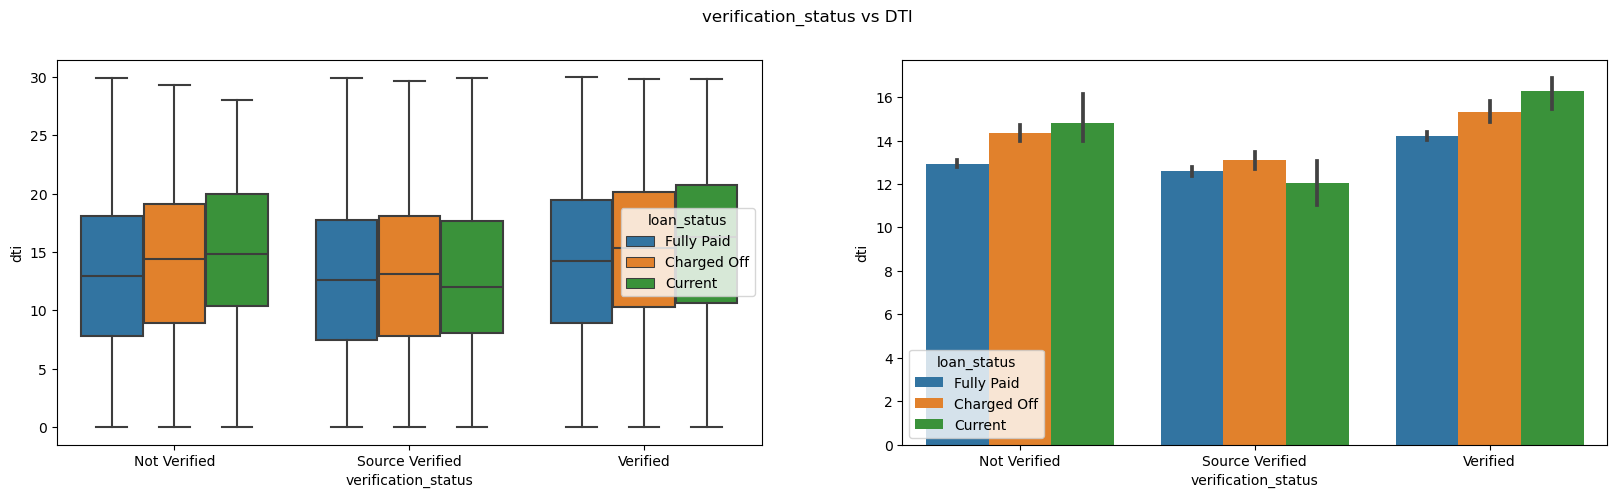

In [718]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

# Observations:
- There is a noticeable increase in the mean debt-to-income (DTI) ratio for defaulted loans across all verification status categories.

# Purpose

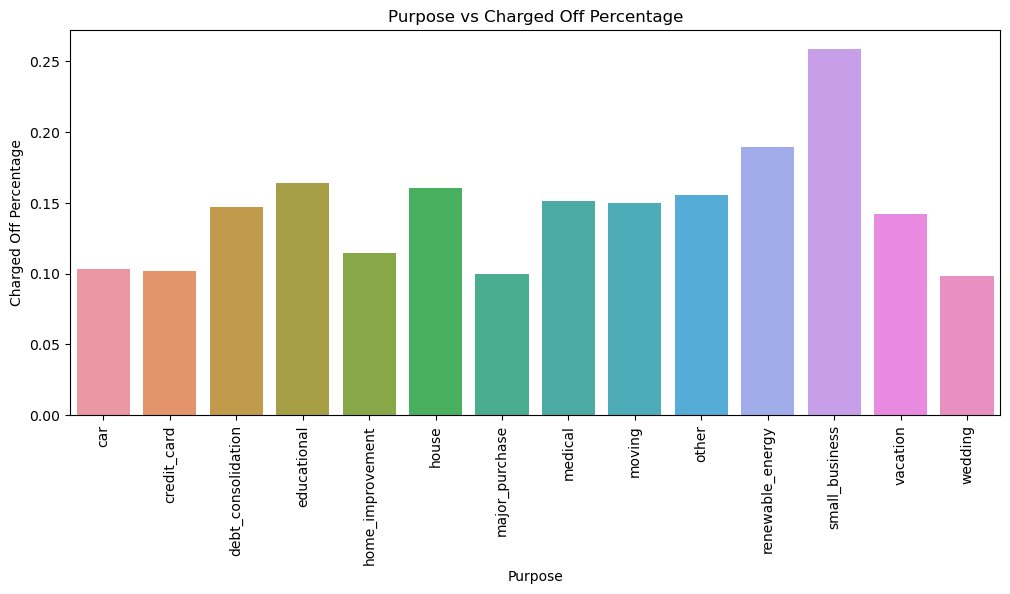

In [720]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['total_count'] = df.groupby('purpose')['id'].transform('sum')
df['percentage'] = df['id'] / df['total_count']
df = df[df['loan_status'] == 'Charged Off']

plt.figure(figsize=(12, 5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Charged Off Percentage')
plt.xlabel('Purpose')
plt.ylabel('Charged Off Percentage')

plt.show()

# Observations

- For small business companies charge off are higher and less for wedding

<Figure size 640x480 with 0 Axes>

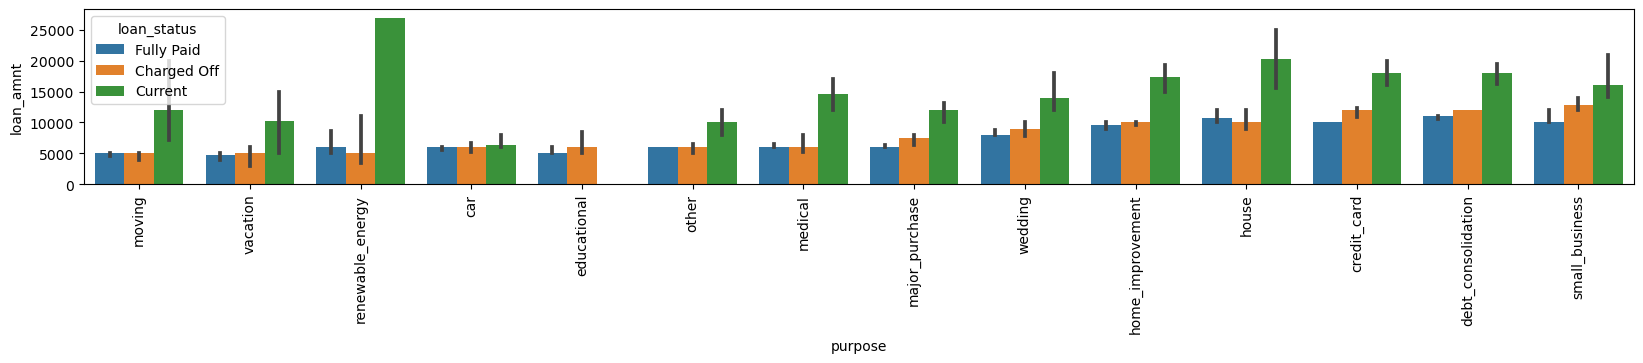

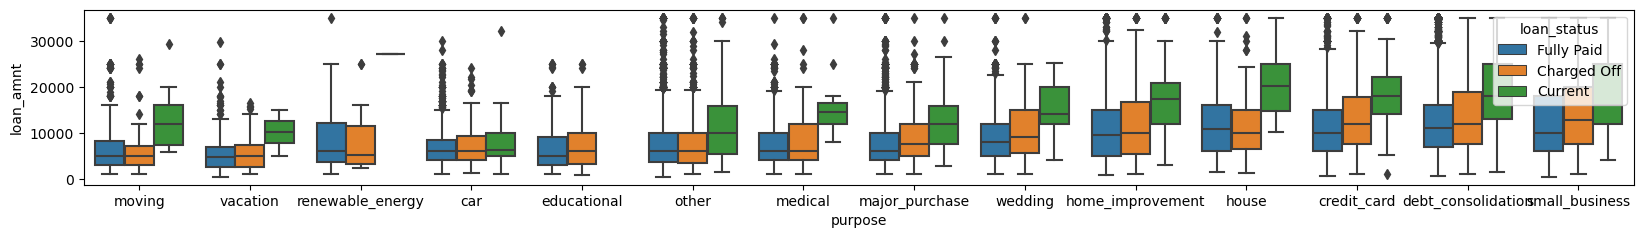

In [721]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

# Observations:
- Small Business has more defaults and also when  the loan amount is also high.

<Figure size 640x480 with 0 Axes>

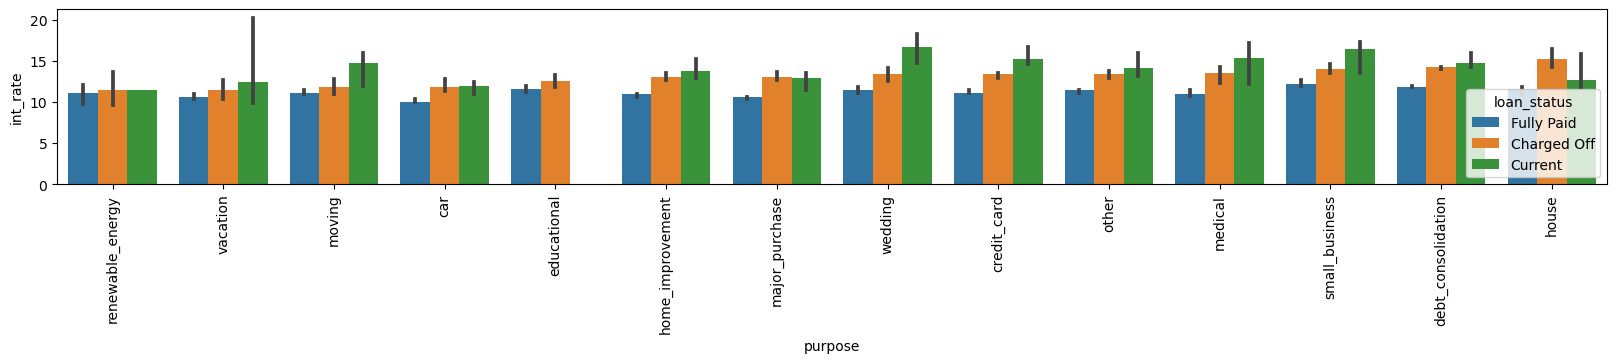

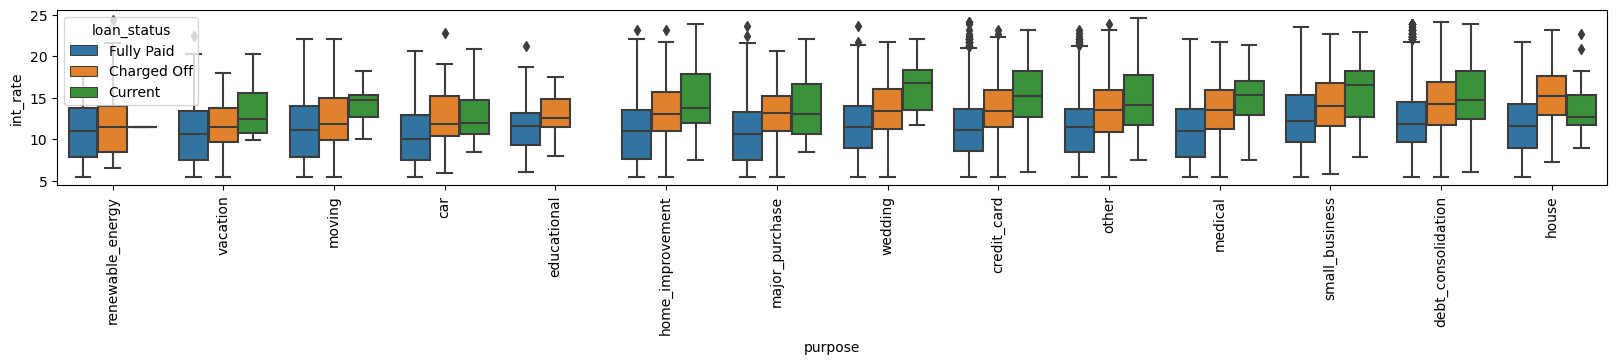

In [722]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan_df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan_df, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

# Observations:
- Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

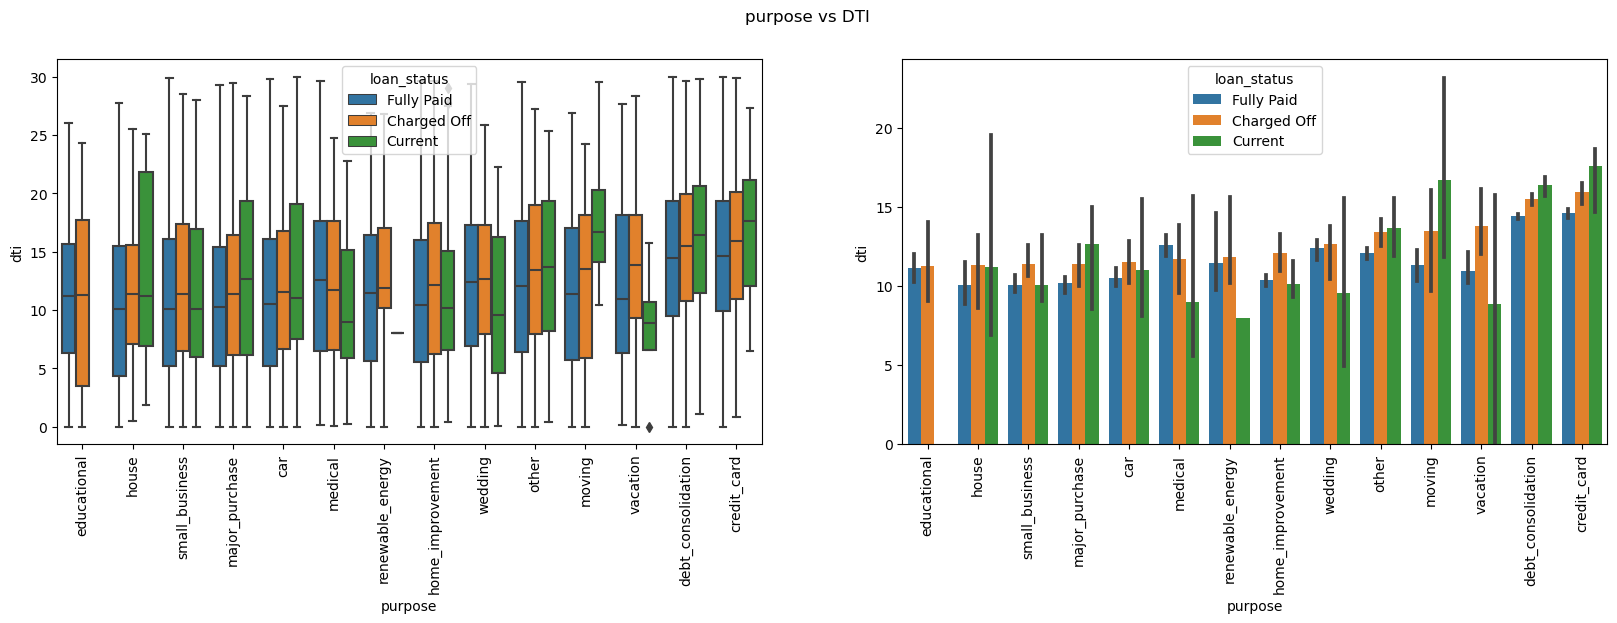

In [723]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan_df, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan_df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

loan_status  Charged Off   Current  Fully Paid  Total  Percentage_Charged Off
grade                                                                        
A               5.755544  0.361011   93.883445   9695                5.755544
B              11.595071  2.798220   85.606709  11686               11.595071
C              16.250315  3.242493   80.507192   7926               16.250315
D              20.885467  4.157844   74.956689   5195               20.885467
E              25.044723  6.261181   68.694097   2795               25.044723
F              30.388350  6.893204   62.718447   1030               30.388350
G              31.746032  5.396825   62.857143    315               31.746032

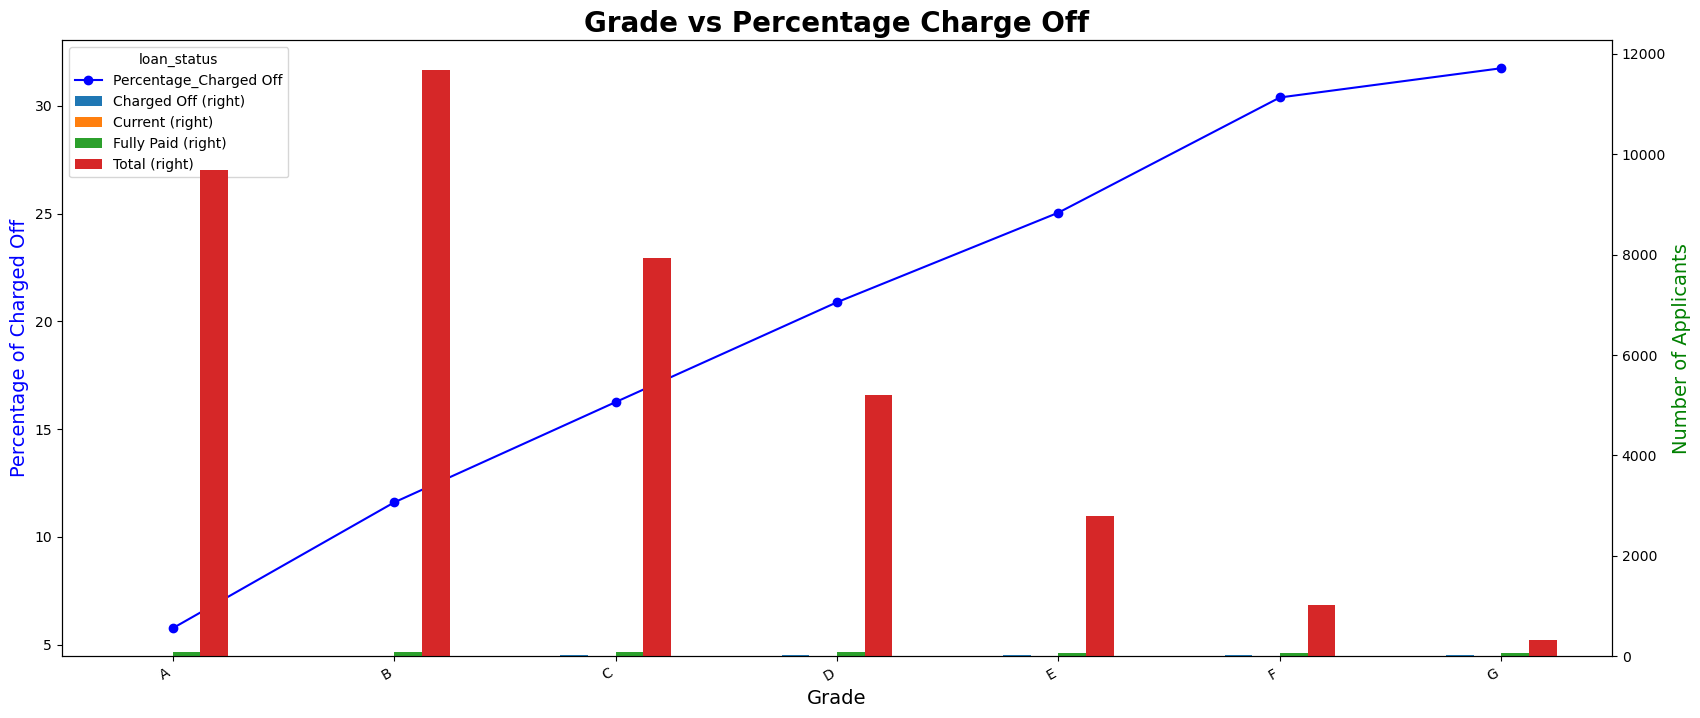

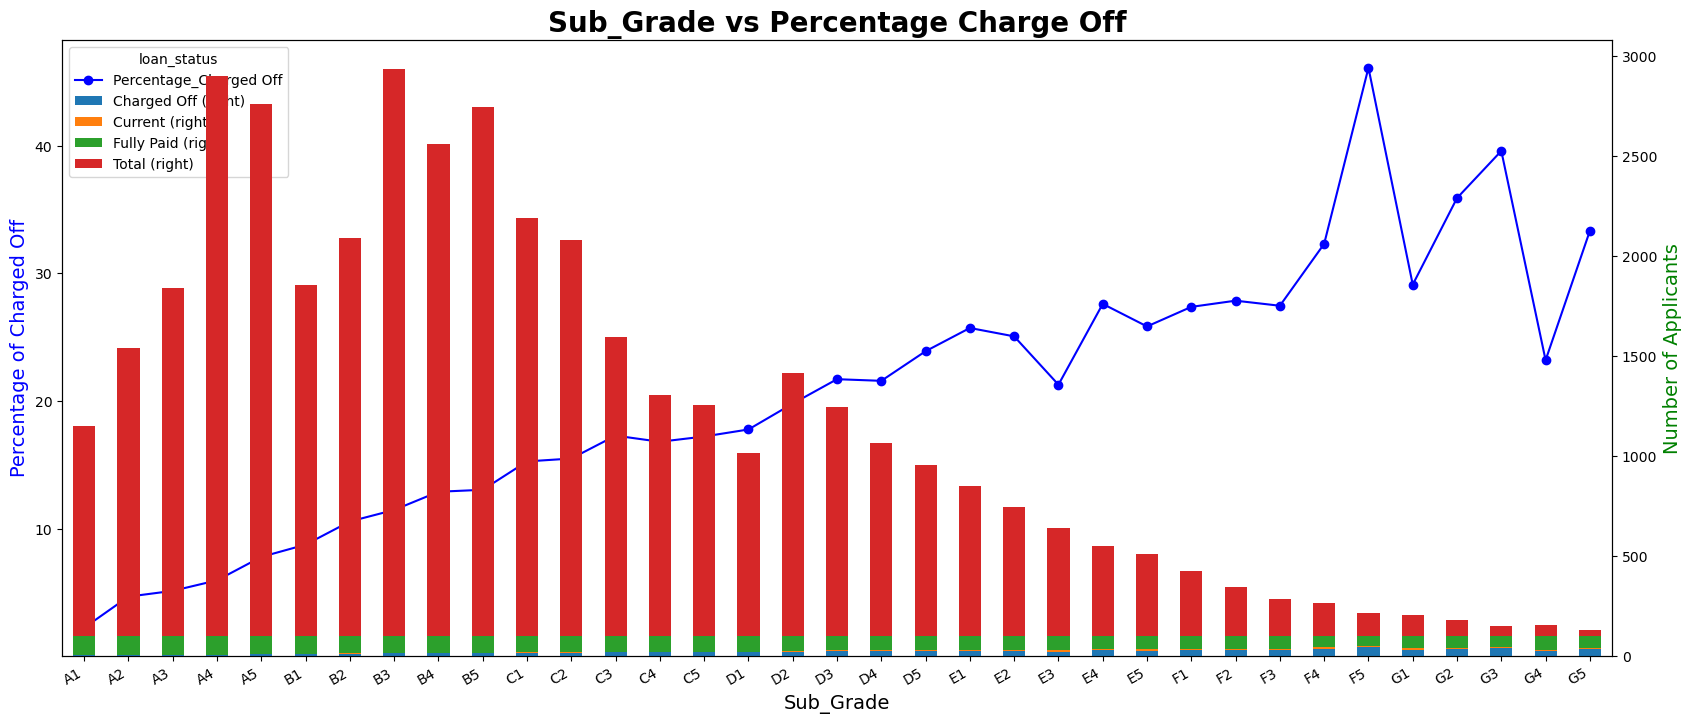

In [741]:
#Plotting the grade w.r.t % of loans charged off and no. of loan applicants. 
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False) 
#Plotting the sub grade w.r.t % of loans charged off and no. of loan applicants.
bivariate_prob(df =loan,col ='sub_grade')

# Observation

> Grade A and B loans are safe. Within these the sub-grades A4 and B3 have the highest number of loan applicants.
> Grade E, F, G loans are less safe as compared to others.

# Loan Amount vs Interest Rate

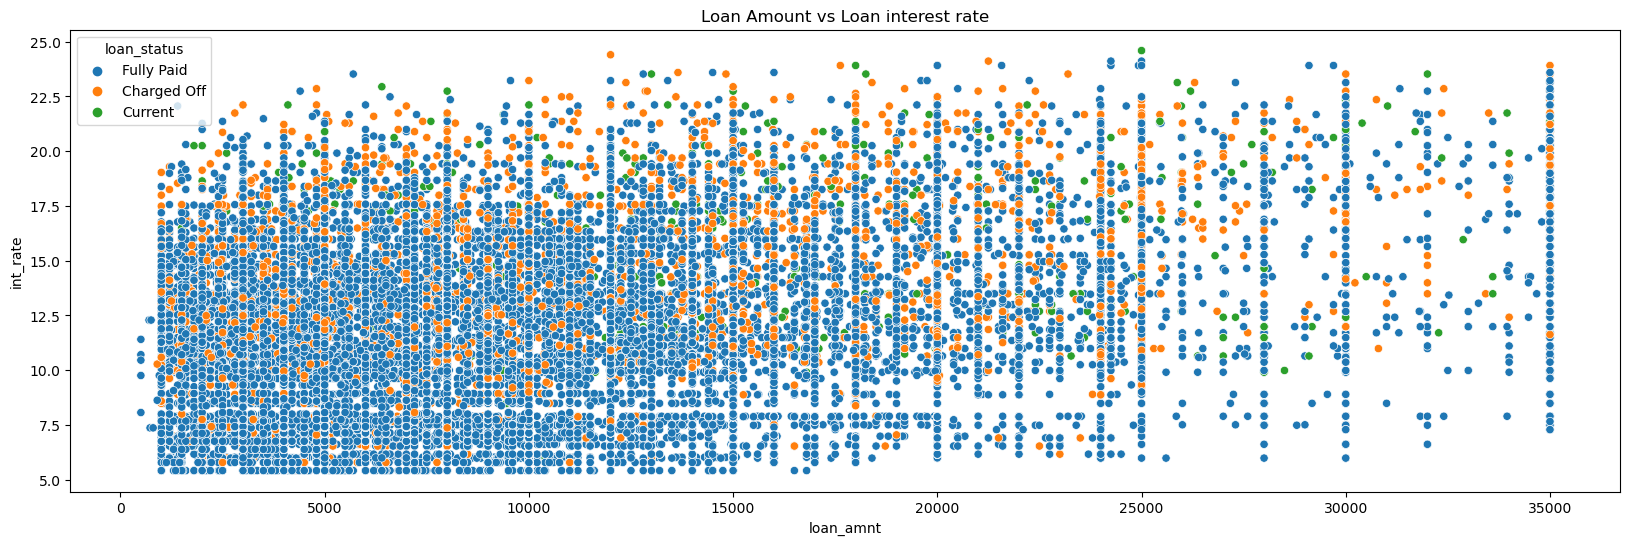

In [725]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

# Observations

All values are equally distuributed

# Loan Amount vs Annual income

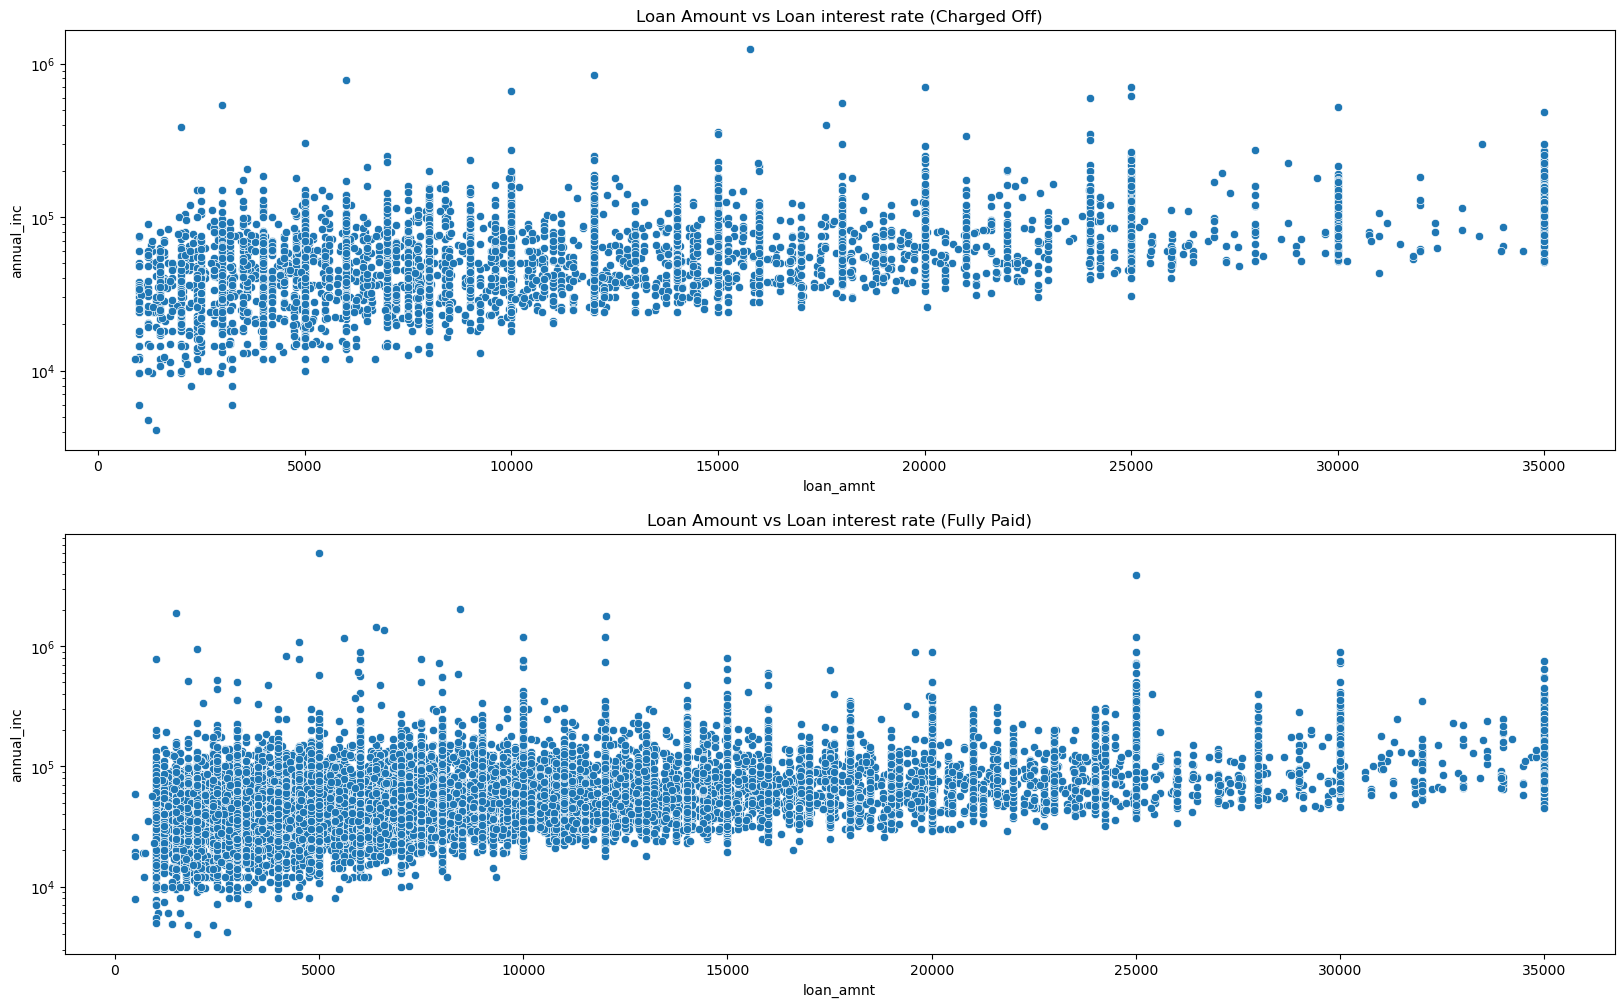

In [727]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_df[loan_df.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

# Observations

Both fully paid and charged off loans exhibit a similar trend concerning annual income. A linear model could be fitted with a line that has a very shallow slope.

# Loan Amount vs DTI

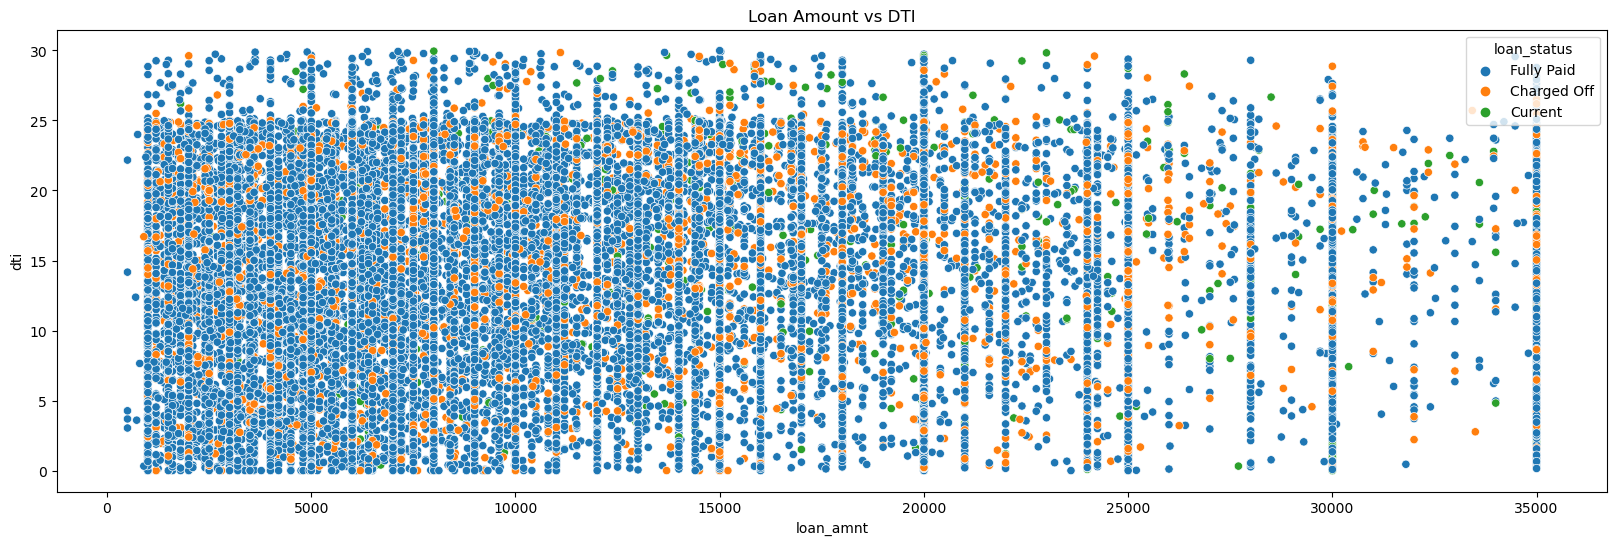

In [729]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

# Observartions:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

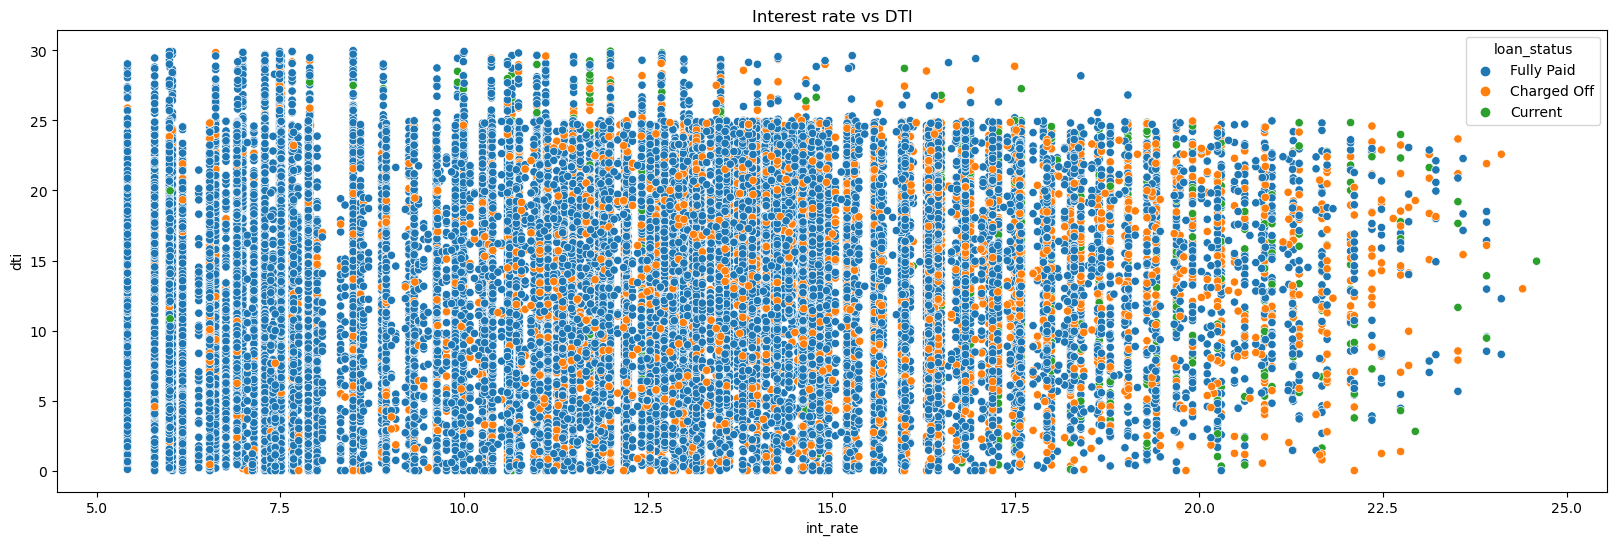

In [730]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan_df, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

# Observations 

- The values are widely spread; however, it is evident that regardless of the DTI ratio, higher interest rates are associated with an increase in charged off loans.

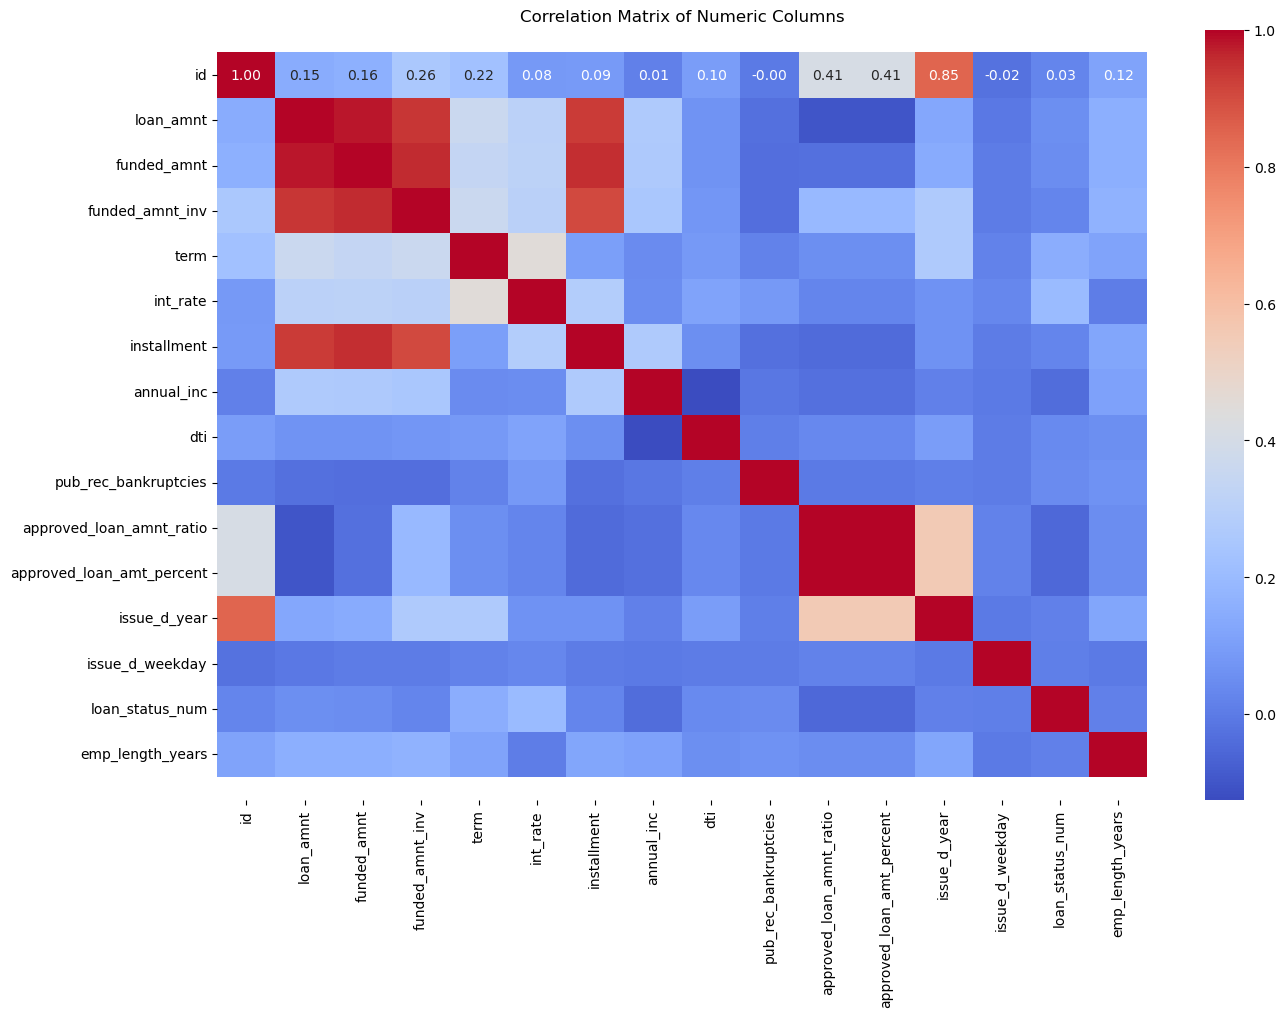

In [738]:
# Select only numeric columns for correlation calculation
numeric_columns = loan.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
loan_correlation = numeric_columns.corr()

plt.figure(figsize=(15, 10))

# Plot the correlation matrix on a heatmap
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,
            annot=True, cmap='coolwarm', fmt=".2f")

# Fix for a bug that cuts off the top and bottom of the seaborn plot
b, t = plt.ylim()  # Discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # Update the ylim(bottom, top) values

plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Observations:

> The public derogatory records column shows a strong positive correlation with public bankruptcy records. Additionally, interest rates tend to be higher for individuals with high revolving credit utilization.